# Wikimedia Research - Translation Imbalances: Testing hypothesis #1


In this notebook we aim to find answer to research questions by interacting with the data sources relevant to it, __the related statement is__:
> Cultural context content account for a relevant portion of Wikipedia articles (7%-49%) and is less shared on average, which is causing the language imbalance on Wikipedia. Mass media-dominated content, which is more dominated by certain cultures, is more widely shared, and therefore, translated from larger and global languages more often.

__Research questions:__
- RQ 4.1.1 What type of content receives the biggest count?
- RQ. 4.1.2 What type of content receives the lowest count?

__Data sources__
- Data obtained from the APIs by language edition: https://www.mediawiki.org/wiki/API:Main_page
- Predictions of categories by article: https://www.mediawiki.org/wiki/ORES/Articletopic
- Obtaine pages by Wikipedia category: https://meta.wikimedia.org/wiki/PetScan/{wiki_language}

__Steps:__
1. Define the tool to use to get the top level categories of articles
2. Define the categories to use
3. Get pages belonging to a category (IDs)
4. Make API calls to get translation counts by page and aggregate by category
5. Explore further the groups of languages being translated and their pairs



__Concerns:__
- When comparing different articles, should be consider the source language or original language it was written in as a factor for diversity?


In [1]:
main_categories = ['Research', 'Library_science', 'Culture', 'The_arts', 'Geography', 
                   'Places', 'Health', 'Self-care', 'Health_care_occupations', 'History',
                   'Events', 'Formal_sciences','Mathematics', 'Logic', 'Mathematical_sciences',
                  'Science', 'Natural_sciences', 'Nature', 'People', 'Personal_life',
                  'Self', 'Surnames', 'Philosophy', 'Thought', 'Religion', 'Belief', 
                  'Society', 'Social_sciences', 'Technology', 'Applied_sciences']

len(main_categories)

30

In [2]:
# https://www.mediawiki.org/wiki/ORES/Articletopic
# https://ores.wikimedia.org/v3/scores/enwiki/?models=articletopic&revids=1161522245

# Tests

### 1. Define the tool to use to get the top level categories of articles




### Testing the accuracy of the articletopic model from https://ores.wikimedia.org/

- We are fetching random articles via: https://en.wikipedia.org/w/api.php?action=query&list=random&rnnamespace=0&rnlimit=10
- We get the page titles and fecth the page URL via: https://en.wikipedia.org/w/api.php?action=help&modules=query%2Binfo
- We go to each page, check the categories at the end and estimate a list of 3-4 expected categories based on this.
- We finally build a list with all of this information.

```
{
    "batchcomplete": "",
    "continue": {
        "rncontinue": "0.141236895977|0.141238067536|13009515|0",
        "continue": "-||"
    },
    "query": {
        "random": [
            {
                "id": 60265289,
                "ns": 0,
                "title": "African Women's classification in the Cape Epic"
            },
            {
                "id": 46434099,
                "ns": 0,
                "title": "Adrien Kela"
            },
            {
                "id": 60533443,
                "ns": 0,
                "title": "Kenneth Bunn"
            },
            {
                "id": 45482666,
                "ns": 0,
                "title": "Cyrtocris fulvicornis"
            },
            {
                "id": 1808010,
                "ns": 0,
                "title": "Islwyn (UK Parliament constituency)"
            },
              {
                "id": 47284944,
                "ns": 0,
                "title": "Capanne, San Marino",
                "url": "https://en.wikipedia.org/wiki/Capanne,_San_Marino"
            },
            
            {
                "id": 28276181,
                "ns": 0,
                "title": "1988 Virginia Slims of Arizona \u2013 Singles",
                "url": "https://en.wikipedia.org/wiki/1988_Virginia_Slims_of_Arizona_%E2%80%93_Singles"
            },
            
            {
                "id": 22369872,
                "ns": 0,
                "title": "Herbert Munk",
                "url": "https://en.wikipedia.org/wiki/Herbert_Munk"
            },
            
            {
                "id": 33607623,
                "ns": 0,
                "title": "Risky Business (House)",
                "url": "https://en.wikipedia.org/wiki/Risky_Business_(House)"
            },
            
            {
                "id": 5864890,
                "ns": 0,
                "title": "Saskatchewan Glacier",
                "url": "https://en.wikipedia.org/wiki/Saskatchewan_Glacier"
            },
            
            {
                "id": 4494842,
                "ns": 0,
                "title": "Printer cable",
                "url": "https://en.wikipedia.org/wiki/Printer_cable"
            },
            
            {
                "id": 43821884,
                "ns": 0,
                "title": "James Carruthers",
                "url": "https://en.wikipedia.org/wiki/James_Carruthers"
            },
            
            {
                "id": 41505702,
                "ns": 0,
                "title": "Hammer of Heaven",
                "url": "https://en.wikipedia.org/wiki/Hammer_of_Heaven"
            },
            
            {
                "id": 70186733,
                "ns": 0,
                "title": "The Kyiv Independent",
                "url": "https://en.wikipedia.org/wiki/The_Kyiv_Independent"
            },
            
            {
                "id": 1137772,
                "ns": 0,
                "title": "State room",
                "url": "https://en.wikipedia.org/wiki/State_room"
            },
            
            {
                "id": 43640804,
                "ns": 0,
                "title": "Trials of Kirstin Lobato",
                "url": "https://en.wikipedia.org/wiki/Trials_of_Kirstin_Lobato"
            },
            
            {
                "id": 62111001,
                "ns": 0,
                "title": "Jessa Dillow Crisp",
                "url": "https://en.wikipedia.org/wiki/Jessa_Dillow_Crisp"
            },
            
            {
                "id": 30634407,
                "ns": 0,
                "title": "Mingqi",
                "url": "https://en.wikipedia.org/wiki/Mingqi"
            },
            
            {
                "id": 8238870,
                "ns": 0,
                "title": "Metronome (artists' and writers' organ)",
                "url": "https://en.wikipedia.org/wiki/Metronome_(artists%27_and_writers%27_organ)"
            },
            
            {
                "id": 9155219,
                "ns": 0,
                "title": "Richard Beauchamp, 2nd Baron Beauchamp",
                "url": "https://en.wikipedia.org/wiki/Richard_Beauchamp,_2nd_Baron_Beauchamp"
            },
            
            {
                "id": 26207504,
                "ns": 0,
                "title": "Single point of failure",
                "url": "https://en.wikipedia.org/wiki/Single_point_of_failure"
            },
            
            {
                "id": 50151305,
                "ns": 0,
                "title": "Ibrahim Al-Subaie",
                "url": "https://en.wikipedia.org/wiki/Ibrahim_Al-Subaie"
            },
            
            {
                "id": 36718302,
                "ns": 0,
                "title": "Biathlon at the 1994 Winter Olympics \u2013 Women's individual",
                "url": "https://en.wikipedia.org/wiki/Biathlon_at_the_1994_Winter_Olympics_%E2%80%93_Women%27s_individual"
            },
            
            {
                "id": 34004381,
                "ns": 0,
                "title": "Viola renifolia",
                "url": "https://en.wikipedia.org/wiki/Viola_renifolia"
            },
            
            {
                "id": 45715050,
                "ns": 0,
                "title": "LNWR 4ft 6in Tank Class",
                "url": "https://en.wikipedia.org/wiki/LNWR_4ft_6in_Tank_Class"
            },
            
            
        ]
    }
}

```

The expected results are:
1. '60265289': ['Sports', 'Africa', 'Culture']
2. '4643409': ['Biography', 'Sports', 'Women']
3. '60533443': ['Biography', 'Sports']
4. '45482666': ['STEM', 'Biology', 'Earth and environment']
5. '1808010': ['Politics', 'History', 'Geography']
6. '47284944': ['Geography', 'Europe', 'Southern Europe', 'History']
7. '28276181' : ['Sports', 'Society', 'Culture']
8. '22369872': ['Biography', 'History', 'Geography']
9. '33607623': ['Media', 'Television', 'Entertainment', 'North America']
10. '5864890': ['North America', 'Americas', 'Geography']
11. '4494842': ['STEM', 'Computing', 'Engineering']
12. '43821884': ['Biography', 'History']

In [3]:
import requests

In [4]:
## Define the expected results

random = [
    {
        "id": 60265289,
        "ns": 0,
        "title": "African Women's classification in the Cape Epic"
    },
    {
        "id": 46434099,
        "ns": 0,
        "title": "Adrien Kela"
    },
    {
        "id": 60533443,
        "ns": 0,
        "title": "Kenneth Bunn"
    },
    {
        "id": 45482666,
        "ns": 0,
        "title": "Cyrtocris fulvicornis"
    },
    {
        "id": 1808010,
        "ns": 0,
        "title": "Islwyn (UK Parliament constituency)"
    },
      {
        "id": 47284944,
        "ns": 0,
        "title": "Capanne, San Marino",
        "url": "https://en.wikipedia.org/wiki/Capanne,_San_Marino"
    },

    {
        "id": 28276181,
        "ns": 0,
        "title": "1988 Virginia Slims of Arizona \u2013 Singles",
        "url": "https://en.wikipedia.org/wiki/1988_Virginia_Slims_of_Arizona_%E2%80%93_Singles"
    },

    {
        "id": 22369872,
        "ns": 0,
        "title": "Herbert Munk",
        "url": "https://en.wikipedia.org/wiki/Herbert_Munk"
    },

    {
        "id": 33607623,
        "ns": 0,
        "title": "Risky Business (House)",
        "url": "https://en.wikipedia.org/wiki/Risky_Business_(House)"
    },

    {
        "id": 5864890,
        "ns": 0,
        "title": "Saskatchewan Glacier",
        "url": "https://en.wikipedia.org/wiki/Saskatchewan_Glacier"
    },

    {
        "id": 4494842,
        "ns": 0,
        "title": "Printer cable",
        "url": "https://en.wikipedia.org/wiki/Printer_cable"
    },

    {
        "id": 43821884,
        "ns": 0,
        "title": "James Carruthers",
        "url": "https://en.wikipedia.org/wiki/James_Carruthers"
    },

    {
        "id": 41505702,
        "ns": 0,
        "title": "Hammer of Heaven",
        "url": "https://en.wikipedia.org/wiki/Hammer_of_Heaven"
    },

    {
        "id": 70186733,
        "ns": 0,
        "title": "The Kyiv Independent",
        "url": "https://en.wikipedia.org/wiki/The_Kyiv_Independent"
    },

    {
        "id": 1137772,
        "ns": 0,
        "title": "State room",
        "url": "https://en.wikipedia.org/wiki/State_room"
    },

    {
        "id": 43640804,
        "ns": 0,
        "title": "Trials of Kirstin Lobato",
        "url": "https://en.wikipedia.org/wiki/Trials_of_Kirstin_Lobato"
    },

    {
        "id": 62111001,
        "ns": 0,
        "title": "Jessa Dillow Crisp",
        "url": "https://en.wikipedia.org/wiki/Jessa_Dillow_Crisp"
    },

    {
        "id": 30634407,
        "ns": 0,
        "title": "Mingqi",
        "url": "https://en.wikipedia.org/wiki/Mingqi"
    },

    {
        "id": 8238870,
        "ns": 0,
        "title": "Metronome (artists' and writers' organ)",
        "url": "https://en.wikipedia.org/wiki/Metronome_(artists%27_and_writers%27_organ)"
    },

    {
        "id": 9155219,
        "ns": 0,
        "title": "Richard Beauchamp, 2nd Baron Beauchamp",
        "url": "https://en.wikipedia.org/wiki/Richard_Beauchamp,_2nd_Baron_Beauchamp"
    },

    {
        "id": 26207504,
        "ns": 0,
        "title": "Single point of failure",
        "url": "https://en.wikipedia.org/wiki/Single_point_of_failure"
    },

    {
        "id": 50151305,
        "ns": 0,
        "title": "Ibrahim Al-Subaie",
        "url": "https://en.wikipedia.org/wiki/Ibrahim_Al-Subaie"
    },

    {
        "id": 36718302,
        "ns": 0,
        "title": "Biathlon at the 1994 Winter Olympics \u2013 Women's individual",
        "url": "https://en.wikipedia.org/wiki/Biathlon_at_the_1994_Winter_Olympics_%E2%80%93_Women%27s_individual"
    },

    {
        "id": 34004381,
        "ns": 0,
        "title": "Viola renifolia",
        "url": "https://en.wikipedia.org/wiki/Viola_renifolia"
    },

    {
        "id": 45715050,
        "ns": 0,
        "title": "LNWR 4ft 6in Tank Class",
        "url": "https://en.wikipedia.org/wiki/LNWR_4ft_6in_Tank_Class"
    }
]




# these are the expected categories by ID
expected_categories = {
'60265289': ['Culture.Sports', 'Geography.Regions.Africa.Africa*', 'Culture.Biography.Women'],
'46434099': ['Culture.Biography.Biography*', 'Culture.Sports'],
'60533443': ['Culture.Biography.Biography*', 'Culture.Sports'],
'45482666': ['STEM.STEM*', 'STEM.Biology', 'STEM.Earth and environment'],
'1808010': ['History and Society.Politics and government', 'History and Society.History', 'Geography.Geographical'],
'47284944': ['Geography.Geographical', 'Geography.Regions.Europe.Europe*', 'Geography.Regions.Europe.Southern Europe', 'History and Society.History'],
'28276181' : ['Culture.Sports', 'Geography.Regions.Americas.North America*', 'Culture.Biography.Women'],
'22369872': ['Culture.Biography.Biography*', 'History and Society.History', 'Geography.Geographical'],
'33607623': ['Culture.Media.Media*', 'Culture.Media.Television', 'Culture.Media.Entertainment', 'North America'],
'5864890': ['Geography.Regions.Americas.North America', 'Geography.Regions.Americas', 'Geography.Geographical'],
'4494842': ['STEM.STEM*', 'STEM.Computing', 'STEM.Engineering'],
'43821884': ['Culture.Biography.Biography*', 'History and Society.History'],
'41505702': ['Culture.Media.Media*', 'Culture.Media.Music','Culture.Media.Radio', 'Culture.Media.Enterntainment'],
'70186733': ['Culture.Media.Media*', 'Culture.Media.Television','Culture.Internet Culture', 'Culture.Media.Enterntainment', 'History and Society.Politics and government'],
'1137772': ['History and Society.History', 'Geography.Geographical', 'Geography.Regions.Europe.Europe*', 'History and Society.Politics and government', 'Culture.Media.Media*', 'Culture.Performing arts', 'Culture.Visual arts.Visual arts*'],
'43640804': ['Culture.Biography.Women', 'History and Society.Society','History and Society.History'],
'62111001': ['Culture.Biography.Biography*', 'Culture.Media.Enterntainment', 'History and Society.History'],
'30634407': ['History and Society.History', 'Geography.Regions.Asia.Asia*', 'Geography.Regions.Asia.North Asia*', 'Culture.Visual arts.Visual arts*'],
'8238870': ['Culture.Media.Media*', 'Culture.Visual arts.Visual arts*'],
'9155219': ['Culture.Biography.Biography*','Geography.Regions.Europe.Europe*'],
'26207504': ['STEM.STEM*', 'STEM.Engineering', 'STEM.Computing', 'STEM.Technology'],
'50151305': ['Culture.Biography.Biography*', 'History and Society.History','Culture.Sports'],
'36718302': ['Culture.Sports', 'Culture.Biography.Women'],
'34004381': ['Geography.Geographical', 'STEM.Biology', 'STEM.Earth and Environment'],
'45715050': ['History and Society.History', 'STEM.STEM*', 'STEM.Engineering', 'History and Society.Transportation'],
    
}

expected_categories

{'60265289': ['Culture.Sports',
  'Geography.Regions.Africa.Africa*',
  'Culture.Biography.Women'],
 '46434099': ['Culture.Biography.Biography*', 'Culture.Sports'],
 '60533443': ['Culture.Biography.Biography*', 'Culture.Sports'],
 '45482666': ['STEM.STEM*', 'STEM.Biology', 'STEM.Earth and environment'],
 '1808010': ['History and Society.Politics and government',
  'History and Society.History',
  'Geography.Geographical'],
 '47284944': ['Geography.Geographical',
  'Geography.Regions.Europe.Europe*',
  'Geography.Regions.Europe.Southern Europe',
  'History and Society.History'],
 '28276181': ['Culture.Sports',
  'Geography.Regions.Americas.North America*',
  'Culture.Biography.Women'],
 '22369872': ['Culture.Biography.Biography*',
  'History and Society.History',
  'Geography.Geographical'],
 '33607623': ['Culture.Media.Media*',
  'Culture.Media.Television',
  'Culture.Media.Entertainment',
  'North America'],
 '5864890': ['Geography.Regions.Americas.North America',
  'Geography.Regions

In [5]:
## Process both results and merge togethers

articles_cat_merged = {}
titles = []

# for each item in the random list
for art in random:
    # get the id
    id_ = str(art['id'])
    article_cat_new = {'id': id_}
    article_cat_new['title'] = art['title'] 
    article_cat_new['expected_cat'] = expected_categories[id_]
    titles.append(art['title'])
    
    # set it
    articles_cat_merged[id_] = article_cat_new
    
articles_cat_merged

{'60265289': {'id': '60265289',
  'title': "African Women's classification in the Cape Epic",
  'expected_cat': ['Culture.Sports',
   'Geography.Regions.Africa.Africa*',
   'Culture.Biography.Women']},
 '46434099': {'id': '46434099',
  'title': 'Adrien Kela',
  'expected_cat': ['Culture.Biography.Biography*', 'Culture.Sports']},
 '60533443': {'id': '60533443',
  'title': 'Kenneth Bunn',
  'expected_cat': ['Culture.Biography.Biography*', 'Culture.Sports']},
 '45482666': {'id': '45482666',
  'title': 'Cyrtocris fulvicornis',
  'expected_cat': ['STEM.STEM*',
   'STEM.Biology',
   'STEM.Earth and environment']},
 '1808010': {'id': '1808010',
  'title': 'Islwyn (UK Parliament constituency)',
  'expected_cat': ['History and Society.Politics and government',
   'History and Society.History',
   'Geography.Geographical']},
 '47284944': {'id': '47284944',
  'title': 'Capanne, San Marino',
  'expected_cat': ['Geography.Geographical',
   'Geography.Regions.Europe.Europe*',
   'Geography.Regions.E

In [6]:
## Get last revision ID

revisions = {}

titles_str = "|".join(titles)   
url = f"https://en.wikipedia.org/w/api.php?action=query&prop=revisions&titles={titles_str}&rvprop=ids&format=json"

# Making a GET request
response = requests.get(url)
# See status code
status = response.status_code
res = response.json()

if status == 200:
    # process the results
    display(res)
    page_results = res['query']['pages']
    
    ids = list(articles_cat_merged.keys())
    # revisions - page id
    revisions_pages = {}
    for id_ in ids:
        page = page_results[id_] 
        revision_id = page['revisions'][-1]
        revisions_pages[id_] =  str(revision_id['revid'])
        
revisions_pages
    

{'batchcomplete': '',
 'query': {'pages': {'28276181': {'pageid': 28276181,
    'ns': 0,
    'title': '1988 Virginia Slims of Arizona – Singles',
    'revisions': [{'revid': 1097360621, 'parentid': 1083563900}]},
   '46434099': {'pageid': 46434099,
    'ns': 0,
    'title': 'Adrien Kela',
    'revisions': [{'revid': 1131896564, 'parentid': 885948410}]},
   '60265289': {'pageid': 60265289,
    'ns': 0,
    'title': "African Women's classification in the Cape Epic",
    'revisions': [{'revid': 1074183937, 'parentid': 995883150}]},
   '36718302': {'pageid': 36718302,
    'ns': 0,
    'title': "Biathlon at the 1994 Winter Olympics – Women's individual",
    'revisions': [{'revid': 1114685840, 'parentid': 1072599705}]},
   '47284944': {'pageid': 47284944,
    'ns': 0,
    'title': 'Capanne, San Marino',
    'revisions': [{'revid': 1099758502, 'parentid': 881640249}]},
   '45482666': {'pageid': 45482666,
    'ns': 0,
    'title': 'Cyrtocris fulvicornis',
    'revisions': [{'revid': 104560579

{'60265289': '1074183937',
 '46434099': '1131896564',
 '60533443': '1080503608',
 '45482666': '1045605798',
 '1808010': '1162679033',
 '47284944': '1099758502',
 '28276181': '1097360621',
 '22369872': '1140978713',
 '33607623': '1095806953',
 '5864890': '1114491070',
 '4494842': '844125533',
 '43821884': '1089350121',
 '41505702': '997006968',
 '70186733': '1163151823',
 '1137772': '1112910754',
 '43640804': '1154572734',
 '62111001': '1143997655',
 '30634407': '1158345780',
 '8238870': '1133609915',
 '9155219': '1156496402',
 '26207504': '1144873299',
 '50151305': '1155281273',
 '36718302': '1114685840',
 '34004381': '1013874582',
 '45715050': '1118005998'}

In [7]:
## Get the results

list_revi = list(revisions_pages.values())

revisions_list = "|".join(list_revi)
url = f"https://ores.wikimedia.org/v3/scores/enwiki/?models=articletopic&revids={revisions_list}"

# Making a GET request
response = requests.get(url)
# See status code
print(response.status_code)

results_revisions = response.json()['enwiki']['scores']
results_revisions

200


{'1013874582': {'articletopic': {'score': {'prediction': ['STEM.Biology',
     'STEM.STEM*'],
    'probability': {'Culture.Biography.Biography*': 0.0031084317166924823,
     'Culture.Biography.Women': 0.0009803049121985946,
     'Culture.Food and drink': 0.09242336852454172,
     'Culture.Internet culture': 0.0008515363091863077,
     'Culture.Linguistics': 0.00043891420619759344,
     'Culture.Literature': 0.0017456126108263857,
     'Culture.Media.Books': 0.0004604924985425731,
     'Culture.Media.Entertainment': 0.0004764972955101787,
     'Culture.Media.Films': 0.0001387873874122645,
     'Culture.Media.Media*': 0.0027164223946625566,
     'Culture.Media.Music': 9.759401349092416e-05,
     'Culture.Media.Radio': 2.5379689320860085e-05,
     'Culture.Media.Software': 0.0009201269892380221,
     'Culture.Media.Television': 0.00014731442291482467,
     'Culture.Media.Video games': 2.4675836900989654e-05,
     'Culture.Performing arts': 0.00016681160955285787,
     'Culture.Philosophy 

In [8]:
## Compare the expected results with the actual results
passes = 0
total_size = len(articles_cat_merged)

for page_id in revisions_pages:
    revision_id = revisions_pages[page_id]
    item = articles_cat_merged[page_id]
    # get the predicted categories and expected categories
    actual_results = results_revisions[revision_id]['articletopic']['score']['prediction']
    expected_results = item['expected_cat']
    
    
    # compare results by checking for common items
    print(f'\n\nCOMPARING FOR {page_id} with title <<{item["title"]}>>')
    print(f'\nEXPECTED RESULTS: {expected_results} \nACTUAL RESULTS:{actual_results}')
    intersect = list(set(actual_results).intersection(expected_results))
    
    if intersect:
        passes +=1
        print(f'The article with the id {page_id} got exactly {len(intersect)} match(es) in the predicted results list')
        print(f'Status: {passes} passes out of {total_size}')
        
print(f'\n\nFinal result is: {(passes/total_size)*100}%')



COMPARING FOR 60265289 with title <<African Women's classification in the Cape Epic>>

EXPECTED RESULTS: ['Culture.Sports', 'Geography.Regions.Africa.Africa*', 'Culture.Biography.Women'] 
ACTUAL RESULTS:['Culture.Biography.Biography*', 'Culture.Sports', 'Geography.Regions.Africa.Africa*', 'Geography.Regions.Africa.Southern Africa']
The article with the id 60265289 got exactly 2 match(es) in the predicted results list
Status: 1 passes out of 25


COMPARING FOR 46434099 with title <<Adrien Kela>>

EXPECTED RESULTS: ['Culture.Biography.Biography*', 'Culture.Sports'] 
ACTUAL RESULTS:['Culture.Sports', 'Geography.Regions.Oceania']
The article with the id 46434099 got exactly 1 match(es) in the predicted results list
Status: 2 passes out of 25


COMPARING FOR 60533443 with title <<Kenneth Bunn>>

EXPECTED RESULTS: ['Culture.Biography.Biography*', 'Culture.Sports'] 
ACTUAL RESULTS:['Culture.Biography.Biography*', 'Culture.Sports']
The article with the id 60533443 got exactly 2 match(es) in 

#### Supported languages

The supported languages are:
    - Czech
    - Korean
    - Vietnamese
    - Arabic
    - English
   
Notes:
- The results are still in English.
    
__Reference:__ https://ores-support-checklist.toolforge.org/

In [9]:
# Example of making a call with the cswiki (Czech)
ress = '22814052|22376572|22897051'
url = f"https://ores.wikimedia.org/v3/scores/cswiki/?models=articletopic&revids={ress}"

# Making a GET request
response = requests.get(url)
# See status code
print(response.status_code)

response.json()

200


{'cswiki': {'models': {'articletopic': {'version': '1.3.0'}},
  'scores': {'22376572': {'articletopic': {'score': {'prediction': ['Geography.Regions.Europe.Europe*',
       'History and Society.Military and warfare'],
      'probability': {'Culture.Biography.Biography*': 0.01734748973809565,
       'Culture.Biography.Women': 0.0008734782494353318,
       'Culture.Food and drink': 0.0033172337587473815,
       'Culture.Internet culture': 0.002627588131218483,
       'Culture.Linguistics': 0.009228339218182077,
       'Culture.Literature': 0.009496513305451145,
       'Culture.Media.Books': 0.002958332982475919,
       'Culture.Media.Entertainment': 0.002551308152631748,
       'Culture.Media.Films': 0.0005026620955611899,
       'Culture.Media.Media*': 0.021011287679556106,
       'Culture.Media.Music': 0.0004497918260572899,
       'Culture.Media.Radio': 0.00019531415828545804,
       'Culture.Media.Software': 0.0012731117686133658,
       'Culture.Media.Television': 0.0006339708230484

# Implementation

### 2. Define categories to use

In [2]:
## Get categories list and mappers by layers
import os
import yaml

directory = 'data/input/categories/taxonomy'
# corresponds to the top level categories [1st layer]
layer_cat_1st = []
# corresponds to the immediate inner categories after the top level categories [2nd layer]
layer_cat_2nd = {}
# correspond to the innermost categories after the inner categories [3rd layer]
layer_cat_3rd = {}

# iterate over each file to get all levels
for filename in os.listdir(directory):
    if filename.endswith(".yaml"):
        for top_cat, categories in yaml.safe_load(open(f'{directory}/{filename}')).items():
            # 1st layer
            layer_cat_1st.append(top_cat) 
            # 2nd layer
            layer_cat_2nd[top_cat] = list(categories.keys())
            # 3rd layer
            for cat, inner_cat in categories.items():
                if isinstance(inner_cat, dict):
                    layer_cat_3rd[cat] = list(inner_cat.keys())
                
    else:
        continue
# TODO: save results via Adam's libraries        
display("1ST LAYER:", layer_cat_1st )
display("2ND LAYER:", layer_cat_2nd )
display("3RD LAYER:", layer_cat_3rd )

'1ST LAYER:'

['Culture', 'Geography', 'History and Society', 'STEM']

'2ND LAYER:'

{'Culture': ['Biography',
  'Food and drink',
  'Internet culture',
  'Linguistics',
  'Literature',
  'Media',
  'Performing arts',
  'Philosophy and religion',
  'Sports',
  'Visual arts'],
 'Geography': ['Geographical', 'Regions'],
 'History and Society': ['History',
  'Society',
  'Business and economics',
  'Education',
  'Military and warfare',
  'Politics and government',
  'Transportation'],
 'STEM': ['STEM*',
  'Biology',
  'Chemistry',
  'Engineering',
  'Earth and environment',
  'Libraries & Information',
  'Computing',
  'Mathematics',
  'Medicine & Health',
  'Physics',
  'Space',
  'Technology']}

'3RD LAYER:'

{'Biography': ['Biography*', 'Women'],
 'Media': ['Media*',
  'Entertainment',
  'Music',
  'Films',
  'Books',
  'Radio',
  'Television',
  'Video games',
  'Software'],
 'Visual arts': ['Visual arts*',
  'Architecture',
  'Comics and Anime',
  'Fashion'],
 'Regions': ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']}

### 3. Get pages belonging to a category (IDs)

#### Steps:

- Given a top level category, get the immediate subcategories via:
    https://en.wikipedia.org/w/api.php?action=help&modules=query%2Bcategorymembers
- Fetch the pages count for each and aggregate to find the total page count: 
    https://en.wikipedia.org/w/api.php?action=help&modules=query%2Bcategoryinfo
- Calculate the ideal sample dsize. 
        

### English

In [3]:
## Map categories with the topics of the ORES model to retrieve pages
# to verify existance (manually) https://en.wikipedia.org/wiki/Special:CategoryTree

'''
__1st layer__
NOTES: it becomes problematic as some categories are too broad (i.e. STEM...) for the retrieval. 
To avoid losing/exclusing important info, we will start the research with the second layers and
group the results to analyze the first.
'''


layer_cat_2nd_prepare = layer_cat_2nd.copy()

# We have created a list that includes categories that are equivalent to the original but exist in the wiki
# STEM
layer_cat_2nd_prepare['STEM'] =  ['Biology','Chemistry','Engineering','Earth', 'Environmental science', 'Libraries',
                                  'Information', 'Computing','Mathematics', 'Medicine', 'Health','Physics',
                                  'Space','Technology']
# Culture
# Biography: ('Living People', 'Dead People')
layer_cat_2nd_prepare['Culture'] = ['Living People', 'Dead People' 'Food and drink', 'Internet culture', 'Linguistics',
                                  'Literature', 'Mass media', 'Performing arts', 'Philosophy', 'Religion', 'Sports', 'Visual arts']
# Geography
layer_cat_2nd_prepare['Geography'] = ['Geography', 'Regions']

# History and Society
layer_cat_2nd_prepare['History and Society'] = ['History', 'Society', 'Business', 'Economics', 'Education',
                                      'Military', 'War', 'Politics', 'Government', 'Transport']

On defining the ideal sample size for the analysis:

__Parameters:__
- Confidence level: 95%
- Margin of error: 5-3%. We will initially start with 3% and expand to 3%

__References:__ 
 - https://www.surveymonkey.com/mp/sample-size-calculator/
 - https://tools4dev.org/resources/how-to-choose-a-samplesize/#:~:text=Most%20statisticians%20agree%20that%20the,to%20survey%20all%20of%20them.

In [4]:
## API call to get subcategories

In [5]:
## API call to get counts

In [6]:
## Define ideal count for each category and retrieve pages




### 4. Make API calls to get translation counts by page and aggregate by category

We are using the tool PetScan: https://petscan.wmflabs.org/

- Input category and query the results. 
- Save the results in CSV format.
- Make API call to get the translation counts per page.
- Create a new dataset from results.

In [7]:
## Import libraries
import csv
import os
import pandas as pd
import requests

In [8]:
## iterate over each file to collect all data

directory = 'data/input/categories/pages-ids'

categories_2nd_mapper = {}
cat_count = 0

# TODO: use the cache function to save these results to files since they are relatively static
for filename in os.listdir(directory):
    
    if filename.endswith(".csv"):
        cat_count += 1
        filename_cat = filename.split('-')[0].capitalize()
        
        with open(f'{directory}/{filename}', mode='r', encoding="utf8") as csv_file:
            # read as a dictionary
            csv_reader = csv.DictReader(csv_file)    
               
            row_count = 0
            for row in csv_reader:
                row_count += 1
                row['langs_count'] = None
                row['category'] = filename_cat
                page_title = row['title'].replace('_', ' ') # Consider removing the _ with ' '
                categories_2nd_mapper[page_title] = row
                
            # we are printing this count to help reference the (rough) expected number of counts
            print(f"ROW COUNT: {row_count} -- CATEGORY {filename_cat}")
# out
print(f"\nCATEGORIES COUNT: {cat_count}")
print(f"NUMBER OF UNIQUE PAGE TITLES: {len(list(categories_2nd_mapper.keys()))}")

ROW COUNT: 387 -- CATEGORY Biography
ROW COUNT: 385 -- CATEGORY Biology
ROW COUNT: 385 -- CATEGORY Business
ROW COUNT: 385 -- CATEGORY Chemistry
ROW COUNT: 385 -- CATEGORY Computing
ROW COUNT: 385 -- CATEGORY Earth
ROW COUNT: 385 -- CATEGORY Economic
ROW COUNT: 385 -- CATEGORY Education
ROW COUNT: 385 -- CATEGORY Engineering
ROW COUNT: 385 -- CATEGORY Environment
ROW COUNT: 385 -- CATEGORY Food and drink
ROW COUNT: 385 -- CATEGORY Geography
ROW COUNT: 385 -- CATEGORY Government
ROW COUNT: 385 -- CATEGORY Health
ROW COUNT: 385 -- CATEGORY History
ROW COUNT: 385 -- CATEGORY Libraries
ROW COUNT: 385 -- CATEGORY Linguistics
ROW COUNT: 385 -- CATEGORY Literature
ROW COUNT: 385 -- CATEGORY Mathematics
ROW COUNT: 385 -- CATEGORY Media
ROW COUNT: 385 -- CATEGORY Medicine
ROW COUNT: 385 -- CATEGORY Military
ROW COUNT: 385 -- CATEGORY Performing arts
ROW COUNT: 385 -- CATEGORY Philosophy
ROW COUNT: 385 -- CATEGORY Physics
ROW COUNT: 385 -- CATEGORY Politics
ROW COUNT: 385 -- CATEGORY Regions
ROW

In [9]:
page_titles = list(categories_2nd_mapper.keys())
len(page_titles)

12117

In [10]:
## Get count for all pages


# Reference: https://en.wikipedia.org/w/api.php?action=help&modules=query%2Blanglinkscount
import traceback
from time import sleep

from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

# general
result_pages_counts = []
page_titles = list(categories_2nd_mapper.keys())
# TODO: extend the 'lang' to more languages
lang = 'en'

# set requests parameters to retry on 'Max retries exceeded with url' and have enough wait time between exceptions
session = requests.Session()
retry = Retry(connect=3, backoff_factor=0.5)
adapter = HTTPAdapter(max_retries=retry)
session.mount('https://', adapter)

# used to track call number
api_call_number = 0

# initialize
slice_start = -50
slice_end = 0
titles_len = len(page_titles)


while (slice_end < titles_len):
    try:
        # check to update slice values
        slice_start = slice_start + 50 
        slice_end =  slice_end + 50 
            
        print('\n\n\n')
        print(f"PAGE TITLE GROUP {page_titles[:5]}...")
        # work with page titles batches that make request per 50 titles within a user language group
        titles_l = page_titles[slice_start:slice_end]
        titles =  "|".join(titles_l)
        url = f'https://{lang}.wikipedia.org/w/api.php?action=query&prop=langlinkscount&titles={titles}&format=json'  

        # GET request
        response = session.get(url)
        print(f'\nResponse:  {response.json()}')
        
        if response.status_code != 200:
            raise Exception(f"The call failed: {response.status_code}")

        else:
            # See request JSON
            res = response.json()
            
            if res.get('query'):
                # save results to dictionary to process later
                res = res['query']['pages']
                result_pages_counts.append(res)


                api_call_number += 1
                print(f'\n\nPROGRESS: {slice_start}-{slice_end} \n\nCALL NUMBER: {api_call_number}')
            else: 
                raise Exception(res.get("error"))
            
    
    except requests.exceptions.ConnectionError as errc:
        print ("Error Connecting:",errc)
    
    except Exception as e:
        print(e)
        traceback.print_exc()
      






PAGE TITLE GROUP ['Ngerak Florencio', 'Mario-Philippe Losembe', 'Olivier Megaton', 'Jen and Sylvia Soska', 'Yuka Ebihara']...

Response:  {'batchcomplete': '', 'query': {'pages': {'16973645': {'pageid': 16973645, 'ns': 0, 'title': 'Amanda Oliveira', 'langlinkscount': 4}, '50693975': {'pageid': 50693975, 'ns': 0, 'title': 'Andreas Altmann', 'langlinkscount': 3}, '70851081': {'pageid': 70851081, 'ns': 0, 'title': 'Andrey Svintsov', 'langlinkscount': 1}, '3420968': {'pageid': 3420968, 'ns': 0, 'title': 'Andy Greenwald', 'langlinkscount': 3}, '63716335': {'pageid': 63716335, 'ns': 0, 'title': 'Anthi Papakonstantinou'}, '7338292': {'pageid': 7338292, 'ns': 0, 'title': 'Beaumont Hannant'}, '55989933': {'pageid': 55989933, 'ns': 0, 'title': 'Candela Andújar', 'langlinkscount': 6}, '58379856': {'pageid': 58379856, 'ns': 0, 'title': 'Carlos Tábora', 'langlinkscount': 2}, '31887064': {'pageid': 31887064, 'ns': 0, 'title': 'Chang Hyuk-jin', 'langlinkscount': 4}, '51407250': {'pageid': 5140725


Response:  {'batchcomplete': '', 'query': {'pages': {'17694959': {'pageid': 17694959, 'ns': 0, 'title': 'Alexis Danelón', 'langlinkscount': 4}, '26426830': {'pageid': 26426830, 'ns': 0, 'title': 'Alfie Joey'}, '60206707': {'pageid': 60206707, 'ns': 0, 'title': 'Barbara Hernandez', 'langlinkscount': 1}, '38820987': {'pageid': 38820987, 'ns': 0, 'title': 'Ben George', 'langlinkscount': 3}, '24899336': {'pageid': 24899336, 'ns': 0, 'title': 'Carol Joyce', 'langlinkscount': 1}, '35563146': {'pageid': 35563146, 'ns': 0, 'title': 'Cathy Chedal', 'langlinkscount': 6}, '3791085': {'pageid': 3791085, 'ns': 0, 'title': 'Cynthia Leonard', 'langlinkscount': 1}, '8722075': {'pageid': 8722075, 'ns': 0, 'title': 'Daniel Vaillant', 'langlinkscount': 7}, '3611411': {'pageid': 3611411, 'ns': 0, 'title': 'Darryll Lewis', 'langlinkscount': 2}, '2522121': {'pageid': 2522121, 'ns': 0, 'title': 'Denis Betts', 'langlinkscount': 3}, '11084640': {'pageid': 11084640, 'ns': 0, 'title': "Dhaffer L'Abidine", 'lang


Response:  {'batchcomplete': '', 'query': {'pages': {'49610130': {'pageid': 49610130, 'ns': 0, 'title': 'Ali Malakouti', 'langlinkscount': 2}, '69383664': {'pageid': 69383664, 'ns': 0, 'title': 'António da Conceição', 'langlinkscount': 2}, '11575490': {'pageid': 11575490, 'ns': 0, 'title': 'Armin Kraaz', 'langlinkscount': 4}, '41618572': {'pageid': 41618572, 'ns': 0, 'title': 'Athena Lee Yen', 'langlinkscount': 3}, '54000139': {'pageid': 54000139, 'ns': 0, 'title': 'Barbara J. King', 'langlinkscount': 2}, '31665746': {'pageid': 31665746, 'ns': 0, 'title': 'Bill Swaggerty', 'langlinkscount': 1}, '1113283': {'pageid': 1113283, 'ns': 0, 'title': 'Capleton', 'langlinkscount': 19}, '11753156': {'pageid': 11753156, 'ns': 0, 'title': 'Clarence Weathers', 'langlinkscount': 1}, '69354001': {'pageid': 69354001, 'ns': 0, 'title': 'David S. Feldman'}, '32782057': {'pageid': 32782057, 'ns': 0, 'title': 'Emily Fields', 'langlinkscount': 5}, '46672339': {'pageid': 46672339, 'ns': 0, 'title': 'Enzo R

PAGE TITLE GROUP ['Ngerak Florencio', 'Mario-Philippe Losembe', 'Olivier Megaton', 'Jen and Sylvia Soska', 'Yuka Ebihara']...

Response:  {'batchcomplete': '', 'query': {'pages': {'967': {'pageid': 967, 'ns': 0, 'title': 'Acute disseminated encephalomyelitis', 'langlinkscount': 16}, '1014': {'pageid': 1014, 'ns': 0, 'title': 'Alcohol (chemistry)', 'langlinkscount': 128}, '633': {'pageid': 633, 'ns': 0, 'title': 'Algae', 'langlinkscount': 112}, '1207': {'pageid': 1207, 'ns': 0, 'title': 'Amino acid', 'langlinkscount': 107}, '1134': {'pageid': 1134, 'ns': 0, 'title': 'Analysis', 'langlinkscount': 46}, '674': {'pageid': 674, 'ns': 0, 'title': 'Anatomy', 'langlinkscount': 162}, '54435271': {'pageid': 54435271, 'ns': 0, 'title': 'Angela Dimayuga'}, '45533370': {'pageid': 45533370, 'ns': 0, 'title': 'Angela Hernández Nuñez', 'langlinkscount': 3}, '620': {'pageid': 620, 'ns': 0, 'title': 'Animal Farm', 'langlinkscount': 88}, '332': {'pageid': 332, 'ns': 0, 'title': 'Animalia (book)'}, '779': 


Response:  {'batchcomplete': '', 'query': {'pages': {'4191': {'pageid': 4191, 'ns': 0, 'title': 'BCG vaccine', 'langlinkscount': 58}, '4460': {'pageid': 4460, 'ns': 0, 'title': 'Bacterial conjugation', 'langlinkscount': 30}, '4187': {'pageid': 4187, 'ns': 0, 'title': 'Bactericide', 'langlinkscount': 35}, '4185': {'pageid': 4185, 'ns': 0, 'title': 'Bacteriophage', 'langlinkscount': 68}, '4571': {'pageid': 4571, 'ns': 0, 'title': 'Baku (mythology)', 'langlinkscount': 17}, '4513': {'pageid': 4513, 'ns': 0, 'title': 'Banshee', 'langlinkscount': 45}, '4292': {'pageid': 4292, 'ns': 0, 'title': 'Base pair', 'langlinkscount': 48}, '4487': {'pageid': 4487, 'ns': 0, 'title': 'Bean', 'langlinkscount': 66}, '3833': {'pageid': 3833, 'ns': 0, 'title': 'Beowulf', 'langlinkscount': 79}, '4163': {'pageid': 4163, 'ns': 0, 'title': 'Bertrand Russell', 'langlinkscount': 122}, '4757': {'pageid': 4757, 'ns': 0, 'title': 'Bestiary', 'langlinkscount': 32}, '4906': {'pageid': 4906, 'ns': 0, 'title': 'Beta she


Response:  {'batchcomplete': '', 'query': {'pages': {'11994': {'pageid': 11994, 'ns': 0, 'title': 'Destroy All Monsters', 'langlinkscount': 16}, '10313': {'pageid': 10313, 'ns': 0, 'title': 'E. O. Wilson', 'langlinkscount': 51}, '10340': {'pageid': 10340, 'ns': 0, 'title': 'Ecdysis', 'langlinkscount': 27}, '9971': {'pageid': 9971, 'ns': 0, 'title': 'Eden Project', 'langlinkscount': 27}, '9730': {'pageid': 9730, 'ns': 0, 'title': 'Electron microscope', 'langlinkscount': 74}, '10273': {'pageid': 10273, 'ns': 0, 'title': 'Embryo drawing', 'langlinkscount': 3}, '10116': {'pageid': 10116, 'ns': 0, 'title': 'Endocytosis', 'langlinkscount': 45}, '9927': {'pageid': 9927, 'ns': 0, 'title': 'Endomembrane system', 'langlinkscount': 20}, '10286': {'pageid': 10286, 'ns': 0, 'title': 'Enver Hoxha', 'langlinkscount': 81}, '9944': {'pageid': 9944, 'ns': 0, 'title': 'Episome', 'langlinkscount': 8}, '10048': {'pageid': 10048, 'ns': 0, 'title': 'Ethanol', 'langlinkscount': 112}, '9737': {'pageid': 9737,


Response:  {'batchcomplete': '', 'query': {'pages': {'15235': {'pageid': 15235, 'ns': 0, 'title': 'Genomic imprinting', 'langlinkscount': 30}, '14384': {'pageid': 14384, 'ns': 0, 'title': 'HAL 9000', 'langlinkscount': 32}, '14374': {'pageid': 14374, 'ns': 0, 'title': 'Haematopoiesis', 'langlinkscount': 44}, '14348': {'pageid': 14348, 'ns': 0, 'title': 'Homo habilis', 'langlinkscount': 80}, '14403': {'pageid': 14403, 'ns': 0, 'title': 'Hydrogen peroxide', 'langlinkscount': 71}, '15514': {'pageid': 15514, 'ns': 0, 'title': 'Iblis', 'langlinkscount': 55}, '14631': {'pageid': 14631, 'ns': 0, 'title': 'Immanuel Kant', 'langlinkscount': 170}, '14958': {'pageid': 14958, 'ns': 0, 'title': 'Immune system', 'langlinkscount': 110}, '15188': {'pageid': 15188, 'ns': 0, 'title': 'In vitro', 'langlinkscount': 45}, '15187': {'pageid': 15187, 'ns': 0, 'title': 'In vivo', 'langlinkscount': 43}, '15018': {'pageid': 15018, 'ns': 0, 'title': 'Infusoria', 'langlinkscount': 22}, '14895': {'pageid': 14895, '


Response:  {'batchcomplete': '', 'query': {'pages': {'13593670': {'pageid': 13593670, 'ns': 0, 'title': 'ABC analysis', 'langlinkscount': 21}, '9605489': {'pageid': 9605489, 'ns': 0, 'title': 'Acuity Brands', 'langlinkscount': 3}, '30858021': {'pageid': 30858021, 'ns': 0, 'title': 'Apache OpenEJB', 'langlinkscount': 2}, '65393931': {'pageid': 65393931, 'ns': 0, 'title': 'Art gallery', 'langlinkscount': 29}, '12770471': {'pageid': 12770471, 'ns': 0, 'title': 'Beneficial interest'}, '36526': {'pageid': 36526, 'ns': 0, 'title': 'Cartel', 'langlinkscount': 51}, '73941859': {'pageid': 73941859, 'ns': 0, 'title': 'Challenge (Moroccan magazine)', 'langlinkscount': 2}, '67208515': {'pageid': 67208515, 'ns': 0, 'title': 'Chambers Ireland'}, '21699187': {'pageid': 21699187, 'ns': 0, 'title': 'Chief business development officer', 'langlinkscount': 1}, '18751478': {'pageid': 18751478, 'ns': 0, 'title': 'Chocolatier (video game)', 'langlinkscount': 2}, '58520578': {'pageid': 58520578, 'ns': 0, 'ti


Response:  {'batchcomplete': '', 'query': {'pages': {'2475816': {'pageid': 2475816, 'ns': 0, 'title': 'Bankruptcy discharge'}, '22999010': {'pageid': 22999010, 'ns': 0, 'title': 'Blockage discount'}, '29053639': {'pageid': 29053639, 'ns': 0, 'title': 'Bonita BPM', 'langlinkscount': 4}, '27416186': {'pageid': 27416186, 'ns': 0, 'title': 'Business Games'}, '2778933': {'pageid': 2778933, 'ns': 0, 'title': 'Business broker', 'langlinkscount': 22}, '1943968': {'pageid': 1943968, 'ns': 0, 'title': 'Cativa process', 'langlinkscount': 10}, '17787113': {'pageid': 17787113, 'ns': 0, 'title': 'Cellana (company)', 'langlinkscount': 1}, '57067601': {'pageid': 57067601, 'ns': 0, 'title': 'CloverWorks', 'langlinkscount': 21}, '99656': {'pageid': 99656, 'ns': 0, 'title': 'Creative destruction', 'langlinkscount': 26}, '12894259': {'pageid': 12894259, 'ns': 0, 'title': 'Côte des Landes'}, '1753454': {'pageid': 1753454, 'ns': 0, 'title': 'Dividend imputation', 'langlinkscount': 3}, '25654353': {'pageid'


Response:  {'batchcomplete': '', 'query': {'pages': {'1991706': {'pageid': 1991706, 'ns': 0, 'title': 'AMC Networks', 'langlinkscount': 11}, '74049118': {'pageid': 74049118, 'ns': 0, 'title': 'Anurag Batra'}, '2601548': {'pageid': 2601548, 'ns': 0, 'title': 'Arts centre', 'langlinkscount': 6}, '26176094': {'pageid': 26176094, 'ns': 0, 'title': 'Brand tribalism', 'langlinkscount': 1}, '14310639': {'pageid': 14310639, 'ns': 0, 'title': 'Broadwater Energy'}, '2412077': {'pageid': 2412077, 'ns': 0, 'title': 'Byssinosis', 'langlinkscount': 11}, '13439956': {'pageid': 13439956, 'ns': 0, 'title': 'Centro, Montevideo', 'langlinkscount': 6}, '23154038': {'pageid': 23154038, 'ns': 0, 'title': 'Channel coordination', 'langlinkscount': 1}, '28632367': {'pageid': 28632367, 'ns': 0, 'title': 'Chief innovation officer'}, '49597315': {'pageid': 49597315, 'ns': 0, 'title': 'Computer bureau', 'langlinkscount': 2}, '21087074': {'pageid': 21087074, 'ns': 0, 'title': 'Curtain coating', 'langlinkscount': 2


Response:  {'batchcomplete': '', 'query': {'pages': {'4260439': {'pageid': 4260439, 'ns': 0, 'title': '24SevenOffice', 'langlinkscount': 6}, '37785040': {'pageid': 37785040, 'ns': 0, 'title': 'Abandonment rate'}, '27429367': {'pageid': 27429367, 'ns': 0, 'title': 'Bavarian Auto Group', 'langlinkscount': 5}, '35004392': {'pageid': 35004392, 'ns': 0, 'title': 'British Estonian Chamber of Commerce', 'langlinkscount': 1}, '51081465': {'pageid': 51081465, 'ns': 0, 'title': 'Chemical protective clothing', 'langlinkscount': 1}, '30279470': {'pageid': 30279470, 'ns': 0, 'title': 'Copper Project'}, '218837': {'pageid': 218837, 'ns': 0, 'title': 'Delegation', 'langlinkscount': 17}, '3302651': {'pageid': 3302651, 'ns': 0, 'title': 'Department of Education (Ireland)', 'langlinkscount': 2}, '9080971': {'pageid': 9080971, 'ns': 0, 'title': "Designer's World"}, '12028001': {'pageid': 12028001, 'ns': 0, 'title': 'Enkeltpersonforetak', 'langlinkscount': 3}, '45229555': {'pageid': 45229555, 'ns': 0, 't


Response:  {'batchcomplete': '', 'query': {'pages': {'2767': {'pageid': 2767, 'ns': 0, 'title': 'ACE inhibitor', 'langlinkscount': 38}, '2473': {'pageid': 2473, 'ns': 0, 'title': 'Abacá', 'langlinkscount': 50}, '2330': {'pageid': 2330, 'ns': 0, 'title': 'Abbe number', 'langlinkscount': 32}, '2703': {'pageid': 2703, 'ns': 0, 'title': 'Aberration (astronomy)', 'langlinkscount': 43}, '3263': {'pageid': 3263, 'ns': 0, 'title': 'Acid rain', 'langlinkscount': 95}, '3038': {'pageid': 3038, 'ns': 0, 'title': 'Acid–base reaction', 'langlinkscount': 46}, '2838': {'pageid': 2838, 'ns': 0, 'title': 'Acrylic paint', 'langlinkscount': 42}, '2308': {'pageid': 2308, 'ns': 0, 'title': 'Actinide', 'langlinkscount': 96}, '2819': {'pageid': 2819, 'ns': 0, 'title': 'Aerodynamics', 'langlinkscount': 76}, '3262': {'pageid': 3262, 'ns': 0, 'title': 'Agar', 'langlinkscount': 67}, '2635': {'pageid': 2635, 'ns': 0, 'title': 'Agarose', 'langlinkscount': 18}, '2955': {'pageid': 2955, 'ns': 0, 'title': 'Alkali', '


Response:  {'batchcomplete': '', 'query': {'pages': {'6868': {'pageid': 6868, 'ns': 0, 'title': 'Caffeine', 'langlinkscount': 91}, '7522': {'pageid': 7522, 'ns': 0, 'title': 'Calorimetry', 'langlinkscount': 40}, '6949': {'pageid': 6949, 'ns': 0, 'title': 'Carbamazepine', 'langlinkscount': 42}, '7739': {'pageid': 7739, 'ns': 0, 'title': 'Carbide', 'langlinkscount': 48}, '7296': {'pageid': 7296, 'ns': 0, 'title': 'Cardiac glycoside', 'langlinkscount': 33}, '6986': {'pageid': 6986, 'ns': 0, 'title': 'Carotene', 'langlinkscount': 52}, '6944': {'pageid': 6944, 'ns': 0, 'title': 'Cathode', 'langlinkscount': 63}, '6943': {'pageid': 6943, 'ns': 0, 'title': 'Cathode ray', 'langlinkscount': 48}, '7807': {'pageid': 7807, 'ns': 0, 'title': 'Cavitation', 'langlinkscount': 46}, '6911': {'pageid': 6911, 'ns': 0, 'title': 'Cellulose', 'langlinkscount': 84}, '7834': {'pageid': 7834, 'ns': 0, 'title': 'Chain reaction', 'langlinkscount': 45}, '7446': {'pageid': 7446, 'ns': 0, 'title': 'Chalcolithic', 'l


Response:  {'batchcomplete': '', 'query': {'pages': {'12528': {'pageid': 12528, 'ns': 0, 'title': 'Cis–trans isomerism', 'langlinkscount': 43}, '11815': {'pageid': 11815, 'ns': 0, 'title': 'Food additive', 'langlinkscount': 57}, '13146': {'pageid': 13146, 'ns': 0, 'title': 'Gabbro', 'langlinkscount': 58}, '12243': {'pageid': 12243, 'ns': 0, 'title': 'Gadolinium', 'langlinkscount': 130}, '12241': {'pageid': 12241, 'ns': 0, 'title': 'Gallium', 'langlinkscount': 145}, '12858': {'pageid': 12858, 'ns': 0, 'title': 'Galvanization', 'langlinkscount': 31}, '12962': {'pageid': 12962, 'ns': 0, 'title': 'Gamma-Hydroxybutyric acid', 'langlinkscount': 45}, '12772': {'pageid': 12772, 'ns': 0, 'title': 'Gas mask', 'langlinkscount': 50}, '13160': {'pageid': 13160, 'ns': 0, 'title': 'Gelatin', 'langlinkscount': 62}, '12806': {'pageid': 12806, 'ns': 0, 'title': 'Gemstone', 'langlinkscount': 88}, '12242': {'pageid': 12242, 'ns': 0, 'title': 'Germanium', 'langlinkscount': 142}, '13017': {'pageid': 13017,


Response:  {'batchcomplete': '', 'query': {'pages': {'4349': {'pageid': 4349, 'ns': 0, 'title': 'BBC Red Button', 'langlinkscount': 5}, '4080': {'pageid': 4080, 'ns': 0, 'title': 'BQP', 'langlinkscount': 11}, '4505': {'pageid': 4505, 'ns': 0, 'title': 'Backbone cabal', 'langlinkscount': 2}, '4251': {'pageid': 4251, 'ns': 0, 'title': 'Baháʼí Faith', 'langlinkscount': 128}, '4820': {'pageid': 4820, 'ns': 0, 'title': 'Balfour Declaration', 'langlinkscount': 68}, '4819': {'pageid': 4819, 'ns': 0, 'title': 'Balfour Declaration of 1926', 'langlinkscount': 23}, '4232': {'pageid': 4232, 'ns': 0, 'title': 'Barter', 'langlinkscount': 67}, '4736': {'pageid': 4736, 'ns': 0, 'title': 'Bastard Operator From Hell', 'langlinkscount': 12}, '4748': {'pageid': 4748, 'ns': 0, 'title': 'Baudot code', 'langlinkscount': 25}, '4789': {'pageid': 4789, 'ns': 0, 'title': 'Behistun Inscription', 'langlinkscount': 64}, '4706': {'pageid': 4706, 'ns': 0, 'title': 'Berkeley DB', 'langlinkscount': 15}, '5036': {'page


Response:  {'batchcomplete': '', 'query': {'pages': {'9662': {'pageid': 9662, 'ns': 0, 'title': 'Book of Exodus', 'langlinkscount': 112}, '8573': {'pageid': 8573, 'ns': 0, 'title': 'Daoism–Taoism romanization issue'}, '8013': {'pageid': 8013, 'ns': 0, 'title': 'Data compression', 'langlinkscount': 61}, '8681': {'pageid': 8681, 'ns': 0, 'title': 'Data compression ratio', 'langlinkscount': 9}, '8495': {'pageid': 8495, 'ns': 0, 'title': 'Data set', 'langlinkscount': 26}, '8519': {'pageid': 8519, 'ns': 0, 'title': 'Data structure', 'langlinkscount': 67}, '7990': {'pageid': 7990, 'ns': 0, 'title': 'Data warehouse', 'langlinkscount': 45}, '8377': {'pageid': 8377, 'ns': 0, 'title': 'Database', 'langlinkscount': 100}, '8640': {'pageid': 8640, 'ns': 0, 'title': 'Database normalization', 'langlinkscount': 33}, '8729': {'pageid': 8729, 'ns': 0, 'title': 'David Deutsch', 'langlinkscount': 25}, '8274': {'pageid': 8274, 'ns': 0, 'title': 'Declaration of Arbroath', 'langlinkscount': 26}, '8372': {'p


Response:  {'batchcomplete': '', 'query': {'pages': {'12884': {'pageid': 12884, 'ns': 0, 'title': 'GCHQ', 'langlinkscount': 30}, '13073': {'pageid': 13073, 'ns': 0, 'title': 'GNU Lesser General Public License', 'langlinkscount': 37}, '13009': {'pageid': 13009, 'ns': 0, 'title': 'Galileo (satellite navigation)', 'langlinkscount': 50}, '12741': {'pageid': 12741, 'ns': 0, 'title': 'Gesta Danorum', 'langlinkscount': 38}, '12904': {'pageid': 12904, 'ns': 0, 'title': 'Glyph', 'langlinkscount': 49}, '12917': {'pageid': 12917, 'ns': 0, 'title': 'Great Internet Mersenne Prime Search', 'langlinkscount': 27}, '13037': {'pageid': 13037, 'ns': 0, 'title': 'Guantanamo Bay Naval Base', 'langlinkscount': 39}, '13050': {'pageid': 13050, 'ns': 0, 'title': 'Guru Meditation', 'langlinkscount': 12}, '12783': {'pageid': 12783, 'ns': 0, 'title': 'Gzip', 'langlinkscount': 27}, '13533': {'pageid': 13533, 'ns': 0, 'title': 'Hacker', 'langlinkscount': 69}, '14275': {'pageid': 14275, 'ns': 0, 'title': 'Hacker et


Response:  {'batchcomplete': '', 'query': {'pages': {'2382': {'pageid': 2382, 'ns': 0, 'title': 'Aalen', 'langlinkscount': 67}, '2553': {'pageid': 2553, 'ns': 0, 'title': 'Ab urbe condita', 'langlinkscount': 69}, '1941': {'pageid': 1941, 'ns': 0, 'title': 'Aeon', 'langlinkscount': 7}, '2082': {'pageid': 2082, 'ns': 0, 'title': 'Aeronautics', 'langlinkscount': 59}, '737': {'pageid': 737, 'ns': 0, 'title': 'Afghanistan', 'langlinkscount': 266}, '2524': {'pageid': 2524, 'ns': 0, 'title': 'Airbus A300', 'langlinkscount': 56}, '624': {'pageid': 624, 'ns': 0, 'title': 'Alaska', 'langlinkscount': 204}, '738': {'pageid': 738, 'ns': 0, 'title': 'Albania', 'langlinkscount': 277}, '1790': {'pageid': 1790, 'ns': 0, 'title': 'Alexander Selkirk', 'langlinkscount': 40}, '358': {'pageid': 358, 'ns': 0, 'title': 'Algeria', 'langlinkscount': 271}, '981': {'pageid': 981, 'ns': 0, 'title': 'Alps', 'langlinkscount': 170}, '1542': {'pageid': 1542, 'ns': 0, 'title': 'Amaranth', 'langlinkscount': 89}, '771':


Response:  {'batchcomplete': '', 'query': {'pages': {'6731': {'pageid': 6731, 'ns': 0, 'title': 'Boeing C-17 Globemaster III', 'langlinkscount': 42}, '7196': {'pageid': 7196, 'ns': 0, 'title': 'Cairn', 'langlinkscount': 36}, '6293': {'pageid': 6293, 'ns': 0, 'title': 'Cairo', 'langlinkscount': 216}, '7592': {'pageid': 7592, 'ns': 0, 'title': 'Caldera', 'langlinkscount': 75}, '7123': {'pageid': 7123, 'ns': 0, 'title': 'Calendar date', 'langlinkscount': 57}, '5662': {'pageid': 5662, 'ns': 0, 'title': 'Calendar year', 'langlinkscount': 29}, '6230': {'pageid': 6230, 'ns': 0, 'title': 'Canadian Shield', 'langlinkscount': 43}, '5623': {'pageid': 5623, 'ns': 0, 'title': 'Canal', 'langlinkscount': 120}, '7822': {'pageid': 7822, 'ns': 0, 'title': 'Caribbean Sea', 'langlinkscount': 165}, '7247': {'pageid': 7247, 'ns': 0, 'title': 'Cemetery H culture', 'langlinkscount': 17}, '5816': {'pageid': 5816, 'ns': 0, 'title': 'Cenozoic', 'langlinkscount': 81}, '6742': {'pageid': 6742, 'ns': 0, 'title': '

CALL NUMBER: 40




PAGE TITLE GROUP ['Ngerak Florencio', 'Mario-Philippe Losembe', 'Olivier Megaton', 'Jen and Sylvia Soska', 'Yuka Ebihara']...

Response:  {'batchcomplete': '', 'query': {'pages': {'14699': {'pageid': 14699, 'ns': 0, 'title': 'Geography of Italy', 'langlinkscount': 38}, '14458': {'pageid': 14458, 'ns': 0, 'title': 'Hail', 'langlinkscount': 116}, '13373': {'pageid': 13373, 'ns': 0, 'title': 'Haiti', 'langlinkscount': 225}, '13467': {'pageid': 13467, 'ns': 0, 'title': 'Hamburg', 'langlinkscount': 184}, '13475': {'pageid': 13475, 'ns': 0, 'title': 'Harbor', 'langlinkscount': 47}, '14372': {'pageid': 14372, 'ns': 0, 'title': 'Hecate', 'langlinkscount': 59}, '14207': {'pageid': 14207, 'ns': 0, 'title': 'Hematite', 'langlinkscount': 68}, '14410': {'pageid': 14410, 'ns': 0, 'title': 'Hermes', 'langlinkscount': 95}, '14329': {'pageid': 14329, 'ns': 0, 'title': 'Historicism', 'langlinkscount': 33}, '14098': {'pageid': 14098, 'ns': 0, 'title': 'History of the Americas', 'langl


Response:  {'batchcomplete': '', 'query': {'pages': {'3003358': {'pageid': 3003358, 'ns': 0, 'title': 'Butterfly Economics'}, '1908618': {'pageid': 1908618, 'ns': 0, 'title': 'Endogeneity (econometrics)', 'langlinkscount': 9}, '18524': {'pageid': 18524, 'ns': 0, 'title': 'Latin America', 'langlinkscount': 145}, '18730': {'pageid': 18730, 'ns': 0, 'title': 'Le Mans', 'langlinkscount': 84}, '18671': {'pageid': 18671, 'ns': 0, 'title': 'Lesser Poland', 'langlinkscount': 37}, '19780': {'pageid': 19780, 'ns': 0, 'title': 'List of islands of Michigan'}, '18577': {'pageid': 18577, 'ns': 0, 'title': 'Lusitania', 'langlinkscount': 54}, '19822': {'pageid': 19822, 'ns': 0, 'title': 'MV Tampa', 'langlinkscount': 5}, '19078': {'pageid': 19078, 'ns': 0, 'title': 'Macedonia (region)', 'langlinkscount': 67}, '18964': {'pageid': 18964, 'ns': 0, 'title': 'Madagascar', 'langlinkscount': 244}, '5808131': {'pageid': 5808131, 'ns': 0, 'title': 'Maffeo Pantaleoni', 'langlinkscount': 10}, '19088': {'pageid':


Response:  {'batchcomplete': '', 'query': {'pages': {'47553771': {'pageid': 47553771, 'ns': 0, 'title': 'Accounting Historians Journal'}, '51744651': {'pageid': 51744651, 'ns': 0, 'title': 'Aes uxorium'}, '8302089': {'pageid': 8302089, 'ns': 0, 'title': 'Alchian–Allen effect', 'langlinkscount': 5}, '49938': {'pageid': 49938, 'ns': 0, 'title': 'Anarcho-syndicalism', 'langlinkscount': 51}, '24101971': {'pageid': 24101971, 'ns': 0, 'title': 'Andrew Kliman', 'langlinkscount': 1}, '34499407': {'pageid': 34499407, 'ns': 0, 'title': 'Anthony Neoh', 'langlinkscount': 2}, '34181606': {'pageid': 34181606, 'ns': 0, 'title': 'Arizona Department of Economic Security'}, '23257892': {'pageid': 23257892, 'ns': 0, 'title': 'Arthur Kade'}, '49314159': {'pageid': 49314159, 'ns': 0, 'title': 'Asset-Centricity'}, '31525596': {'pageid': 31525596, 'ns': 0, 'title': 'Barcelona Development Agenda'}, '42302714': {'pageid': 42302714, 'ns': 0, 'title': 'Bargaining model of war', 'langlinkscount': 2}, '2311541': 





PAGE TITLE GROUP ['Ngerak Florencio', 'Mario-Philippe Losembe', 'Olivier Megaton', 'Jen and Sylvia Soska', 'Yuka Ebihara']...

Response:  {'batchcomplete': '', 'query': {'pages': {'57185932': {'pageid': 57185932, 'ns': 0, 'title': 'A Passion for Art: Renoir, Cezanne, Matisse, and Dr. Barnes'}, '37994784': {'pageid': 37994784, 'ns': 0, 'title': 'Alan Manning', 'langlinkscount': 3}, '25177271': {'pageid': 25177271, 'ns': 0, 'title': 'Alfredo Saad-Filho', 'langlinkscount': 3}, '30510739': {'pageid': 30510739, 'ns': 0, 'title': 'Andreu Mas-Colell', 'langlinkscount': 8}, '5190016': {'pageid': 5190016, 'ns': 0, 'title': 'Arts-based training', 'langlinkscount': 1}, '37151989': {'pageid': 37151989, 'ns': 0, 'title': 'Bibliography of encyclopedias: business, information and economics', 'langlinkscount': 1}, '73287616': {'pageid': 73287616, 'ns': 0, 'title': 'Biomedical Research Center'}, '42840352': {'pageid': 42840352, 'ns': 0, 'title': 'Brainly', 'langlinkscount': 9}, '2869356': {'pageid'


Response:  {'batchcomplete': '', 'query': {'pages': {'360397': {'pageid': 360397, 'ns': 0, 'title': 'APA style', 'langlinkscount': 31}, '21279031': {'pageid': 21279031, 'ns': 0, 'title': 'Arnoldus Montanus', 'langlinkscount': 5}, '2814657': {'pageid': 2814657, 'ns': 0, 'title': 'Australasian Schools English Competition'}, '68692311': {'pageid': 68692311, 'ns': 0, 'title': 'Bioserenity', 'langlinkscount': 1}, '53298925': {'pageid': 53298925, 'ns': 0, 'title': 'Burgenländisches Schulungszentrum', 'langlinkscount': 1}, '51895263': {'pageid': 51895263, 'ns': 0, 'title': 'C-1 visa', 'langlinkscount': 1}, '1728902': {'pageid': 1728902, 'ns': 0, 'title': 'Canadian currency tactile feature'}, '4530558': {'pageid': 4530558, 'ns': 0, 'title': 'Certificate of Advanced Study'}, '35828294': {'pageid': 35828294, 'ns': 0, 'title': 'Chinese Language Teachers Association'}, '17271139': {'pageid': 17271139, 'ns': 0, 'title': 'Cognitive acceleration', 'langlinkscount': 3}, '261177': {'pageid': 261177, '


Response:  {'warnings': {'main': {'*': 'Unrecognized parameter: Jack|Ex_situ_conservation|Federal_University_of_Agriculture,_Zuru|Microjazz|Montessori_sensorial_materials|E-khool_LMS|List_of_scholarly_publishing_stings|Life_skills-based_education|Jo-Anne_Baird|Real_Education|Teach_the_Future|Special_rights|Belle_Rennie|Lyndon_Baines_Johnson_Department_of_Education_Building|Schooling_in_Capitalist_America|Design_and_Technology|Mekong_Institute|Neville_Richard_Murphy|Imitative_learning|E@I|Northwest_Achievement_Levels_Test|ECAT_Pakistan|List_of_unsuccessful_attacks_related_to_schools|Derek_L__G__Hill|Sacred_Edict_of_the_Kangxi_Emperor|Genetic_method|Knowledge_building|Alternative_therapies_for_developmental_and_learning_disabilities|List_of_Colorado_education_lists|Scientific_demonstration|Quebec_Attestation_of_College_Studies|Open_Curriculum_(Brown_University)|Quaestiones_in_Genesim|International_Conference_on_Information_Systems|Jacob_Weil_(writer)|Graduate_Institute_of_Development_St


Response:  {'batchcomplete': '', 'query': {'pages': {'2018': {'pageid': 2018, 'ns': 0, 'title': 'A. J. Ayer', 'langlinkscount': 48}, '1884': {'pageid': 1884, 'ns': 0, 'title': 'ASCII art', 'langlinkscount': 41}, '2201': {'pageid': 2201, 'ns': 0, 'title': 'Aage Bohr', 'langlinkscount': 69}, '655': {'pageid': 655, 'ns': 0, 'title': 'Abacus', 'langlinkscount': 109}, '2604': {'pageid': 2604, 'ns': 0, 'title': 'Abated', 'langlinkscount': 1}, '2606': {'pageid': 2606, 'ns': 0, 'title': 'Abatis', 'langlinkscount': 21}, '2396': {'pageid': 2396, 'ns': 0, 'title': 'Adhesive', 'langlinkscount': 73}, '682': {'pageid': 682, 'ns': 0, 'title': 'Adobe', 'langlinkscount': 35}, '2621': {'pageid': 2621, 'ns': 0, 'title': 'Aedicula', 'langlinkscount': 29}, '628': {'pageid': 628, 'ns': 0, 'title': 'Aldous Huxley', 'langlinkscount': 91}, '852': {'pageid': 852, 'ns': 0, 'title': 'Alexander Graham Bell', 'langlinkscount': 122}, '784': {'pageid': 784, 'ns': 0, 'title': 'Alfred Korzybski', 'langlinkscount': 26}


Response:  {'batchcomplete': '', 'query': {'pages': {'7262': {'pageid': 7262, 'ns': 0, 'title': 'CORAL', 'langlinkscount': 3}, '7674': {'pageid': 7674, 'ns': 0, 'title': 'Cable car (railway)', 'langlinkscount': 13}, '7593': {'pageid': 7593, 'ns': 0, 'title': 'Calculator', 'langlinkscount': 112}, '6118': {'pageid': 6118, 'ns': 0, 'title': 'Carnot heat engine', 'langlinkscount': 16}, '7063': {'pageid': 7063, 'ns': 0, 'title': 'Catapult', 'langlinkscount': 62}, '6014': {'pageid': 6014, 'ns': 0, 'title': 'Cathode-ray tube', 'langlinkscount': 60}, '7331': {'pageid': 7331, 'ns': 0, 'title': 'Cellular digital packet data', 'langlinkscount': 8}, '6670': {'pageid': 6670, 'ns': 0, 'title': 'Cement', 'langlinkscount': 102}, '7734': {'pageid': 7734, 'ns': 0, 'title': 'Central Pacific Railroad', 'langlinkscount': 12}, '7534': {'pageid': 7534, 'ns': 0, 'title': 'Centripetal force', 'langlinkscount': 71}, '6458': {'pageid': 6458, 'ns': 0, 'title': 'Ceramic', 'langlinkscount': 85}, '6804': {'pageid':


Response:  {'batchcomplete': '', 'query': {'pages': {'3163120': {'pageid': 3163120, 'ns': 0, 'title': 'Antimycin A', 'langlinkscount': 11}, '15299305': {'pageid': 15299305, 'ns': 0, 'title': 'Bryoria fremontii', 'langlinkscount': 8}, '10052523': {'pageid': 10052523, 'ns': 0, 'title': 'Dermatoxin', 'langlinkscount': 2}, '2051037': {'pageid': 2051037, 'ns': 0, 'title': 'Environmental biotechnology', 'langlinkscount': 7}, '10916': {'pageid': 10916, 'ns': 0, 'title': 'FAQ', 'langlinkscount': 47}, '11366': {'pageid': 11366, 'ns': 0, 'title': 'Fabio Taglioni', 'langlinkscount': 7}, '11439': {'pageid': 11439, 'ns': 0, 'title': 'Faster-than-light', 'langlinkscount': 28}, '10969': {'pageid': 10969, 'ns': 0, 'title': 'Field-programmable gate array', 'langlinkscount': 43}, '11433': {'pageid': 11433, 'ns': 0, 'title': 'Film format', 'langlinkscount': 17}, '10802': {'pageid': 10802, 'ns': 0, 'title': 'Film noir', 'langlinkscount': 50}, '10799': {'pageid': 10799, 'ns': 0, 'title': 'Film theory', 'l


Response:  {'warnings': {'main': {'*': 'Unrecognized parameter: Research|Oil_skimmer|Madhusudan_Katti|Environmental_archaeology|Eco-Schools|List_of_landslides|Bioeffector|Nature|National_Chemical_Emergency_Centre|UniFrac|Backwater_valve|Rubroboletus_satanas|Albatrellus_subrubescens|Thermostad|Xylitol|Seroprevalence|Margin_of_exposure|Oil,_Gas_and_Energy_Law|Groundwater-related_subsidence|Coinfection|Maryland\'s_\\Rain_Tax\\""|Algal_bloom|Solar_still|Pooled_analysis|Water_supply_and_sanitation_in_Angola|Δ34S|Oil_Pollution_Act_of_1924|List_of_instruments_used_in_toxicology|Seismic_oceanography|Regulation_of_ship_pollution_in_the_United_States|Rain_garden|Avicide|Septic_drain_field|Rate_ratio.'}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'Waste Management ', 'to': 'Waste Management'}], 'pages': {'43109270': {'pageid': 43109270, 'ns': 0, 'title': 'Acta Agriculturae Scandinavica B', 'langlinkscount': 1}, '65835438': {'pageid': 65835438, 'ns': 0, 'title': 'Biological Invasions


Response:  {'batchcomplete': '', 'query': {'pages': {'53839669': {'pageid': 53839669, 'ns': 0, 'title': 'Action for Climate Empowerment', 'langlinkscount': 2}, '17275317': {'pageid': 17275317, 'ns': 0, 'title': 'Anthoxanthin', 'langlinkscount': 8}, '23589578': {'pageid': 23589578, 'ns': 0, 'title': 'Assimilative capacity', 'langlinkscount': 4}, '9288194': {'pageid': 9288194, 'ns': 0, 'title': 'Atmospheric chemistry observational databases'}, '52281947': {'pageid': 52281947, 'ns': 0, 'title': 'Carbamate poisoning', 'langlinkscount': 1}, '13537130': {'pageid': 13537130, 'ns': 0, 'title': 'Chemosphere (journal)', 'langlinkscount': 4}, '14162612': {'pageid': 14162612, 'ns': 0, 'title': 'Chloramination', 'langlinkscount': 1}, '426184': {'pageid': 426184, 'ns': 0, 'title': 'Chrysotile', 'langlinkscount': 26}, '3667154': {'pageid': 3667154, 'ns': 0, 'title': 'Ciénega', 'langlinkscount': 2}, '3525088': {'pageid': 3525088, 'ns': 0, 'title': 'Crisis of the Late Middle Ages', 'langlinkscount': 1


Response:  {'batchcomplete': '', 'query': {'pages': {'30292739': {'pageid': 30292739, 'ns': 0, 'title': '2010 Indian onion crisis', 'langlinkscount': 1}, '8837273': {'pageid': 8837273, 'ns': 0, 'title': 'AHCC', 'langlinkscount': 4}, '5518664': {'pageid': 5518664, 'ns': 0, 'title': 'Acetylcarnitine', 'langlinkscount': 11}, '27783337': {'pageid': 27783337, 'ns': 0, 'title': 'Adverse food reaction', 'langlinkscount': 2}, '39272608': {'pageid': 39272608, 'ns': 0, 'title': 'Ag-gag', 'langlinkscount': 3}, '40885564': {'pageid': 40885564, 'ns': 0, 'title': 'Archives of Environmental Contamination and Toxicology', 'langlinkscount': 1}, '41192354': {'pageid': 41192354, 'ns': 0, 'title': 'Azerizin'}, '12813427': {'pageid': 12813427, 'ns': 0, 'title': 'Chloramine-T', 'langlinkscount': 18}, '2590808': {'pageid': 2590808, 'ns': 0, 'title': 'Coral calcium', 'langlinkscount': 1}, '2598754': {'pageid': 2598754, 'ns': 0, 'title': 'Cover charge', 'langlinkscount': 2}, '66254': {'pageid': 66254, 'ns': 0


Response:  {'batchcomplete': '', 'query': {'pages': {'1958314': {'pageid': 1958314, 'ns': 0, 'title': 'Apple of Discord', 'langlinkscount': 27}, '6821757': {'pageid': 6821757, 'ns': 0, 'title': 'Aspartame controversy', 'langlinkscount': 3}, '37202949': {'pageid': 37202949, 'ns': 0, 'title': 'Ateronon'}, '36502503': {'pageid': 36502503, 'ns': 0, 'title': 'Bag (fishing and hunting)', 'langlinkscount': 1}, '571478': {'pageid': 571478, 'ns': 0, 'title': 'Bambi effect', 'langlinkscount': 10}, '4945989': {'pageid': 4945989, 'ns': 0, 'title': 'Benecol', 'langlinkscount': 3}, '4044047': {'pageid': 4044047, 'ns': 0, 'title': 'Boil-water advisory', 'langlinkscount': 2}, '62676078': {'pageid': 62676078, 'ns': 0, 'title': "Capitol Hill's mystery soda machine", 'langlinkscount': 5}, '32865182': {'pageid': 32865182, 'ns': 0, 'title': 'Captain Edward F. Ney Memorial Award'}, '57766788': {'pageid': 57766788, 'ns': 0, 'title': 'Cuisine in the early modern world', 'langlinkscount': 1}, '47948609': {'pa


Response:  {'batchcomplete': '', 'query': {'pages': {'21902856': {'pageid': 21902856, 'ns': 0, 'title': 'Air well (condenser)', 'langlinkscount': 11}, '3049561': {'pageid': 3049561, 'ns': 0, 'title': 'Airborne (dietary supplement)'}, '34156730': {'pageid': 34156730, 'ns': 0, 'title': 'An Edible History of Humanity', 'langlinkscount': 1}, '15598580': {'pageid': 15598580, 'ns': 0, 'title': 'Anisodus tanguticus', 'langlinkscount': 9}, '271056': {'pageid': 271056, 'ns': 0, 'title': 'Carnitine', 'langlinkscount': 43}, '42814669': {'pageid': 42814669, 'ns': 0, 'title': 'Clinical trials on glucosamine and chondroitin'}, '9972157': {'pageid': 9972157, 'ns': 0, 'title': 'Dexatrim'}, '2782304': {'pageid': 2782304, 'ns': 0, 'title': 'Dianazene', 'langlinkscount': 2}, '41302685': {'pageid': 41302685, 'ns': 0, 'title': 'Dietary biology of the golden eagle'}, '524762': {'pageid': 524762, 'ns': 0, 'title': 'European cuisine', 'langlinkscount': 24}, '2110723': {'pageid': 2110723, 'ns': 0, 'title': 'F


Response:  {'batchcomplete': '', 'query': {'pages': {'70445940': {'pageid': 70445940, 'ns': 0, 'title': '2022–2023 food crises', 'langlinkscount': 14}, '42043691': {'pageid': 42043691, 'ns': 0, 'title': 'Agricultural value chain', 'langlinkscount': 5}, '1654': {'pageid': 1654, 'ns': 0, 'title': 'Alypius of Antioch', 'langlinkscount': 4}, '2187': {'pageid': 2187, 'ns': 0, 'title': 'Antisemitism in the Arab world', 'langlinkscount': 7}, '52876222': {'pageid': 52876222, 'ns': 0, 'title': 'Artisanal food'}, '10632548': {'pageid': 10632548, 'ns': 0, 'title': 'Beef hormone controversy', 'langlinkscount': 4}, '16797425': {'pageid': 16797425, 'ns': 0, 'title': 'British Restaurant', 'langlinkscount': 1}, '49085532': {'pageid': 49085532, 'ns': 0, 'title': 'Circle of Poison', 'langlinkscount': 3}, '1151939': {'pageid': 1151939, 'ns': 0, 'title': 'Codex Alimentarius', 'langlinkscount': 25}, '47862666': {'pageid': 47862666, 'ns': 0, 'title': 'Cooking oil', 'langlinkscount': 55}, '7407': {'pageid':


Response:  {'batchcomplete': '', 'query': {'pages': {'68567': {'pageid': 68567, 'ns': 0, 'title': 'Achish', 'langlinkscount': 8}, '59211': {'pageid': 59211, 'ns': 0, 'title': 'Altitude', 'langlinkscount': 63}, '68663': {'pageid': 68663, 'ns': 0, 'title': 'Anab', 'langlinkscount': 2}, '58704': {'pageid': 58704, 'ns': 0, 'title': 'Arbor Day Foundation'}, '69929': {'pageid': 69929, 'ns': 0, 'title': 'Arizona-Sonora Desert Museum', 'langlinkscount': 4}, '64501': {'pageid': 64501, 'ns': 0, 'title': 'Arrondissement', 'langlinkscount': 44}, '65748': {'pageid': 65748, 'ns': 0, 'title': 'Avonlea (Anne of Green Gables)', 'langlinkscount': 7}, '51509': {'pageid': 51509, 'ns': 0, 'title': 'County seat', 'langlinkscount': 34}, '72239': {'pageid': 72239, 'ns': 0, 'title': 'Energy-efficient landscaping', 'langlinkscount': 4}, '72584': {'pageid': 72584, 'ns': 0, 'title': 'Environmental geology', 'langlinkscount': 19}, '71882': {'pageid': 71882, 'ns': 0, 'title': 'FIPS county code', 'langlinkscount': 


Response:  {'batchcomplete': '', 'query': {'pages': {'143693': {'pageid': 143693, 'ns': 0, 'title': 'Adriano Balbi', 'langlinkscount': 8}, '159524': {'pageid': 159524, 'ns': 0, 'title': 'City manager', 'langlinkscount': 9}, '144571': {'pageid': 144571, 'ns': 0, 'title': 'Commercial Revolution', 'langlinkscount': 16}, '146339': {'pageid': 146339, 'ns': 0, 'title': 'Enhanced 9-1-1', 'langlinkscount': 1}, '160332': {'pageid': 160332, 'ns': 0, 'title': 'Ephemeris', 'langlinkscount': 53}, '143023': {'pageid': 143023, 'ns': 0, 'title': 'Equatorial bulge', 'langlinkscount': 9}, '145072': {'pageid': 145072, 'ns': 0, 'title': 'Failed state', 'langlinkscount': 42}, '141995': {'pageid': 141995, 'ns': 0, 'title': 'Forestry Commission', 'langlinkscount': 8}, '163225': {'pageid': 163225, 'ns': 0, 'title': 'Geopolitics', 'langlinkscount': 76}, '157024': {'pageid': 157024, 'ns': 0, 'title': 'Leaf mold', 'langlinkscount': 3}, '149466': {'pageid': 149466, 'ns': 0, 'title': 'List of black flags', 'langl





PAGE TITLE GROUP ['Ngerak Florencio', 'Mario-Philippe Losembe', 'Olivier Megaton', 'Jen and Sylvia Soska', 'Yuka Ebihara']...

Response:  {'batchcomplete': '', 'query': {'pages': {'216877': {'pageid': 216877, 'ns': 0, 'title': 'A1 road (Great Britain)', 'langlinkscount': 17}, '194280': {'pageid': 194280, 'ns': 0, 'title': 'Abdullah Gan', 'langlinkscount': 1}, '198668': {'pageid': 198668, 'ns': 0, 'title': 'Abolition of the han system', 'langlinkscount': 23}, '216223': {'pageid': 216223, 'ns': 0, 'title': 'Biocide', 'langlinkscount': 34}, '216232': {'pageid': 216232, 'ns': 0, 'title': 'Bioregion', 'langlinkscount': 10}, '202557': {'pageid': 202557, 'ns': 0, 'title': 'Calanshio Sand Sea', 'langlinkscount': 8}, '203690': {'pageid': 203690, 'ns': 0, 'title': 'Coverage data', 'langlinkscount': 1}, '214529': {'pageid': 214529, 'ns': 0, 'title': 'Dependent territory', 'langlinkscount': 70}, '195113': {'pageid': 195113, 'ns': 0, 'title': 'Digital divide', 'langlinkscount': 46}, '196971': {


Response:  {'batchcomplete': '', 'query': {'pages': {'54204916': {'pageid': 54204916, 'ns': 0, 'title': 'Audiovisual Media Authority (Albania)', 'langlinkscount': 2}, '11591940': {'pageid': 11591940, 'ns': 0, 'title': 'Barbados Police Service', 'langlinkscount': 2}, '54294469': {'pageid': 54294469, 'ns': 0, 'title': 'Ben-Gurion Day', 'langlinkscount': 4}, '336878': {'pageid': 336878, 'ns': 0, 'title': 'Bolivian gas conflict', 'langlinkscount': 10}, '42245688': {'pageid': 42245688, 'ns': 0, 'title': 'Bureau of Standards, Metrology and Inspection', 'langlinkscount': 1}, '15827887': {'pageid': 15827887, 'ns': 0, 'title': 'Business-education partnerships'}, '28152004': {'pageid': 28152004, 'ns': 0, 'title': 'Central Election Commission of Belarus', 'langlinkscount': 6}, '411864': {'pageid': 411864, 'ns': 0, 'title': 'Chief Executive of Macau', 'langlinkscount': 15}, '2945266': {'pageid': 2945266, 'ns': 0, 'title': 'Christopher Kelly (civil servant)'}, '6577309': {'pageid': 6577309, 'ns': 


Response:  {'batchcomplete': '', 'query': {'pages': {'39155014': {'pageid': 39155014, 'ns': 0, 'title': '2012 NIS public opinion manipulation scandal', 'langlinkscount': 4}, '60424451': {'pageid': 60424451, 'ns': 0, 'title': '2019 Abkhazian presidential election', 'langlinkscount': 10}, '45029640': {'pageid': 45029640, 'ns': 0, 'title': 'Alan K. Campbell'}, '39329331': {'pageid': 39329331, 'ns': 0, 'title': 'Cabinet of Hun Sen', 'langlinkscount': 1}, '36560553': {'pageid': 36560553, 'ns': 0, 'title': 'Chancellor of Justice (Sweden)', 'langlinkscount': 4}, '70075': {'pageid': 70075, 'ns': 0, 'title': 'Chancellor of the Exchequer', 'langlinkscount': 38}, '6516998': {'pageid': 6516998, 'ns': 0, 'title': 'Comprehensive Performance Assessment', 'langlinkscount': 1}, '51718327': {'pageid': 51718327, 'ns': 0, 'title': 'Cryptographic splitting'}, '33214327': {'pageid': 33214327, 'ns': 0, 'title': 'Deliberative Council of Princes and Ministers', 'langlinkscount': 5}, '41602343': {'pageid': 416


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: Transparency_Foundation|Chief_Electoral_Office_(New_Zealand)|Sacheverell_riots|European_Certification_Body|Robe_Royal|Secretary_of_State_for_Levelling_Up,_Housing_and_Communities|Court_of_Appeal_of_Kenya|Single_Resolution_Board|Israeli_Citizens'_Fund|Mathematical_elimination|National_Examinations_Council_of_Tanzania|Ministry_of_Justice_and_Institutional_Transparency_(Bolivia)|Electoral_district_of_Montagu|The_Signals_Network|Christopher_Kolade|Pakistan–Turkmenistan_relations|Department_Assembly_of_Valle_del_Cauca|List_of_Turkish_civil_servants|Financial_Oversight_and_Management_Board_for_Puerto_Rico|Logocracy|Commission_for_Building_Fifty_New_Churches|American_Student_Government_Association|List_of_members_of_the_United_States_House_of_Representatives_in_the_17th_Congress_by_seniority|Environment_minister|Constitution_of_the_Federated_States_of_Micronesia|Bia_East_(Ghana_parliament_constituency)|Convention_on_the_Issue_of


Response:  {'batchcomplete': '', 'query': {'pages': {'8011': {'pageid': 8011, 'ns': 0, 'title': 'Alcohol intoxication', 'langlinkscount': 51}, '4581': {'pageid': 4581, 'ns': 0, 'title': 'Bacterial vaginosis', 'langlinkscount': 48}, '4917': {'pageid': 4917, 'ns': 0, 'title': 'Ben Nevis', 'langlinkscount': 70}, '4892': {'pageid': 4892, 'ns': 0, 'title': 'Bert Bell', 'langlinkscount': 6}, '4969': {'pageid': 4969, 'ns': 0, 'title': 'Bill Bixby', 'langlinkscount': 31}, '4918': {'pageid': 4918, 'ns': 0, 'title': 'Bipolar I disorder', 'langlinkscount': 8}, '4531': {'pageid': 4531, 'ns': 0, 'title': 'Bipolar disorder', 'langlinkscount': 82}, '4523': {'pageid': 4523, 'ns': 0, 'title': 'Bipolar spectrum', 'langlinkscount': 3}, '4788': {'pageid': 4788, 'ns': 0, 'title': 'Body mass index', 'langlinkscount': 68}, '4692': {'pageid': 4692, 'ns': 0, 'title': 'Boston Corbett', 'langlinkscount': 14}, '5872': {'pageid': 5872, 'ns': 0, 'title': 'Bradycardia', 'langlinkscount': 48}, '5048': {'pageid': 504


Response:  {'batchcomplete': '', 'query': {'pages': {'14227': {'pageid': 14227, 'ns': 0, 'title': 'Elagabalus', 'langlinkscount': 75}, '14783': {'pageid': 14783, 'ns': 0, 'title': 'Erectile dysfunction', 'langlinkscount': 74}, '11431': {'pageid': 11431, 'ns': 0, 'title': 'Fernando Pessoa', 'langlinkscount': 73}, '11966': {'pageid': 11966, 'ns': 0, 'title': 'Firearm', 'langlinkscount': 103}, '11725': {'pageid': 11725, 'ns': 0, 'title': 'Flunitrazepam', 'langlinkscount': 38}, '11806': {'pageid': 11806, 'ns': 0, 'title': 'Foix–Alajouanine syndrome', 'langlinkscount': 3}, '11472': {'pageid': 11472, 'ns': 0, 'title': 'Frederick III, Holy Roman Emperor', 'langlinkscount': 59}, '11625': {'pageid': 11625, 'ns': 0, 'title': 'Fyodor Dostoevsky', 'langlinkscount': 170}, '12326': {'pageid': 12326, 'ns': 0, 'title': 'Galen', 'langlinkscount': 106}, '12448': {'pageid': 12448, 'ns': 0, 'title': 'Ganges', 'langlinkscount': 153}, '12740': {'pageid': 12740, 'ns': 0, 'title': 'Gary Kildall', 'langlinksc


Response:  {'warnings': {'main': {'*': 'Unrecognized parameter: Kenyon|Little_Havana|Mumocheng|Adrar_Plateau|All_clear|Whitechapel_Boys|Latium|Pitigliano|Diotima_of_Mantinea|Catalytic_triad|Michael_David-Fox|Konak_(residence)|Vincent_Martel_Deconchy|New_Year|Wanderwort|The_Exodus|Settle_Stories|Intentionality|Olomana_(locomotive)|History_of_the_Uyghur_people|Samuel_Morse|Afro–Puerto_Ricans|Ancient_text_corpora|Arqueología_Mexicana|1300th_Anniversary_of_the_Bulgarian_State|Royal_Traditional_Council_of_Ife|John_Finlayson_(disciple).'}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'The Lost World of Mitchell ', 'to': 'The Lost World of Mitchell'}], 'pages': {'-1': {'ns': 0, 'title': 'The Lost World of Mitchell', 'missing': ''}, '202620': {'pageid': 202620, 'ns': 0, 'title': '40th century BC', 'langlinkscount': 37}, '55960860': {'pageid': 55960860, 'ns': 0, 'title': 'Angela Woollacott', 'langlinkscount': 1}, '58970': {'pageid': 58970, 'ns': 0, 'title': 'Apocalypse', 'langlinksc


Response:  {'batchcomplete': '', 'query': {'pages': {'46308913': {'pageid': 46308913, 'ns': 0, 'title': '1819 in Brazil', 'langlinkscount': 2}, '50263651': {'pageid': 50263651, 'ns': 0, 'title': '2013 Country Liberal Party leadership spill'}, '71756243': {'pageid': 71756243, 'ns': 0, 'title': '2022 in Palau'}, '69713826': {'pageid': 69713826, 'ns': 0, 'title': 'Abu Simbel Phoenician graffiti'}, '1904629': {'pageid': 1904629, 'ns': 0, 'title': 'Action of May 1612', 'langlinkscount': 1}, '36283601': {'pageid': 36283601, 'ns': 0, 'title': "All Saints' Flood (1304)", 'langlinkscount': 1}, '3709469': {'pageid': 3709469, 'ns': 0, 'title': 'Androlepsy', 'langlinkscount': 6}, '53179425': {'pageid': 53179425, 'ns': 0, 'title': 'Angelo Bissessarsingh', 'langlinkscount': 2}, '95777': {'pageid': 95777, 'ns': 0, 'title': 'Atanua', 'langlinkscount': 2}, '26199368': {'pageid': 26199368, 'ns': 0, 'title': 'Bishop of Victoria', 'langlinkscount': 1}, '180394': {'pageid': 180394, 'ns': 0, 'title': 'Butr


Response:  {'batchcomplete': '', 'query': {'pages': {'3837': {'pageid': 3837, 'ns': 0, 'title': 'Blazing Saddles', 'langlinkscount': 31}, '5808': {'pageid': 5808, 'ns': 0, 'title': 'Casey at the Bat', 'langlinkscount': 4}, '5224': {'pageid': 5224, 'ns': 0, 'title': 'Citizen Kane', 'langlinkscount': 65}, '7906': {'pageid': 7906, 'ns': 0, 'title': 'Destry Rides Again', 'langlinkscount': 22}, '8695': {'pageid': 8695, 'ns': 0, 'title': 'Dr. Strangelove', 'langlinkscount': 54}, '9700': {'pageid': 9700, 'ns': 0, 'title': 'Edwin Austin Abbey', 'langlinkscount': 30}, '9683': {'pageid': 9683, 'ns': 0, 'title': 'Emanuel Leutze', 'langlinkscount': 27}, '10193': {'pageid': 10193, 'ns': 0, 'title': 'Enter the Dragon', 'langlinkscount': 40}, '10118': {'pageid': 10118, 'ns': 0, 'title': 'Ezra Abbot', 'langlinkscount': 8}, '17549': {'pageid': 17549, 'ns': 0, 'title': 'Forever Changes', 'langlinkscount': 15}, '12482': {'pageid': 12482, 'ns': 0, 'title': 'Girolamo Aleandro', 'langlinkscount': 15}, '122


Response:  {'batchcomplete': '', 'query': {'pages': {'61049': {'pageid': 61049, 'ns': 0, 'title': '7th Heaven (1927 film)', 'langlinkscount': 31}, '61194': {'pageid': 61194, 'ns': 0, 'title': 'A Prairie Home Companion', 'langlinkscount': 5}, '68082': {'pageid': 68082, 'ns': 0, 'title': 'Abbott and Costello Meet Frankenstein', 'langlinkscount': 23}, '68084': {'pageid': 68084, 'ns': 0, 'title': "Adam's Rib", 'langlinkscount': 29}, '68108': {'pageid': 68108, 'ns': 0, 'title': 'All That Heaven Allows', 'langlinkscount': 27}, '68078': {'pageid': 68078, 'ns': 0, 'title': 'All That Jazz (film)', 'langlinkscount': 32}, '68119': {'pageid': 68119, 'ns': 0, 'title': 'America America', 'langlinkscount': 27}, '68124': {'pageid': 68124, 'ns': 0, 'title': 'American Graffiti', 'langlinkscount': 41}, '66870': {'pageid': 66870, 'ns': 0, 'title': 'Annie Hall', 'langlinkscount': 54}, '68130': {'pageid': 68130, 'ns': 0, 'title': 'Badlands (film)', 'langlinkscount': 29}, '68245': {'pageid': 68245, 'ns': 0,


Response:  {'batchcomplete': '', 'query': {'pages': {'76643': {'pageid': 76643, 'ns': 0, 'title': 'A Woman Under the Influence', 'langlinkscount': 27}, '76307': {'pageid': 76307, 'ns': 0, 'title': 'Road to Morocco', 'langlinkscount': 18}, '76310': {'pageid': 76310, 'ns': 0, 'title': 'Roman Holiday', 'langlinkscount': 56}, '76313': {'pageid': 76313, 'ns': 0, 'title': 'Safety Last!', 'langlinkscount': 32}, '76314': {'pageid': 76314, 'ns': 0, 'title': 'Salesman (1969 film)', 'langlinkscount': 9}, '76320': {'pageid': 76320, 'ns': 0, 'title': 'Salomé (1923 film)', 'langlinkscount': 10}, '76325': {'pageid': 76325, 'ns': 0, 'title': 'Salt of the Earth (1954 film)', 'langlinkscount': 16}, '76331': {'pageid': 76331, 'ns': 0, 'title': 'Scarface (1932 film)', 'langlinkscount': 33}, '76336': {'pageid': 76336, 'ns': 0, 'title': 'Serene Velocity', 'langlinkscount': 3}, '76339': {'pageid': 76339, 'ns': 0, 'title': 'Shadow of a Doubt', 'langlinkscount': 39}, '76341': {'pageid': 76341, 'ns': 0, 'title


Response:  {'batchcomplete': '', 'query': {'pages': {'33645': {'pageid': 33645, 'ns': 0, 'title': 'Blog', 'langlinkscount': 118}, '38514': {'pageid': 38514, 'ns': 0, 'title': 'Broadband Integrated Services Digital Network', 'langlinkscount': 5}, '38892': {'pageid': 38892, 'ns': 0, 'title': 'Chat room', 'langlinkscount': 14}, '37314': {'pageid': 37314, 'ns': 0, 'title': 'Cypherpunk', 'langlinkscount': 15}, '39675': {'pageid': 39675, 'ns': 0, 'title': 'DeCSS', 'langlinkscount': 13}, '37275': {'pageid': 37275, 'ns': 0, 'title': 'Denise Richards', 'langlinkscount': 53}, '38553': {'pageid': 38553, 'ns': 0, 'title': 'Dotdash Meredith', 'langlinkscount': 27}, '35221': {'pageid': 35221, 'ns': 0, 'title': 'FTZ 1 TR 6', 'langlinkscount': 1}, '38340': {'pageid': 38340, 'ns': 0, 'title': 'Frame Relay', 'langlinkscount': 34}, '38809': {'pageid': 38809, 'ns': 0, 'title': 'GNU Privacy Guard', 'langlinkscount': 35}, '35507': {'pageid': 35507, 'ns': 0, 'title': 'HTTP 404', 'langlinkscount': 52}, '3748


Response:  {'batchcomplete': '', 'query': {'pages': {'46526': {'pageid': 46526, 'ns': 0, 'title': 'Advance-fee scam', 'langlinkscount': 30}, '53256': {'pageid': 53256, 'ns': 0, 'title': 'Advogato', 'langlinkscount': 1}, '47498': {'pageid': 47498, 'ns': 0, 'title': 'All your base are belong to us', 'langlinkscount': 34}, '48582': {'pageid': 48582, 'ns': 0, 'title': 'ArtCyclopedia', 'langlinkscount': 8}, '46428': {'pageid': 46428, 'ns': 0, 'title': 'Assassination market', 'langlinkscount': 3}, '46001': {'pageid': 46001, 'ns': 0, 'title': 'Browser engine', 'langlinkscount': 34}, '51746': {'pageid': 51746, 'ns': 0, 'title': 'Cisco', 'langlinkscount': 63}, '50879': {'pageid': 50879, 'ns': 0, 'title': 'Communications in Madagascar', 'langlinkscount': 2}, '48662': {'pageid': 48662, 'ns': 0, 'title': 'Computer number format', 'langlinkscount': 6}, '46704': {'pageid': 46704, 'ns': 0, 'title': 'Consumer Broadband and Digital Television Promotion Act', 'langlinkscount': 2}, '44193': {'pageid': 4


Response:  {'batchcomplete': '', 'query': {'pages': {'31863361': {'pageid': 31863361, 'ns': 0, 'title': "1001 Children's Books You Must Read Before You Grow Up", 'langlinkscount': 2}, '73129847': {'pageid': 73129847, 'ns': 0, 'title': 'Alice and Sparkle'}, '3836788': {'pageid': 3836788, 'ns': 0, 'title': 'Amplification (rhetoric)', 'langlinkscount': 13}, '269714': {'pageid': 269714, 'ns': 0, 'title': 'Artemis Fowl II', 'langlinkscount': 12}, '3926605': {'pageid': 3926605, 'ns': 0, 'title': 'Back to School with Franklin', 'langlinkscount': 3}, '27595775': {'pageid': 27595775, 'ns': 0, 'title': 'Chelsea Chelsea Bang Bang'}, '26258600': {'pageid': 26258600, 'ns': 0, 'title': 'Deveeri'}, '38401086': {'pageid': 38401086, 'ns': 0, 'title': 'East European Comic Con', 'langlinkscount': 1}, '539743': {'pageid': 539743, 'ns': 0, 'title': 'Epic of Manas', 'langlinkscount': 44}, '978102': {'pageid': 978102, 'ns': 0, 'title': 'Gunther', 'langlinkscount': 26}, '69074671': {'pageid': 69074671, 'ns':


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: G__Taylor|Annales_Ceccanenses|Charles_Thomson|The_Cornelius_Quartet|De_proprietatibus_rerum|Tree_and_Leaf|Codex_Aesinas|Kiss_Kiss_Bang_Bang_(book)|List_of_Marathi_people_in_literature_and_journalism|Paradox_(literature)|List_of_Dave_and_Morley_stories|Weather_rock|Washing_the_Ethiopian_White|Witness_of_Gor|Diary_of_a_Young_Naturalist|List_of_novels_set_in_Stockholm|Lennon_Remembers|A_Time_for_George_Stavros|In_Search_of_My_Father|Nostradamus_in_popular_culture|Silverchest|Zandru's_Forge|Convergence_(book_series)|SPEECH_Act|Adalbert_of_Spalding|Freedom_of_speech_in_the_United_States|Muchachos_bañándose_en_la_laguna_de_Maracaibo|Bibliographical_Society_of_the_University_of_Virginia|Robert_J__Kirkpatrick|Donga_(magazine)|Zami:_A_New_Spelling_of_My_Name|Becoming:_Basic_Considerations_for_Psychology_of_Personality|1001_Nights_of_Snowfall|Commentarii_in_Somnium_Scipionis|Timon_in_Love|Renesmee_Carlie_Cullen|Erhard_Göpel|La_muñe


Response:  {'batchcomplete': '', 'query': {'pages': {'50567457': {'pageid': 50567457, 'ns': 0, 'title': 'A Boat Load of Home Folk'}, '62175235': {'pageid': 62175235, 'ns': 0, 'title': 'Alexanders saga', 'langlinkscount': 2}, '71016009': {'pageid': 71016009, 'ns': 0, 'title': 'Altercatio Hadriani Augusti et Epicteti philosophi'}, '57850084': {'pageid': 57850084, 'ns': 0, 'title': 'Amarna letter EA 23', 'langlinkscount': 1}, '26239342': {'pageid': 26239342, 'ns': 0, 'title': 'Aramaic Enoch Scroll'}, '15309698': {'pageid': 15309698, 'ns': 0, 'title': 'Basel Paper Mill', 'langlinkscount': 8}, '392879': {'pageid': 392879, 'ns': 0, 'title': 'Bellamy salute', 'langlinkscount': 18}, '3392010': {'pageid': 3392010, 'ns': 0, 'title': 'Bernard Samson'}, '2266434': {'pageid': 2266434, 'ns': 0, 'title': 'Best of all possible worlds', 'langlinkscount': 11}, '33172308': {'pageid': 33172308, 'ns': 0, 'title': 'Bible translations into Azerbaijani', 'langlinkscount': 2}, '58154928': {'pageid': 58154928,


Response:  {'batchcomplete': '', 'query': {'pages': {'6172': {'pageid': 6172, 'ns': 0, 'title': 'Cantor set', 'langlinkscount': 34}, '6173': {'pageid': 6173, 'ns': 0, 'title': 'Cardinal number', 'langlinkscount': 43}, '6174': {'pageid': 6174, 'ns': 0, 'title': 'Cardinality', 'langlinkscount': 51}, '6125': {'pageid': 6125, 'ns': 0, 'title': 'Carl Friedrich Gauss', 'langlinkscount': 151}, '7723': {'pageid': 7723, 'ns': 0, 'title': 'Carmichael number', 'langlinkscount': 23}, '7706': {'pageid': 7706, 'ns': 0, 'title': 'Cartesian coordinate system', 'langlinkscount': 73}, '7163': {'pageid': 7163, 'ns': 0, 'title': 'Catenary', 'langlinkscount': 33}, '7003': {'pageid': 7003, 'ns': 0, 'title': 'Cauchy distribution', 'langlinkscount': 26}, '6085': {'pageid': 6085, 'ns': 0, 'title': 'Cauchy sequence', 'langlinkscount': 43}, '7583': {'pageid': 7583, 'ns': 0, 'title': 'Cauchy–Riemann equations', 'langlinkscount': 32}, '7125': {'pageid': 7125, 'ns': 0, 'title': 'Center (group theory)', 'langlinksc


Response:  {'batchcomplete': '', 'query': {'pages': {'10475': {'pageid': 10475, 'ns': 0, 'title': 'Enrico Bombieri', 'langlinkscount': 37}, '10606': {'pageid': 10606, 'ns': 0, 'title': 'Factorial', 'langlinkscount': 79}, '11545': {'pageid': 11545, 'ns': 0, 'title': 'Feedback', 'langlinkscount': 51}, '10989': {'pageid': 10989, 'ns': 0, 'title': 'Felix Hausdorff', 'langlinkscount': 44}, '10918': {'pageid': 10918, 'ns': 0, 'title': 'Fibonacci sequence', 'langlinkscount': 29}, '10603': {'pageid': 10603, 'ns': 0, 'title': 'Field (mathematics)', 'langlinkscount': 60}, '10859': {'pageid': 10859, 'ns': 0, 'title': 'Fields Medal', 'langlinkscount': 75}, '11742': {'pageid': 11742, 'ns': 0, 'title': 'Finite set', 'langlinkscount': 44}, '10983': {'pageid': 10983, 'ns': 0, 'title': 'First-order logic', 'langlinkscount': 30}, '11344': {'pageid': 11344, 'ns': 0, 'title': 'First-order predicate', 'langlinkscount': 1}, '11376': {'pageid': 11376, 'ns': 0, 'title': 'Floating-point arithmetic', 'langlink

PAGE TITLE GROUP ['Ngerak Florencio', 'Mario-Philippe Losembe', 'Olivier Megaton', 'Jen and Sylvia Soska', 'Yuka Ebihara']...

Response:  {'batchcomplete': '', 'query': {'pages': {'7714070': {'pageid': 7714070, 'ns': 0, 'title': 'Acoustic transmission'}, '3096721': {'pageid': 3096721, 'ns': 0, 'title': 'Bit-oriented protocol', 'langlinkscount': 5}, '220533': {'pageid': 220533, 'ns': 0, 'title': 'Black-and-white', 'langlinkscount': 41}, '67369301': {'pageid': 67369301, 'ns': 0, 'title': 'China Worker Net'}, '1260585': {'pageid': 1260585, 'ns': 0, 'title': 'Color commentator', 'langlinkscount': 4}, '15851039': {'pageid': 15851039, 'ns': 0, 'title': 'Davy Crockett and the River Pirates', 'langlinkscount': 4}, '292259': {'pageid': 292259, 'ns': 0, 'title': 'Deutsche Welle', 'langlinkscount': 71}, '34388118': {'pageid': 34388118, 'ns': 0, 'title': 'Doremi Labs', 'langlinkscount': 2}, '329524': {'pageid': 329524, 'ns': 0, 'title': 'Eugenie Scott', 'langlinkscount': 18}, '10996770': {'pageid'


Response:  {'batchcomplete': '', 'query': {'pages': {'1111916': {'pageid': 1111916, 'ns': 0, 'title': '.dz', 'langlinkscount': 93}, '54138977': {'pageid': 54138977, 'ns': 0, 'title': '123RF', 'langlinkscount': 9}, '73793531': {'pageid': 73793531, 'ns': 0, 'title': '2027 in public domain', 'langlinkscount': 1}, '36695509': {'pageid': 36695509, 'ns': 0, 'title': 'Associated Motion Picture Advertisers'}, '35583034': {'pageid': 35583034, 'ns': 0, 'title': 'Ataru (TV series)', 'langlinkscount': 4}, '34528362': {'pageid': 34528362, 'ns': 0, 'title': 'Beur FM', 'langlinkscount': 1}, '54798600': {'pageid': 54798600, 'ns': 0, 'title': 'Bull Moose Music'}, '19075182': {'pageid': 19075182, 'ns': 0, 'title': 'Construction Photography'}, '2782395': {'pageid': 2782395, 'ns': 0, 'title': 'Creative consultant', 'langlinkscount': 1}, '1164411': {'pageid': 1164411, 'ns': 0, 'title': 'Diamond Comic Distributors', 'langlinkscount': 1}, '2038837': {'pageid': 2038837, 'ns': 0, 'title': 'Digital broadcastin


Response:  {'warnings': {'main': {'*': 'Unrecognized parameters: Friends|Sticky_, Sweet_Tour|Hinako_(anime_character)|Lydia_the_Tattooed_Lady|Rotary_storage|Blind_stamp|Free_content|Bill_of_sale, Wilkins)|The_American_Rationalist|Showgirls|Mirage_Tavern|Paul_Ajlouny|The_Book_of_Pooh:_Stories_from_the_Heart|Kino_Flo|The_Namibian|Bitch_Better_Have_My_Money|Talking_Tom_.'}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'Current Opinion (Lippincott Williams ', 'to': 'Current Opinion (Lippincott Williams'}], 'pages': {'-1': {'ns': 0, 'title': 'Current Opinion (Lippincott Williams', 'missing': ''}, '23118350': {'pageid': 23118350, 'ns': 0, 'title': 'ART Teenz', 'langlinkscount': 1}, '8869321': {'pageid': 8869321, 'ns': 0, 'title': 'Aerospace Journalist of the Year Awards'}, '788825': {'pageid': 788825, 'ns': 0, 'title': 'Bibleman'}, '47457342': {'pageid': 47457342, 'ns': 0, 'title': 'Birth registration campaign in Liberia'}, '46474016': {'pageid': 46474016, 'ns': 0, 'title': 'CONt


Response:  {'batchcomplete': '', 'query': {'pages': {'24737': {'pageid': 24737, 'ns': 0, 'title': '4-Phenyl-4-(1-piperidinyl)cyclohexanol', 'langlinkscount': 8}, '27103': {'pageid': 27103, 'ns': 0, 'title': 'Beverly Crusher', 'langlinkscount': 19}, '26410': {'pageid': 26410, 'ns': 0, 'title': 'Conversion therapy', 'langlinkscount': 33}, '25161': {'pageid': 25161, 'ns': 0, 'title': 'Idiopathic intracranial hypertension', 'langlinkscount': 23}, '27087': {'pageid': 27087, 'ns': 0, 'title': 'Kes (Star Trek)', 'langlinkscount': 14}, '27105': {'pageid': 27105, 'ns': 0, 'title': 'Leonard McCoy', 'langlinkscount': 28}, '24762': {'pageid': 24762, 'ns': 0, 'title': 'P53', 'langlinkscount': 35}, '24738': {'pageid': 24738, 'ns': 0, 'title': 'PCAA', 'langlinkscount': 4}, '24736': {'pageid': 24736, 'ns': 0, 'title': 'PCHP', 'langlinkscount': 5}, '24373': {'pageid': 24373, 'ns': 0, 'title': 'Pain', 'langlinkscount': 96}, '24356': {'pageid': 24356, 'ns': 0, 'title': 'Pamoxicillin'}, '25113': {'pageid


Response:  {'batchcomplete': '', 'query': {'pages': {'33816777': {'pageid': 33816777, 'ns': 0, 'title': '115th Infantry Regiment (Imperial Japanese Army)', 'langlinkscount': 1}, '30221261': {'pageid': 30221261, 'ns': 0, 'title': '210 Squadron (Israel)', 'langlinkscount': 2}, '3798183': {'pageid': 3798183, 'ns': 0, 'title': 'Acheson–Lilienthal Report', 'langlinkscount': 5}, '57265659': {'pageid': 57265659, 'ns': 0, 'title': 'Battle of Almansa reenactment', 'langlinkscount': 1}, '73675460': {'pageid': 73675460, 'ns': 0, 'title': 'Battle of Geneina', 'langlinkscount': 4}, '32480206': {'pageid': 32480206, 'ns': 0, 'title': 'Battle of Tacuarembó', 'langlinkscount': 5}, '72443118': {'pageid': 72443118, 'ns': 0, 'title': 'Belgian minehunter Oostende (M940)'}, '5958562': {'pageid': 5958562, 'ns': 0, 'title': 'Bet On Soldier: Blood Sport', 'langlinkscount': 4}, '420024': {'pageid': 420024, 'ns': 0, 'title': 'Captain general', 'langlinkscount': 17}, '43599854': {'pageid': 43599854, 'ns': 0, 'ti


Response:  {'batchcomplete': '', 'query': {'pages': {'5418177': {'pageid': 5418177, 'ns': 0, 'title': '102 Squadron (Israel)', 'langlinkscount': 5}, '14318910': {'pageid': 14318910, 'ns': 0, 'title': '1983 Soviet nuclear false alarm incident', 'langlinkscount': 10}, '60243871': {'pageid': 60243871, 'ns': 0, 'title': '3rd Guards Tank Division', 'langlinkscount': 1}, '67008534': {'pageid': 67008534, 'ns': 0, 'title': '7 Pasiklab sa Army'}, '11154073': {'pageid': 11154073, 'ns': 0, 'title': '80th Anniversary Armistice Remembrance Medal'}, '4215743': {'pageid': 4215743, 'ns': 0, 'title': 'ACP 131'}, '27773147': {'pageid': 27773147, 'ns': 0, 'title': 'Ahmadiyya Militia'}, '20733138': {'pageid': 20733138, 'ns': 0, 'title': 'André Shepherd', 'langlinkscount': 3}, '12524432': {'pageid': 12524432, 'ns': 0, 'title': 'Atomic Robo', 'langlinkscount': 1}, '11398356': {'pageid': 11398356, 'ns': 0, 'title': 'Baoding Military Academy', 'langlinkscount': 8}, '250897': {'pageid': 250897, 'ns': 0, 'titl


Response:  {'batchcomplete': '', 'query': {'pages': {'51068768': {'pageid': 51068768, 'ns': 0, 'title': '157th Division (Imperial Japanese Army)', 'langlinkscount': 2}, '67404328': {'pageid': 67404328, 'ns': 0, 'title': '30th Armored Brigade (South Korea)', 'langlinkscount': 1}, '44628996': {'pageid': 44628996, 'ns': 0, 'title': 'A day that will live in infamy'}, '68861156': {'pageid': 68861156, 'ns': 0, 'title': 'Abdorrasul Zarrin', 'langlinkscount': 1}, '42630451': {'pageid': 42630451, 'ns': 0, 'title': 'Asian Tigers (militant group)', 'langlinkscount': 1}, '32797322': {'pageid': 32797322, 'ns': 0, 'title': 'Bayeux Tapestry tituli', 'langlinkscount': 2}, '72446575': {'pageid': 72446575, 'ns': 0, 'title': 'Belgian minehunter Brugge (M942)'}, '47894032': {'pageid': 47894032, 'ns': 0, 'title': 'Blasting mat'}, '17310823': {'pageid': 17310823, 'ns': 0, 'title': 'Blockade of Germany', 'langlinkscount': 14}, '69350582': {'pageid': 69350582, 'ns': 0, 'title': 'Bukovel (counter unmanned air


Response:  {'batchcomplete': '', 'query': {'pages': {'11071767': {'pageid': 11071767, 'ns': 0, 'title': '15th Mechanized Brigade (Romania)'}, '31579365': {'pageid': 31579365, 'ns': 0, 'title': '1st Division (Norway)'}, '49937965': {'pageid': 49937965, 'ns': 0, 'title': '3rd Field Ambulance (Australia)'}, '46278551': {'pageid': 46278551, 'ns': 0, 'title': '704 Naval Air Squadron'}, '30133094': {'pageid': 30133094, 'ns': 0, 'title': '72nd Shinbu Squadron', 'langlinkscount': 2}, '1591387': {'pageid': 1591387, 'ns': 0, 'title': 'Able Team'}, '42206987': {'pageid': 42206987, 'ns': 0, 'title': 'Air System Development and Test Wing RAAF'}, '6679480': {'pageid': 6679480, 'ns': 0, 'title': 'Arms Export Control Act', 'langlinkscount': 2}, '7059069': {'pageid': 7059069, 'ns': 0, 'title': 'Arthur William Gebaur Jr.'}, '2093122': {'pageid': 2093122, 'ns': 0, 'title': 'Australian Military Forces'}, '39556343': {'pageid': 39556343, 'ns': 0, 'title': 'CFS Carp Richardson Detachment'}, '63571861': {'p


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: Talent_Agency|L'Italiana_in_Londra|Chamber_play|Social_circus|Social_Studies_(book)|Burlesque_Hall_of_Fame|M11_link_road_protest|Kurt_Adler|Lollapalooza|The_Merry_Wives_of_Windsor_(opera)|Greg_Frewin|Compagnie_della_Calza|Memorial_reconstruction."}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'Scout Model ', 'to': 'Scout Model'}], 'pages': {'-1': {'ns': 0, 'title': 'Scout Model', 'missing': ''}, '73318103': {'pageid': 73318103, 'ns': 0, 'title': 'Aladár Tóth', 'langlinkscount': 3}, '36651203': {'pageid': 36651203, 'ns': 0, 'title': 'Alceste (Schweitzer)', 'langlinkscount': 1}, '68625267': {'pageid': 68625267, 'ns': 0, 'title': 'American Institute of Musicology', 'langlinkscount': 1}, '2097847': {'pageid': 2097847, 'ns': 0, 'title': 'Ba-ta-clan', 'langlinkscount': 9}, '10460168': {'pageid': 10460168, 'ns': 0, 'title': 'Beautiful Angle'}, '26550027': {'pageid': 26550027, 'ns': 0, 'title': 'Brønnøysund Musikkorps


Response:  {'batchcomplete': '', 'query': {'pages': {'25079692': {'pageid': 25079692, 'ns': 0, 'title': 'A Survey'}, '39174513': {'pageid': 39174513, 'ns': 0, 'title': 'Anhemitonic scale'}, '1281396': {'pageid': 1281396, 'ns': 0, 'title': 'Billboard Liberation Front', 'langlinkscount': 2}, '5255883': {'pageid': 5255883, 'ns': 0, 'title': 'Canadian Swing Championships'}, '40922676': {'pageid': 40922676, 'ns': 0, 'title': 'Canente (Collasse)', 'langlinkscount': 1}, '37914': {'pageid': 37914, 'ns': 0, 'title': 'Carmen', 'langlinkscount': 60}, '2290495': {'pageid': 2290495, 'ns': 0, 'title': 'Combat reenactment', 'langlinkscount': 1}, '42052601': {'pageid': 42052601, 'ns': 0, 'title': 'Easy to Be Hard'}, '41904390': {'pageid': 41904390, 'ns': 0, 'title': 'Future of StoryTelling', 'langlinkscount': 1}, '5946770': {'pageid': 5946770, 'ns': 0, 'title': 'Gianni di Parigi', 'langlinkscount': 7}, '23497521': {'pageid': 23497521, 'ns': 0, 'title': 'Hippodrama', 'langlinkscount': 2}, '41981586': 


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: Smith|File_09812|The_Mad_Adventures_of_Rabbi_Jacob|Rejects_Revenge_Theatre_Company|Das_Märchen_von_der_schönen_Lilie|You_and_I_(Celine_Dion_song)|I_saw_rock_and_roll_future_and_its_name_is_Bruce_Springsteen|A_Sleepin'_Bee|The_Sultan_of_Mocha|Shades_of_Harlem|List_of_the_KLF's_creative_associates|Yakov_Kreizberg|Black_Planet_Award|Comédie-Italienne|Whitey_on_the_Moon|Arbos_–_Company_for_Music_and_Theatre|Le_bourgeois_de_Calais|Circus_Knie|Shah_Ismayil_(opera)|Exposed_(2013_film)|Wyrd_Con_Interactive_Theater_convention."}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'Alice ', 'to': 'Alice'}], 'pages': {'400077': {'pageid': 400077, 'ns': 0, 'title': 'Alice', 'langlinkscount': 29}, '4027120': {'pageid': 4027120, 'ns': 0, 'title': 'Apostrophes: A Book of Tributes to Masters of Music'}, '17132025': {'pageid': 17132025, 'ns': 0, 'title': 'Belle (Patrick Fiori, Daniel Lavoie and Garou song)', 'langlinkscount': 9}, '81


Response:  {'batchcomplete': '', 'query': {'pages': {'38329730': {'pageid': 38329730, 'ns': 0, 'title': '1966 in philosophy', 'langlinkscount': 2}, '342043': {'pageid': 342043, 'ns': 0, 'title': 'A Defence of Common Sense', 'langlinkscount': 2}, '175401': {'pageid': 175401, 'ns': 0, 'title': 'Adam Ferguson', 'langlinkscount': 31}, '25279290': {'pageid': 25279290, 'ns': 0, 'title': 'Aevum', 'langlinkscount': 2}, '4137739': {'pageid': 4137739, 'ns': 0, 'title': 'Ajita Kesakambali', 'langlinkscount': 17}, '6762103': {'pageid': 6762103, 'ns': 0, 'title': 'Alfred Edward Taylor', 'langlinkscount': 5}, '40095131': {'pageid': 40095131, 'ns': 0, 'title': 'Amélie Rorty', 'langlinkscount': 8}, '70018189': {'pageid': 70018189, 'ns': 0, 'title': 'Anschauung'}, '7718117': {'pageid': 7718117, 'ns': 0, 'title': 'Associationalism', 'langlinkscount': 1}, '624968': {'pageid': 624968, 'ns': 0, 'title': 'Atlanticism', 'langlinkscount': 28}, '2232929': {'pageid': 2232929, 'ns': 0, 'title': 'Chronotope', 'l


Response:  {'batchcomplete': '', 'query': {'pages': {'52385740': {'pageid': 52385740, 'ns': 0, 'title': 'Anviksiki', 'langlinkscount': 2}, '18226638': {'pageid': 18226638, 'ns': 0, 'title': 'Apatheia', 'langlinkscount': 17}, '2482029': {'pageid': 2482029, 'ns': 0, 'title': 'Artistic merit', 'langlinkscount': 1}, '59180201': {'pageid': 59180201, 'ns': 0, 'title': 'Centre for Applied Philosophy, Politics and Ethics'}, '73772168': {'pageid': 73772168, 'ns': 0, 'title': 'David R. Morrow'}, '9939257': {'pageid': 9939257, 'ns': 0, 'title': 'Diagrammatic reasoning', 'langlinkscount': 2}, '2286327': {'pageid': 2286327, 'ns': 0, 'title': 'Distinction without a difference', 'langlinkscount': 1}, '43473082': {'pageid': 43473082, 'ns': 0, 'title': 'Ethical socialism', 'langlinkscount': 8}, '17036689': {'pageid': 17036689, 'ns': 0, 'title': 'Fields of Force'}, '5378848': {'pageid': 5378848, 'ns': 0, 'title': 'Formal ontology', 'langlinkscount': 2}, '67470746': {'pageid': 67470746, 'ns': 0, 'title'


Response:  {'batchcomplete': '', 'query': {'pages': {'38648262': {'pageid': 38648262, 'ns': 0, 'title': '1915 in philosophy', 'langlinkscount': 2}, '38465372': {'pageid': 38465372, 'ns': 0, 'title': '1955 in philosophy', 'langlinkscount': 2}, '70742108': {'pageid': 70742108, 'ns': 0, 'title': '2020s controversies around critical race theory'}, '38722373': {'pageid': 38722373, 'ns': 0, 'title': 'Aesthetic realism (metaphysics)'}, '4203018': {'pageid': 4203018, 'ns': 0, 'title': 'Anangeon', 'langlinkscount': 1}, '40656115': {'pageid': 40656115, 'ns': 0, 'title': 'Barry C. Smith'}, '9935670': {'pageid': 9935670, 'ns': 0, 'title': 'Bernard Delfgaauw', 'langlinkscount': 3}, '6234809': {'pageid': 6234809, 'ns': 0, 'title': 'Center for Religion, Ethics and Social Policy'}, '7344': {'pageid': 7344, 'ns': 0, 'title': 'Cogito, ergo sum', 'langlinkscount': 57}, '21478754': {'pageid': 21478754, 'ns': 0, 'title': 'Common sense', 'langlinkscount': 51}, '1509154': {'pageid': 1509154, 'ns': 0, 'title


Response:  {'batchcomplete': '', 'query': {'pages': {'7555': {'pageid': 7555, 'ns': 0, 'title': 'Casimir effect', 'langlinkscount': 37}, '6813': {'pageid': 6813, 'ns': 0, 'title': 'Chandrasekhar limit', 'langlinkscount': 49}, '7080': {'pageid': 7080, 'ns': 0, 'title': 'Christian Doppler', 'langlinkscount': 70}, '6313': {'pageid': 6313, 'ns': 0, 'title': 'Classical element', 'langlinkscount': 55}, '7045': {'pageid': 7045, 'ns': 0, 'title': 'Concorde', 'langlinkscount': 79}, '7327': {'pageid': 7327, 'ns': 0, 'title': 'Copernican principle', 'langlinkscount': 28}, '7609': {'pageid': 7609, 'ns': 0, 'title': 'Cosmic censorship hypothesis', 'langlinkscount': 16}, '7376': {'pageid': 7376, 'ns': 0, 'title': 'Cosmic microwave background', 'langlinkscount': 72}, '8651': {'pageid': 8651, 'ns': 0, 'title': 'Dark matter', 'langlinkscount': 88}, '8623': {'pageid': 8623, 'ns': 0, 'title': 'Dava Sobel', 'langlinkscount': 12}, '8487': {'pageid': 8487, 'ns': 0, 'title': 'David Brewster', 'langlinkscoun


Response:  {'batchcomplete': '', 'query': {'pages': {'21861': {'pageid': 21861, 'ns': 0, 'title': 'Cryptonomicon', 'langlinkscount': 11}, '20837': {'pageid': 20837, 'ns': 0, 'title': 'Ignition magneto', 'langlinkscount': 7}, '20406': {'pageid': 20406, 'ns': 0, 'title': 'M-theory', 'langlinkscount': 43}, '20478': {'pageid': 20478, 'ns': 0, 'title': 'Magnetopause', 'langlinkscount': 20}, '20479': {'pageid': 20479, 'ns': 0, 'title': 'Magnetosphere', 'langlinkscount': 60}, '20408': {'pageid': 20408, 'ns': 0, 'title': 'Marie Curie', 'langlinkscount': 175}, '21009': {'pageid': 21009, 'ns': 0, 'title': 'Marsh gas', 'langlinkscount': 14}, '20437': {'pageid': 20437, 'ns': 0, 'title': 'Mass transfer', 'langlinkscount': 24}, '20728': {'pageid': 20728, 'ns': 0, 'title': 'Mathematical formulation of quantum mechanics', 'langlinkscount': 25}, '20648': {'pageid': 20648, 'ns': 0, 'title': 'Melting', 'langlinkscount': 69}, '19937': {'pageid': 19937, 'ns': 0, 'title': 'Meteorite', 'langlinkscount': 94}


Response:  {'batchcomplete': '', 'query': {'pages': {'34319642': {'pageid': 34319642, 'ns': 0, 'title': '1926 Liechtenstein fire insurance referendum', 'langlinkscount': 3}, '1040219': {'pageid': 1040219, 'ns': 0, 'title': 'Achievement gaps in the United States', 'langlinkscount': 1}, '56317609': {'pageid': 56317609, 'ns': 0, 'title': 'Anti-Communist Action', 'langlinkscount': 2}, '66097542': {'pageid': 66097542, 'ns': 0, 'title': "Arab Women's Executive Committee", 'langlinkscount': 2}, '3741665': {'pageid': 3741665, 'ns': 0, 'title': 'Baby kissing', 'langlinkscount': 1}, '47657283': {'pageid': 47657283, 'ns': 0, 'title': 'Bangkok Rules', 'langlinkscount': 2}, '53448828': {'pageid': 53448828, 'ns': 0, 'title': 'Basel Congress (1869)'}, '71377139': {'pageid': 71377139, 'ns': 0, 'title': 'Black Sea Grain Initiative', 'langlinkscount': 13}, '6057947': {'pageid': 6057947, 'ns': 0, 'title': 'Chicago Alternative Policing Strategy'}, '42470986': {'pageid': 42470986, 'ns': 0, 'title': 'Civil

PAGE TITLE GROUP ['Ngerak Florencio', 'Mario-Philippe Losembe', 'Olivier Megaton', 'Jen and Sylvia Soska', 'Yuka Ebihara']...

Response:  {'batchcomplete': '', 'query': {'pages': {'47970055': {'pageid': 47970055, 'ns': 0, 'title': '1749 Muslim slave revolt in Malta', 'langlinkscount': 5}, '34832095': {'pageid': 34832095, 'ns': 0, 'title': 'Additional notification thresholds'}, '1694303': {'pageid': 1694303, 'ns': 0, 'title': 'Adultism', 'langlinkscount': 11}, '31521473': {'pageid': 31521473, 'ns': 0, 'title': 'Alex Battler', 'langlinkscount': 3}, '5058324': {'pageid': 5058324, 'ns': 0, 'title': 'Autonomism in Quebec', 'langlinkscount': 1}, '4817120': {'pageid': 4817120, 'ns': 0, 'title': 'Belle Steel'}, '43450431': {'pageid': 43450431, 'ns': 0, 'title': 'Comanagement in Canada'}, '33892643': {'pageid': 33892643, 'ns': 0, 'title': 'Conversations with Stalin'}, '13441970': {'pageid': 13441970, 'ns': 0, 'title': 'Cross-dressing, gender identity, and sexuality of Joan of Arc', 'langlinksco


Response:  {'batchcomplete': '', 'query': {'pages': {'71617761': {'pageid': 71617761, 'ns': 0, 'title': 'Abuse in gymnastics'}, '65006411': {'pageid': 65006411, 'ns': 0, 'title': 'Addiction to power in The Lord of the Rings', 'langlinkscount': 1}, '64418595': {'pageid': 64418595, 'ns': 0, 'title': 'Alt-America'}, '6788164': {'pageid': 6788164, 'ns': 0, 'title': 'Appeal Group'}, '48994314': {'pageid': 48994314, 'ns': 0, 'title': 'Arakan Liberation Party', 'langlinkscount': 2}, '20824119': {'pageid': 20824119, 'ns': 0, 'title': 'Ballot title', 'langlinkscount': 1}, '19283178': {'pageid': 19283178, 'ns': 0, 'title': 'Benito Mussolini', 'langlinkscount': 146}, '37669149': {'pageid': 37669149, 'ns': 0, 'title': 'Bessarabian question', 'langlinkscount': 2}, '22450735': {'pageid': 22450735, 'ns': 0, 'title': 'Canadian Political Science Association'}, '5507214': {'pageid': 5507214, 'ns': 0, 'title': 'Conspiracy of the Machetes', 'langlinkscount': 2}, '13686672': {'pageid': 13686672, 'ns': 0, 


Response:  {'batchcomplete': '', 'query': {'pages': {'3226': {'pageid': 3226, 'ns': 0, 'title': 'Azores', 'langlinkscount': 112}, '4756': {'pageid': 4756, 'ns': 0, 'title': 'Bakassi', 'langlinkscount': 25}, '3453': {'pageid': 3453, 'ns': 0, 'title': 'Baker Island', 'langlinkscount': 79}, '4147': {'pageid': 4147, 'ns': 0, 'title': 'Bali', 'langlinkscount': 48}, '4829': {'pageid': 4829, 'ns': 0, 'title': 'Balkans', 'langlinkscount': 146}, '4687': {'pageid': 4687, 'ns': 0, 'title': 'Balochistan, Pakistan', 'langlinkscount': 88}, '3454': {'pageid': 3454, 'ns': 0, 'title': 'Bangladesh', 'langlinkscount': 262}, '4995': {'pageid': 4995, 'ns': 0, 'title': 'Barbagia', 'langlinkscount': 16}, '3738': {'pageid': 3738, 'ns': 0, 'title': 'Basque language', 'langlinkscount': 144}, '4660': {'pageid': 4660, 'ns': 0, 'title': 'Basques', 'langlinkscount': 86}, '4563': {'pageid': 4563, 'ns': 0, 'title': 'Battle of Jutland', 'langlinkscount': 52}, '3764': {'pageid': 3764, 'ns': 0, 'title': 'Bavaria', 'lan


Response:  {'batchcomplete': '', 'query': {'pages': {'8133': {'pageid': 8133, 'ns': 0, 'title': 'Dalai Lama', 'langlinkscount': 107}, '8227': {'pageid': 8227, 'ns': 0, 'title': 'Danish language', 'langlinkscount': 168}, '8167': {'pageid': 8167, 'ns': 0, 'title': 'Dartmoor', 'langlinkscount': 39}, '7994': {'pageid': 7994, 'ns': 0, 'title': 'David Thompson (explorer)', 'langlinkscount': 19}, '7930': {'pageid': 7930, 'ns': 0, 'title': 'Delaware', 'langlinkscount': 183}, '7959': {'pageid': 7959, 'ns': 0, 'title': 'Democracy', 'langlinkscount': 191}, '9055': {'pageid': 9055, 'ns': 0, 'title': 'Derry', 'langlinkscount': 76}, '8504': {'pageid': 8504, 'ns': 0, 'title': 'Dublin', 'langlinkscount': 191}, '8769': {'pageid': 8769, 'ns': 0, 'title': 'Dutch West India Company', 'langlinkscount': 43}, '9483': {'pageid': 9483, 'ns': 0, 'title': 'East Berlin', 'langlinkscount': 67}, '10312': {'pageid': 10312, 'ns': 0, 'title': 'East Pakistan', 'langlinkscount': 59}, '9643': {'pageid': 9643, 'ns': 0, '


Response:  {'batchcomplete': '', 'query': {'pages': {'10713145': {'pageid': 10713145, 'ns': 0, 'title': 'Agostini v. Felton'}, '19031265': {'pageid': 19031265, 'ns': 0, 'title': 'Alien abduction entities', 'langlinkscount': 1}, '69448754': {'pageid': 69448754, 'ns': 0, 'title': 'Asahikawa shrine'}, '31316351': {'pageid': 31316351, 'ns': 0, 'title': 'Battle of Peshawar (1834)', 'langlinkscount': 4}, '56486536': {'pageid': 56486536, 'ns': 0, 'title': 'Beecher–Tilton scandal case'}, '11105864': {'pageid': 11105864, 'ns': 0, 'title': 'Bhiksha', 'langlinkscount': 2}, '69760529': {'pageid': 69760529, 'ns': 0, 'title': 'Catalan Journal of Theology', 'langlinkscount': 2}, '4757283': {'pageid': 4757283, 'ns': 0, 'title': 'Catholic Church in Korea', 'langlinkscount': 8}, '38367691': {'pageid': 38367691, 'ns': 0, 'title': 'De Levendes Land', 'langlinkscount': 1}, '21266934': {'pageid': 21266934, 'ns': 0, 'title': 'Delos Synagogue', 'langlinkscount': 6}, '20412121': {'pageid': 20412121, 'ns': 0, 


Response:  {'batchcomplete': '', 'query': {'pages': {'1143': {'pageid': 1143, 'ns': 0, 'title': 'Abbot', 'langlinkscount': 78}, '22655119': {'pageid': 22655119, 'ns': 0, 'title': 'Abhibhavayatana', 'langlinkscount': 1}, '90513': {'pageid': 90513, 'ns': 0, 'title': 'Agassou', 'langlinkscount': 3}, '55828960': {'pageid': 55828960, 'ns': 0, 'title': 'Archdeacon of Connor'}, '62662353': {'pageid': 62662353, 'ns': 0, 'title': 'Astronomy and spirituality'}, '1114113': {'pageid': 1114113, 'ns': 0, 'title': 'Basmala', 'langlinkscount': 61}, '31908728': {'pageid': 31908728, 'ns': 0, 'title': 'Bluetongue Lizard'}, '1134350': {'pageid': 1134350, 'ns': 0, 'title': 'Body of Christ', 'langlinkscount': 15}, '2177216': {'pageid': 2177216, 'ns': 0, 'title': 'Buddy Christ', 'langlinkscount': 3}, '9191360': {'pageid': 9191360, 'ns': 0, 'title': 'Elizabeth Cunningham', 'langlinkscount': 1}, '716712': {'pageid': 716712, 'ns': 0, 'title': 'Eternal flame', 'langlinkscount': 28}, '33852637': {'pageid': 33852


Response:  {'batchcomplete': '', 'query': {'pages': {'23721683': {'pageid': 23721683, 'ns': 0, 'title': 'Atheist Delusions'}, '15060902': {'pageid': 15060902, 'ns': 0, 'title': 'Ave Maria Lane'}, '2639774': {'pageid': 2639774, 'ns': 0, 'title': 'Buddhism in Slovakia', 'langlinkscount': 2}, '69242658': {'pageid': 69242658, 'ns': 0, 'title': 'Cherupushpa Mission League'}, '31040140': {'pageid': 31040140, 'ns': 0, 'title': 'CrossCurrents'}, '1865340': {'pageid': 1865340, 'ns': 0, 'title': 'David Vincent (musician)', 'langlinkscount': 15}, '7193551': {'pageid': 7193551, 'ns': 0, 'title': 'Ectoplasm (paranormal)', 'langlinkscount': 22}, '18884897': {'pageid': 18884897, 'ns': 0, 'title': 'Father John Misty', 'langlinkscount': 14}, '159451': {'pageid': 159451, 'ns': 0, 'title': 'George Gurdjieff', 'langlinkscount': 47}, '10662189': {'pageid': 10662189, 'ns': 0, 'title': 'Grimoire of Armadel', 'langlinkscount': 3}, '26691660': {'pageid': 26691660, 'ns': 0, 'title': 'Guliang Zhuan', 'langlinks


Response:  {'batchcomplete': '', 'query': {'pages': {'7532089': {'pageid': 7532089, 'ns': 0, 'title': 'Alexander Nevzorov', 'langlinkscount': 19}, '24571654': {'pageid': 24571654, 'ns': 0, 'title': 'Angel F'}, '53736855': {'pageid': 53736855, 'ns': 0, 'title': 'Anglican Diocese of Bo'}, '9497448': {'pageid': 9497448, 'ns': 0, 'title': 'Archdeacon of Galloway'}, '9056282': {'pageid': 9056282, 'ns': 0, 'title': 'Asceticism in Judaism', 'langlinkscount': 2}, '18359094': {'pageid': 18359094, 'ns': 0, 'title': 'Bunrei', 'langlinkscount': 5}, '41397305': {'pageid': 41397305, 'ns': 0, 'title': 'Country life movement'}, '923251': {'pageid': 923251, 'ns': 0, 'title': 'Crystal healing', 'langlinkscount': 21}, '14690776': {'pageid': 14690776, 'ns': 0, 'title': 'Cultural nationalism', 'langlinkscount': 15}, '70973891': {'pageid': 70973891, 'ns': 0, 'title': 'Dark Devotion'}, '8336889': {'pageid': 8336889, 'ns': 0, 'title': 'Enchanted forest', 'langlinkscount': 4}, '4153008': {'pageid': 4153008, '


Response:  {'batchcomplete': '', 'query': {'pages': {'1962178': {'pageid': 1962178, 'ns': 0, 'title': 'Acrotomophilia', 'langlinkscount': 21}, '2226': {'pageid': 2226, 'ns': 0, 'title': 'Ad hominem', 'langlinkscount': 60}, '23948571': {'pageid': 23948571, 'ns': 0, 'title': 'Amah (term)'}, '25075562': {'pageid': 25075562, 'ns': 0, 'title': 'American Institute for Foreign Study', 'langlinkscount': 2}, '3288121': {'pageid': 3288121, 'ns': 0, 'title': 'American humor', 'langlinkscount': 1}, '255791': {'pageid': 255791, 'ns': 0, 'title': 'Art music', 'langlinkscount': 26}, '45235317': {'pageid': 45235317, 'ns': 0, 'title': 'Berkeley Media Studies Group', 'langlinkscount': 1}, '62367862': {'pageid': 62367862, 'ns': 0, 'title': 'Botswana Communications Regulatory Authority', 'langlinkscount': 1}, '56312430': {'pageid': 56312430, 'ns': 0, 'title': 'Breath-figure self-assembly'}, '23931236': {'pageid': 23931236, 'ns': 0, 'title': 'Caribbean Accreditation Authority for Education in Medicine and


Response:  {'batchcomplete': '', 'query': {'pages': {'46847400': {'pageid': 46847400, 'ns': 0, 'title': 'Adesua Etomi', 'langlinkscount': 11}, '38562118': {'pageid': 38562118, 'ns': 0, 'title': 'Amman Center for Human Rights Studies', 'langlinkscount': 1}, '36453087': {'pageid': 36453087, 'ns': 0, 'title': 'Anutai Wagh', 'langlinkscount': 2}, '24324924': {'pageid': 24324924, 'ns': 0, 'title': "Arthur's Day", 'langlinkscount': 1}, '353109': {'pageid': 353109, 'ns': 0, 'title': 'Benjamin Waugh', 'langlinkscount': 2}, '636268': {'pageid': 636268, 'ns': 0, 'title': 'Botnet', 'langlinkscount': 48}, '34680402': {'pageid': 34680402, 'ns': 0, 'title': 'Boyd v Mayor of Wellington'}, '87701': {'pageid': 87701, 'ns': 0, 'title': 'Cargo cult', 'langlinkscount': 39}, '35965479': {'pageid': 35965479, 'ns': 0, 'title': 'Coercive citation', 'langlinkscount': 2}, '57009357': {'pageid': 57009357, 'ns': 0, 'title': 'Conduit and sink OFCs'}, '56799267': {'pageid': 56799267, 'ns': 0, 'title': 'Curfew Pass


Response:  {'batchcomplete': '', 'query': {'pages': {'61315948': {'pageid': 61315948, 'ns': 0, 'title': 'African Para Games', 'langlinkscount': 2}, '67883127': {'pageid': 67883127, 'ns': 0, 'title': 'Andrew Davies (historian)'}, '175914': {'pageid': 175914, 'ns': 0, 'title': 'Anthropology of religion', 'langlinkscount': 32}, '18400732': {'pageid': 18400732, 'ns': 0, 'title': 'Authoritarian literature'}, '25682361': {'pageid': 25682361, 'ns': 0, 'title': 'Best friends forever', 'langlinkscount': 9}, '428424': {'pageid': 428424, 'ns': 0, 'title': 'Catallactics', 'langlinkscount': 14}, '5247731': {'pageid': 5247731, 'ns': 0, 'title': 'China Internet Network Information Center', 'langlinkscount': 4}, '1655855': {'pageid': 1655855, 'ns': 0, 'title': 'Complex society', 'langlinkscount': 2}, '1411925': {'pageid': 1411925, 'ns': 0, 'title': 'Development aid', 'langlinkscount': 31}, '42848258': {'pageid': 42848258, 'ns': 0, 'title': 'Diversity of tactics', 'langlinkscount': 1}, '38138335': {'p


Response:  {'batchcomplete': '', 'query': {'pages': {'24979': {'pageid': 24979, 'ns': 0, 'title': '4-polytope', 'langlinkscount': 17}, '3067': {'pageid': 3067, 'ns': 0, 'title': 'Amu Darya', 'langlinkscount': 93}, '1944': {'pageid': 1944, 'ns': 0, 'title': 'Australian Capital Territory', 'langlinkscount': 100}, '4911': {'pageid': 4911, 'ns': 0, 'title': 'Basel', 'langlinkscount': 121}, '18183': {'pageid': 18183, 'ns': 0, 'title': 'Body relative direction', 'langlinkscount': 14}, '4957025': {'pageid': 4957025, 'ns': 0, 'title': 'Cameralism', 'langlinkscount': 11}, '30994679': {'pageid': 30994679, 'ns': 0, 'title': 'Cyprus Civil Society Awards'}, '8935': {'pageid': 8935, 'ns': 0, 'title': 'Detroit River', 'langlinkscount': 51}, '19719': {'pageid': 19719, 'ns': 0, 'title': 'Filter (mathematics)', 'langlinkscount': 20}, '36578256': {'pageid': 36578256, 'ns': 0, 'title': 'Functional behavior assessment', 'langlinkscount': 2}, '12047': {'pageid': 12047, 'ns': 0, 'title': 'Gaza Strip', 'lang


Response:  {'batchcomplete': '', 'query': {'pages': {'39792': {'pageid': 39792, 'ns': 0, 'title': '3-sphere', 'langlinkscount': 13}, '38801': {'pageid': 38801, 'ns': 0, 'title': 'Algebraic topology', 'langlinkscount': 42}, '48381': {'pageid': 48381, 'ns': 0, 'title': 'Astronomical coordinate systems', 'langlinkscount': 64}, '47436': {'pageid': 47436, 'ns': 0, 'title': 'Atlas (topology)', 'langlinkscount': 14}, '46676': {'pageid': 46676, 'ns': 0, 'title': 'Banach fixed-point theorem', 'langlinkscount': 23}, '38872': {'pageid': 38872, 'ns': 0, 'title': 'Bessarabia', 'langlinkscount': 67}, '43327': {'pageid': 43327, 'ns': 0, 'title': 'Borel set', 'langlinkscount': 23}, '48329': {'pageid': 48329, 'ns': 0, 'title': 'Celestial pole', 'langlinkscount': 47}, '48239': {'pageid': 48239, 'ns': 0, 'title': 'Celestial sphere', 'langlinkscount': 73}, '47279': {'pageid': 47279, 'ns': 0, 'title': 'Closed set', 'langlinkscount': 31}, '42309': {'pageid': 42309, 'ns': 0, 'title': 'Closure (topology)', '


Response:  {'batchcomplete': '', 'query': {'pages': {'68571': {'pageid': 68571, 'ns': 0, 'title': 'Achshaph', 'langlinkscount': 4}, '91161': {'pageid': 91161, 'ns': 0, 'title': 'Andrey Kolmogorov', 'langlinkscount': 66}, '65929': {'pageid': 65929, 'ns': 0, 'title': 'Angular acceleration', 'langlinkscount': 52}, '65927': {'pageid': 65927, 'ns': 0, 'title': 'Angular velocity', 'langlinkscount': 67}, '72824': {'pageid': 72824, 'ns': 0, 'title': 'Boundary (topology)', 'langlinkscount': 27}, '61361': {'pageid': 61361, 'ns': 0, 'title': "Boy's surface", 'langlinkscount': 8}, '70247': {'pageid': 70247, 'ns': 0, 'title': 'Bureau of Industry and Security', 'langlinkscount': 8}, '65213': {'pageid': 65213, 'ns': 0, 'title': 'Cabinda Province', 'langlinkscount': 68}, '85134': {'pageid': 85134, 'ns': 0, 'title': 'Cardea', 'langlinkscount': 16}, '89246': {'pageid': 89246, 'ns': 0, 'title': 'Curve', 'langlinkscount': 74}, '68743': {'pageid': 68743, 'ns': 0, 'title': 'East Prussia', 'langlinkscount':


Response:  {'batchcomplete': '', 'query': {'pages': {'21426593': {'pageid': 21426593, 'ns': 0, 'title': '1817 in sports', 'langlinkscount': 2}, '18991286': {'pageid': 18991286, 'ns': 0, 'title': '2012 in sports', 'langlinkscount': 19}, '73438399': {'pageid': 73438399, 'ns': 0, 'title': '2023 Giro Donne', 'langlinkscount': 6}, '27545937': {'pageid': 27545937, 'ns': 0, 'title': 'Albanian Volleyball Federation', 'langlinkscount': 4}, '181277': {'pageid': 181277, 'ns': 0, 'title': 'Anglo-Dutch Treaty of 1824', 'langlinkscount': 17}, '54816291': {'pageid': 54816291, 'ns': 0, 'title': "Archery at the 1984 Summer Paralympics – Men's double advanced metric round tetraplegic"}, '178790': {'pageid': 178790, 'ns': 0, 'title': 'Arqa', 'langlinkscount': 22}, '61380157': {'pageid': 61380157, 'ns': 0, 'title': 'Ben Kimondiu', 'langlinkscount': 3}, '176481': {'pageid': 176481, 'ns': 0, 'title': 'Byblos', 'langlinkscount': 71}, '16704555': {'pageid': 16704555, 'ns': 0, 'title': 'Card (sports)', 'langl


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: Trials_World_Championships_–_Women's_dual|World_MMA_Awards|International_Federation_of_Sport_Climbing|1827_in_sports|Punaniska|North_American_Association_of_Sports_Economists|League_Against_Cruel_Sports|1877_in_sports|World_Artistic_Gymnastics_Championships_–_Women's_individual_all-around|Waboba|2021_in_sports_by_month|Carlos_Gracida|Fantasy_Focus_(XM_radio_program)|Marco_Antonio_Nazareth|Dribbling|List_of_college_women's_ice_hockey_coaches_with_250_wins|Seed_(sports)|Paintball_equipment|Trade_stimulator|Hailes_(ball_game)|Minister_of_Education,_Culture,_Sports,_Science_and_Technology|Iceland's_Strongest_Viking|List_of_American_public_address_announcers|Tetherball|Defensive_Player_of_the_Year_Award|Ignatz_Kolisch|Maurizio_Montalbini|Canoe_polo|Narendra_Dhar_Jayal|List_of_doping_cases_in_sport_(X)|Hexathlon|Space_derby."}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'UCI Mountain Bike ', 'to': 'UCI Mountain Bik


Response:  {'batchcomplete': '', 'query': {'pages': {'6924192': {'pageid': 6924192, 'ns': 0, 'title': '1945 VFL grand final'}, '21977721': {'pageid': 21977721, 'ns': 0, 'title': '1949 Swiss Grand Prix', 'langlinkscount': 6}, '63667605': {'pageid': 63667605, 'ns': 0, 'title': "1989 Georgetown vs. Princeton men's basketball game"}, '23791425': {'pageid': 23791425, 'ns': 0, 'title': '2002 World Interuniversity Games'}, '1057933': {'pageid': 1057933, 'ns': 0, 'title': '2006 in sports', 'langlinkscount': 21}, '62025027': {'pageid': 62025027, 'ns': 0, 'title': '2020 UCI World Tour', 'langlinkscount': 18}, '18170010': {'pageid': 18170010, 'ns': 0, 'title': 'Age requirements in gymnastics'}, '4733487': {'pageid': 4733487, 'ns': 0, 'title': 'AstroPop', 'langlinkscount': 3}, '27657401': {'pageid': 27657401, 'ns': 0, 'title': 'Austrian Sports Badge', 'langlinkscount': 2}, '12058753': {'pageid': 12058753, 'ns': 0, 'title': 'Blood rule', 'langlinkscount': 1}, '32947148': {'pageid': 32947148, 'ns':


Response:  {'batchcomplete': '', 'query': {'pages': {'32575067': {'pageid': 32575067, 'ns': 0, 'title': '2 1/2-dimensional manufacturing'}, '30257513': {'pageid': 30257513, 'ns': 0, 'title': 'ACA Cyclone'}, '3172281': {'pageid': 3172281, 'ns': 0, 'title': 'AN/ASG-18', 'langlinkscount': 1}, '13168320': {'pageid': 13168320, 'ns': 0, 'title': 'Active SETI', 'langlinkscount': 13}, '505093': {'pageid': 505093, 'ns': 0, 'title': 'Actor–network theory', 'langlinkscount': 28}, '6362086': {'pageid': 6362086, 'ns': 0, 'title': 'Advanced Wireless Services', 'langlinkscount': 1}, '47730627': {'pageid': 47730627, 'ns': 0, 'title': 'Comparison of large sloops'}, '38982174': {'pageid': 38982174, 'ns': 0, 'title': 'Conceptualization (information science)', 'langlinkscount': 2}, '1850719': {'pageid': 1850719, 'ns': 0, 'title': 'Controlled vocabulary', 'langlinkscount': 13}, '16754063': {'pageid': 16754063, 'ns': 0, 'title': 'Electric boiler', 'langlinkscount': 3}, '52297623': {'pageid': 52297623, 'ns'


Response:  {'warnings': {'main': {'*': 'Unrecognized parameter: Koch_products|Technical_Construction_Archive_(Albania)|Multi_Rolle_Radio|Export_control|List_of_radars|List_of_video_games_derived_from_mods|MTV-1|Variable_structure_control|Number_Assignment_Module|List_of_MOTU_products|PacketVideo|List_of_emoticons|Transhumanism|Nelson_rules|Standard_Test_Data_Format|Science_and_technology_studies.'}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'List of Heckler ', 'to': 'List of Heckler'}], 'pages': {'-1': {'ns': 0, 'title': 'List of Heckler', 'missing': ''}, '1569224': {'pageid': 1569224, 'ns': 0, 'title': 'Carbon button lamp', 'langlinkscount': 1}, '49480932': {'pageid': 49480932, 'ns': 0, 'title': 'Contextual documentation'}, '35704071': {'pageid': 35704071, 'ns': 0, 'title': 'Department of Education and Science (United Kingdom)'}, '50468959': {'pageid': 50468959, 'ns': 0, 'title': 'Developer relations', 'langlinkscount': 1}, '20723955': {'pageid': 20723955, 'ns': 0, 'tit


Response:  {'batchcomplete': '', 'query': {'pages': {'4986816': {'pageid': 4986816, 'ns': 0, 'title': 'Announcement (computing)'}, '586357': {'pageid': 586357, 'ns': 0, 'title': 'Artificial general intelligence', 'langlinkscount': 30}, '26011932': {'pageid': 26011932, 'ns': 0, 'title': 'Barsanti-Matteucci engine'}, '4168374': {'pageid': 4168374, 'ns': 0, 'title': 'BiPu'}, '5324835': {'pageid': 5324835, 'ns': 0, 'title': 'Button copy', 'langlinkscount': 1}, '53464494': {'pageid': 53464494, 'ns': 0, 'title': 'Chronocinematograph', 'langlinkscount': 1}, '63742889': {'pageid': 63742889, 'ns': 0, 'title': 'Compact Cassette tape types and formulations', 'langlinkscount': 1}, '10551079': {'pageid': 10551079, 'ns': 0, 'title': 'Comparison of recording media', 'langlinkscount': 2}, '40948': {'pageid': 40948, 'ns': 0, 'title': 'Configuration management', 'langlinkscount': 18}, '2989336': {'pageid': 2989336, 'ns': 0, 'title': 'DBc', 'langlinkscount': 3}, '50615433': {'pageid': 50615433, 'ns': 0,


Response:  {'batchcomplete': '', 'query': {'pages': {'12278306': {'pageid': 12278306, 'ns': 0, 'title': 'A6 motorway (Cyprus)', 'langlinkscount': 7}, '26325690': {'pageid': 26325690, 'ns': 0, 'title': 'Access stratum', 'langlinkscount': 1}, '25584223': {'pageid': 25584223, 'ns': 0, 'title': 'Adolphe Clément-Bayard', 'langlinkscount': 7}, '49713470': {'pageid': 49713470, 'ns': 0, 'title': 'Aeroporto Guglielmo Marconi di Bologna (company)', 'langlinkscount': 2}, '1835200': {'pageid': 1835200, 'ns': 0, 'title': 'Automation surprise', 'langlinkscount': 1}, '739917': {'pageid': 739917, 'ns': 0, 'title': 'Bureau International des Containers', 'langlinkscount': 1}, '31877611': {'pageid': 31877611, 'ns': 0, 'title': 'Comparison of CRT, LCD, plasma, and OLED displays'}, '28393571': {'pageid': 28393571, 'ns': 0, 'title': 'Comparison of dosimeters', 'langlinkscount': 2}, '4198568': {'pageid': 4198568, 'ns': 0, 'title': 'Coverage map', 'langlinkscount': 1}, '1223187': {'pageid': 1223187, 'ns': 0,


Response:  {'batchcomplete': '', 'query': {'pages': {'2518272': {'pageid': 2518272, 'ns': 0, 'title': 'Aeroacoustics', 'langlinkscount': 11}, '4456695': {'pageid': 4456695, 'ns': 0, 'title': 'Airport surveillance radar', 'langlinkscount': 4}, '488682': {'pageid': 488682, 'ns': 0, 'title': 'Bicycle-sharing system', 'langlinkscount': 40}, '47116547': {'pageid': 47116547, 'ns': 0, 'title': 'Bikeway controversies'}, '36235603': {'pageid': 36235603, 'ns': 0, 'title': 'Bus monitor'}, '23300518': {'pageid': 23300518, 'ns': 0, 'title': 'Calcasieu Ship Channel', 'langlinkscount': 3}, '40905622': {'pageid': 40905622, 'ns': 0, 'title': 'Caravan city', 'langlinkscount': 1}, '38345606': {'pageid': 38345606, 'ns': 0, 'title': 'Cardboard bicycle', 'langlinkscount': 3}, '26258172': {'pageid': 26258172, 'ns': 0, 'title': 'Departure control system', 'langlinkscount': 1}, '56432443': {'pageid': 56432443, 'ns': 0, 'title': 'EasyGo', 'langlinkscount': 7}, '8307523': {'pageid': 8307523, 'ns': 0, 'title': '


Response:  {'batchcomplete': '', 'query': {'pages': {'7022086': {'pageid': 7022086, 'ns': 0, 'title': '62nd Street/New Utrecht Avenue station', 'langlinkscount': 7}, '60227914': {'pageid': 60227914, 'ns': 0, 'title': 'Atmosfair', 'langlinkscount': 1}, '14851307': {'pageid': 14851307, 'ns': 0, 'title': 'Avion de Transport Supersonique Futur'}, '31879870': {'pageid': 31879870, 'ns': 0, 'title': 'Bernoulli grip', 'langlinkscount': 3}, '57709336': {'pageid': 57709336, 'ns': 0, 'title': 'BlueSG'}, '70519064': {'pageid': 70519064, 'ns': 0, 'title': 'Bustimes.org'}, '59049021': {'pageid': 59049021, 'ns': 0, 'title': 'Cas Oorthuys', 'langlinkscount': 5}, '73967075': {'pageid': 73967075, 'ns': 0, 'title': 'Central Registration and Identification System'}, '50415662': {'pageid': 50415662, 'ns': 0, 'title': 'Chrysler ETV-1'}, '1471182': {'pageid': 1471182, 'ns': 0, 'title': 'Crutch', 'langlinkscount': 38}, '21892870': {'pageid': 21892870, 'ns': 0, 'title': 'Cut (earthworks)', 'langlinkscount': 9


Response:  {'batchcomplete': '', 'query': {'pages': {'4306461': {'pageid': 4306461, 'ns': 0, 'title': '91:an', 'langlinkscount': 1}, '2026459': {'pageid': 2026459, 'ns': 0, 'title': 'Allegorical sculpture', 'langlinkscount': 1}, '8870404': {'pageid': 8870404, 'ns': 0, 'title': 'An Experiment on a Bird in the Air Pump', 'langlinkscount': 18}, '44477159': {'pageid': 44477159, 'ns': 0, 'title': 'AndrewAndrew'}, '67349276': {'pageid': 67349276, 'ns': 0, 'title': 'Annegret Hannawa', 'langlinkscount': 1}, '20486509': {'pageid': 20486509, 'ns': 0, 'title': 'Art Monthly', 'langlinkscount': 2}, '22812406': {'pageid': 22812406, 'ns': 0, 'title': 'Art of the Middle Paleolithic', 'langlinkscount': 5}, '26561586': {'pageid': 26561586, 'ns': 0, 'title': 'Artist Profile'}, '6932919': {'pageid': 6932919, 'ns': 0, 'title': 'Balamangalam', 'langlinkscount': 1}, '23511888': {'pageid': 23511888, 'ns': 0, 'title': 'Big Man Japan', 'langlinkscount': 8}, '42649919': {'pageid': 42649919, 'ns': 0, 'title': 'B


Response:  {'batchcomplete': '', 'query': {'pages': {'12489517': {'pageid': 12489517, 'ns': 0, 'title': '100 Great Paintings', 'langlinkscount': 1}, '67886008': {'pageid': 67886008, 'ns': 0, 'title': 'Alabay Statue', 'langlinkscount': 3}, '73380827': {'pageid': 73380827, 'ns': 0, 'title': 'Allan Mitelman', 'langlinkscount': 1}, '57486047': {'pageid': 57486047, 'ns': 0, 'title': 'American Art Collaborative'}, '36664545': {'pageid': 36664545, 'ns': 0, 'title': 'Architecture of Tamil Nadu', 'langlinkscount': 3}, '34823744': {'pageid': 34823744, 'ns': 0, 'title': 'Art Gallery of Southwestern Manitoba', 'langlinkscount': 1}, '46931988': {'pageid': 46931988, 'ns': 0, 'title': 'Beco do Batman', 'langlinkscount': 1}, '14176489': {'pageid': 14176489, 'ns': 0, 'title': 'Bible paper', 'langlinkscount': 15}, '64776609': {'pageid': 64776609, 'ns': 0, 'title': 'Building a Gothic cathedral'}, '26393316': {'pageid': 26393316, 'ns': 0, 'title': 'Colors!', 'langlinkscount': 3}, '15559907': {'pageid': 1


Response:  {'batchcomplete': '', 'query': {'pages': {'41679372': {'pageid': 41679372, 'ns': 0, 'title': 'A Family Finds Entertainment'}, '23019588': {'pageid': 23019588, 'ns': 0, 'title': 'Academia Mexicana de Arquitectura', 'langlinkscount': 2}, '60318872': {'pageid': 60318872, 'ns': 0, 'title': 'Armada Tapestries'}, '31766826': {'pageid': 31766826, 'ns': 0, 'title': 'Ars Fennica Award', 'langlinkscount': 6}, '3126392': {'pageid': 3126392, 'ns': 0, 'title': 'Aviation photography', 'langlinkscount': 6}, '5801047': {'pageid': 5801047, 'ns': 0, 'title': 'Ball head', 'langlinkscount': 4}, '66673736': {'pageid': 66673736, 'ns': 0, 'title': 'Cadillac Moon'}, '57644682': {'pageid': 57644682, 'ns': 0, 'title': 'Catherine Grenier', 'langlinkscount': 3}, '3457000': {'pageid': 3457000, 'ns': 0, 'title': 'Chalk carving'}, '52216704': {'pageid': 52216704, 'ns': 0, 'title': 'Co-op Mosaic'}, '2920947': {'pageid': 2920947, 'ns': 0, 'title': 'Communication Arts', 'langlinkscount': 2}, '36609862': {'p


Response:  {'batchcomplete': '', 'query': {'pages': {'31604414': {'pageid': 31604414, 'ns': 0, 'title': '90210 (season 4)', 'langlinkscount': 5}, '10260791': {'pageid': 10260791, 'ns': 0, 'title': 'A Beautiful Mind (soundtrack)', 'langlinkscount': 1}, '843118': {'pageid': 843118, 'ns': 0, 'title': 'Affair of the Placards', 'langlinkscount': 12}, '39864259': {'pageid': 39864259, 'ns': 0, 'title': 'Ain El Fouara Fountain', 'langlinkscount': 6}, '42639808': {'pageid': 42639808, 'ns': 0, 'title': 'Alexander Sauerweid', 'langlinkscount': 5}, '5298789': {'pageid': 5298789, 'ns': 0, 'title': 'Ap-41 process'}, '1891604': {'pageid': 1891604, 'ns': 0, 'title': 'Aperture priority', 'langlinkscount': 11}, '12000292': {'pageid': 12000292, 'ns': 0, 'title': 'Australian Network for Art and Technology'}, '988771': {'pageid': 988771, 'ns': 0, 'title': 'Bitmap textures'}, '11628771': {'pageid': 11628771, 'ns': 0, 'title': 'Bowellism', 'langlinkscount': 2}, '27574283': {'pageid': 27574283, 'ns': 0, 'tit


Response:  {'batchcomplete': '', 'query': {'pages': {'29637192': {'pageid': 29637192, 'ns': 0, 'title': 'Academy on Human Rights and Humanitarian Law'}, '28867868': {'pageid': 28867868, 'ns': 0, 'title': 'Albert K. Dawson', 'langlinkscount': 1}, '38999766': {'pageid': 38999766, 'ns': 0, 'title': 'Augusto Ferrer-Dalmau', 'langlinkscount': 10}, '8110575': {'pageid': 8110575, 'ns': 0, 'title': 'Battle of Stalingrad in popular culture', 'langlinkscount': 4}, '69955410': {'pageid': 69955410, 'ns': 0, 'title': 'British–Polish–Ukrainian trilateral pact', 'langlinkscount': 2}, '58808852': {'pageid': 58808852, 'ns': 0, 'title': 'Byzantine–Venetian treaty of 1268', 'langlinkscount': 8}, '12374539': {'pageid': 12374539, 'ns': 0, 'title': 'Combined Anti-Armor Team'}, '67259281': {'pageid': 67259281, 'ns': 0, 'title': 'Commemoration Ode'}, '60455116': {'pageid': 60455116, 'ns': 0, 'title': 'Conscientious objection in South Korea'}, '21482247': {'pageid': 21482247, 'ns': 0, 'title': 'Convention of 


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Bergpartei, die \\ÜberPartei\\""', 'missing': ''}, '16305035': {'pageid': 16305035, 'ns': 0, 'title': '1938 Polish ultimatum to Lithuania', 'langlinkscount': 16}, '26667693': {'pageid': 26667693, 'ns': 0, 'title': 'Abbeville Scimitar'}, '3104940': {'pageid': 3104940, 'ns': 0, 'title': 'Abuja Accord (Liberia)', 'langlinkscount': 1}, '71282982': {'pageid': 71282982, 'ns': 0, 'title': "Aftermath of the Eighty Years' War"}, '54978326': {'pageid': 54978326, 'ns': 0, 'title': 'Age of Empires II: Definitive Edition', 'langlinkscount': 14}, '23292229': {'pageid': 23292229, 'ns': 0, 'title': 'Akihito', 'langlinkscount': 111}, '18935020': {'pageid': 18935020, 'ns': 0, 'title': 'Appropriation (art)', 'langlinkscount': 13}, '37463133': {'pageid': 37463133, 'ns': 0, 'title': 'Association of Returnees from China', 'langlinkscount': 2}, '74123447': {'pageid': 74123447, 'ns': 0, 'title': 'Atlantic Gardens Veterans Cemetery


Response:  {'batchcomplete': '', 'query': {'pages': {'5656322': {'pageid': 5656322, 'ns': 0, 'title': '303 (comics)'}, '215166': {'pageid': 215166, 'ns': 0, 'title': 'Appeasement', 'langlinkscount': 38}, '65897507': {'pageid': 65897507, 'ns': 0, 'title': 'Armenian genocide and the Holocaust', 'langlinkscount': 3}, '55112755': {'pageid': 55112755, 'ns': 0, 'title': 'Attack on Pearl Harbor in popular culture', 'langlinkscount': 2}, '24125782': {'pageid': 24125782, 'ns': 0, 'title': 'Background of the Spanish Civil War', 'langlinkscount': 2}, '23630180': {'pageid': 23630180, 'ns': 0, 'title': 'Battle command', 'langlinkscount': 1}, '43310907': {'pageid': 43310907, 'ns': 0, 'title': 'Battle of Ambarawa', 'langlinkscount': 2}, '4778746': {'pageid': 4778746, 'ns': 0, 'title': 'Battle of Banquan', 'langlinkscount': 13}, '58095538': {'pageid': 58095538, 'ns': 0, 'title': 'Bride trains'}, '68872125': {'pageid': 68872125, 'ns': 0, 'title': 'Carmel-by-the-Sea World War I Memorial Arch'}, '136560

PAGE TITLE GROUP ['Ngerak Florencio', 'Mario-Philippe Losembe', 'Olivier Megaton', 'Jen and Sylvia Soska', 'Yuka Ebihara']...

Response:  {'batchcomplete': '', 'query': {'pages': {'70428209': {'pageid': 70428209, 'ns': 0, 'title': '1428: Shadows over Silesia', 'langlinkscount': 3}, '168787': {'pageid': 168787, 'ns': 0, 'title': 'Beatrice Wood', 'langlinkscount': 17}, '60912275': {'pageid': 60912275, 'ns': 0, 'title': 'Combat effectiveness', 'langlinkscount': 6}, '31968575': {'pageid': 31968575, 'ns': 0, 'title': 'Copenhagenization', 'langlinkscount': 1}, '10703689': {'pageid': 10703689, 'ns': 0, 'title': 'EDO MBM Technology Ltd v Campaign to Smash EDO'}, '7203850': {'pageid': 7203850, 'ns': 0, 'title': 'Hiroyuki Agawa', 'langlinkscount': 11}, '72172500': {'pageid': 72172500, 'ns': 0, 'title': 'Laws of War on Land (Oxford 1880)'}, '63083258': {'pageid': 63083258, 'ns': 0, 'title': 'Memorial against war and fascism', 'langlinkscount': 6}, '7138127': {'pageid': 7138127, 'ns': 0, 'title': 

In [11]:
## Process API results

# 243 iterations, given 12117 items
# iterate over list of JSON results, per item, get the page_id to set and the count to use for the update
available_processed = 0
for json_item in result_pages_counts:
    for _, body in json_item.items():
        # get item to update
        page_title = body['title']
        page_data = categories_2nd_mapper.get(page_title)
        if page_data:
            available_processed += 1
            # get langs count, some pages won't have any translations, and the key will not be present
            langs_count = body.get('langlinkscount', 0)
            page_data['langs_count'] = langs_count

resi_result = len(categories_2nd_mapper) - available_processed         
print(f'We processed {available_processed}/{len(categories_2nd_mapper)},\
 which means we lost {((resi_result/len(categories_2nd_mapper))*100):.2f}% of our data')

We processed 11434/12117, which means we lost 5.64% of our data


In [12]:
categories_2nd_mapper.values()

dict_values([{'number': '1', 'title': 'Ngerak_Florencio', 'pageid': '46723233', 'namespace': '', 'length': '1107', 'touched': '20230522194316', 'langs_count': 1, 'category': 'Biography'}, {'number': '2', 'title': 'Mario-Philippe_Losembe', 'pageid': '54306622', 'namespace': '', 'length': '8753', 'touched': '20230624135328', 'langs_count': 1, 'category': 'Biography'}, {'number': '3', 'title': 'Olivier_Megaton', 'pageid': '28372980', 'namespace': '', 'length': '7239', 'touched': '20230612171237', 'langs_count': 15, 'category': 'Biography'}, {'number': '4', 'title': 'Jen_and_Sylvia_Soska', 'pageid': '32595745', 'namespace': '', 'length': '16392', 'touched': '20230615203311', 'langs_count': 6, 'category': 'Biography'}, {'number': '5', 'title': 'Yuka_Ebihara', 'pageid': '54576698', 'namespace': '', 'length': '11808', 'touched': '20230605122025', 'langs_count': 1, 'category': 'Biography'}, {'number': '6', 'title': 'Jack_Lee_(rugby_league)', 'pageid': '22762283', 'namespace': '', 'length': '21

In [13]:
## Create a new dataset from results

df = pd.DataFrame.from_records(list(categories_2nd_mapper.values()))
# drop columns
df = df.drop(columns=['number', 'number', 'namespace', 'length', 'touched'])
# drop rows with a None lang_count: this is an intentional value (Nan/None) because we want to
# drop items that are not longer present or valid
df = df[df['langs_count'].notna()]
# convert float to int
df['langs_count'] = df['langs_count'].astype(int)
df

title    pageid  langs_count   category
0                       Ngerak_Florencio  46723233            1  Biography
1                 Mario-Philippe_Losembe  54306622            1  Biography
2                        Olivier_Megaton  28372980           15  Biography
3                   Jen_and_Sylvia_Soska  32595745            6  Biography
4                           Yuka_Ebihara  54576698            1  Biography
...                                  ...       ...          ...        ...
12112  Laws_of_War_on_Land_(Oxford_1880)  72172500            0        War
12113   Memorial_against_war_and_fascism  63083258            6        War
12114                      Beatrice_Wood    168787           17        War
12115                     R._C._Sherriff   1298107           13        War
12116                 Mobile_Suit_Gundam     20113           24        War

[11433 rows x 4 columns]

### 5. Results

### Total translation counts by topic/category

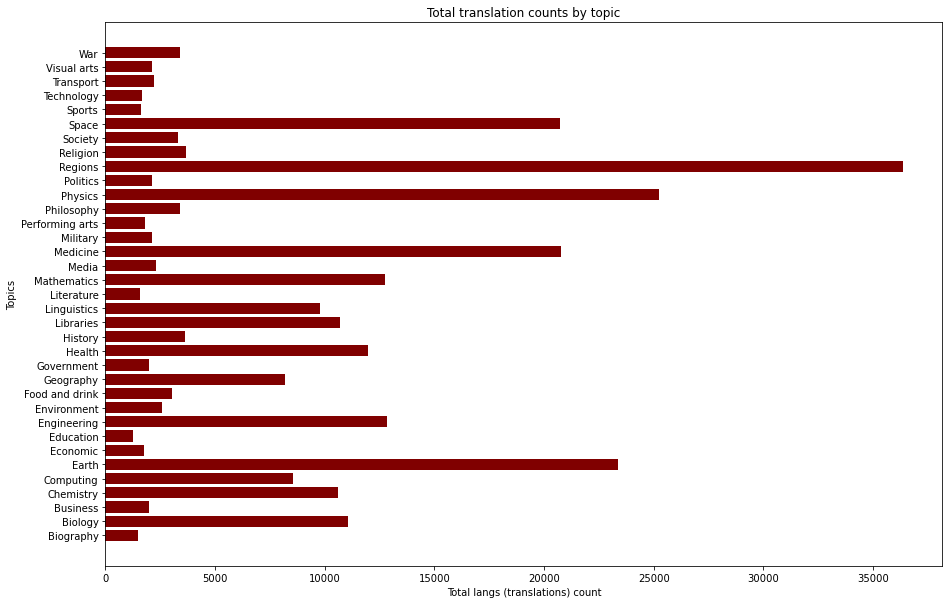

In [57]:
## Pie chart
import numpy as np
import matplotlib.pyplot as plt
 
data_pie = df.groupby(['category'])['langs_count'].sum()
courses = list(data_pie.index)
values = list(data_bpie.values)

fig = plt.figure(figsize = (15, 10))
plt.barh(courses, values, color ='maroon')     
 
plt.xlabel("Total langs (translations) count")
plt.ylabel("Topics")
plt.title("Total translation counts by topic")
plt.show()

In [38]:
grp = df.groupby('category')
grp.describe().reset_index()

category langs_count                                          \
                          count        mean        std  min   25%   50%   
0         Biography       387.0    3.795866   6.732658  0.0   0.0   2.0   
1           Biology       173.0   63.936416  47.582138  0.0  30.0  54.0   
2          Business       381.0    5.207349  10.346194  0.0   0.0   1.0   
3         Chemistry       147.0   72.088435  47.038446  0.0  39.0  63.0   
4         Computing       185.0   46.340541  40.612802  0.0  17.0  35.0   
5             Earth       203.0  115.128079  81.609511  0.0  53.5  90.0   
6          Economic       291.0    6.054983  11.954961  0.0   0.0   1.0   
7         Education       304.0    4.141447   9.651163  0.0   0.0   1.0   
8       Engineering       247.0   51.991903  44.934731  0.0  18.0  40.0   
9       Environment       294.0    8.782313  15.928816  0.0   1.0   2.5   
10   Food and drink       382.0    7.913613  13.706346  0.0   1.0   2.0   
11        Geography       369.0   22.176152  27.534442  0.0   4.0  14.0   
12       Government       333.0    5.903904  10.385481  0.0   0.0   2.0   
13           Health       213.0   56.291080  43.021273  0.0  24.0  47.0   
14          History       354.0   10.214689  24.076229  0.0   0.0   2.0   
15        Libraries       312.0   34.259615  24.769417  1.0  15.0  30.5   
16      Linguistics       349.0   27.985673  29.097780  0.0   6.0  20.0   
17       Literature       322.0    4.885093  11.268287  0.0   0.0   1.0   
18      Mathematics       293.0   43.484642  31.386629  0.0  21.0  35.0   
19            Media       347.0    6.636888  13.041978  0.0   0.0   1.0   
20         Medicine       358.0   58.050279  41.093359  0.0  27.0  51.5   
21         Military       377.0    5.663130  13.221137  0.0   0.0   1.0   
22  Performing arts       351.0    5.179487  10.945017  0.0   0.0   1.0   
23       Philosophy       350.0    9.740000  19.817892  0.0   0.0   2.0   
24          Physics       368.0   68.576087  45.672506  1.0  35.0  63.5   
25         Politics       345.0    6.147826  13.601199  0.0   0.0   2.0   
26          Regions       377.0   96.405836  81.394281  0.0  30.0  77.0   
27         Religion       384.0    9.518229  20.214765  0.0   0.0   2.0   
28          Society       385.0    8.584416  18.592639  0.0   0.0   2.0   
29            Space       384.0   53.940104  42.707018  0.0  23.0  42.0   
30           Sports       346.0    4.679191   8.866055  0.0   0.0   1.0   
31       Technology       368.0    4.500000   8.520212  0.0   0.0   1.0   
32        Transport       384.0    5.802083  12.951300  0.0   0.0   2.0   
33      Visual arts       385.0    5.470130  16.892885  0.0   0.0   1.0   
34              War       385.0    8.872727  18.805388  0.0   0.0   2.0   

                  
      75%    max  
0     4.0   49.0  
1    84.0  256.0  
2     5.0   68.0  
3    94.0  227.0  
4    65.0  205.0  
5   161.0  311.0  
6     6.0   79.0  
7     3.0   71.0  
8    74.0  226.0  
9    10.0  132.0  
10    8.0   98.0  
11   30.0  219.0  
12    6.0   73.0  
13   76.0  227.0  
14    8.0  176.0  
15   48.0  147.0  
16   39.0  150.0  
17    5.0  106.0  
18   59.0  155.0  
19    6.0   93.0  
20   81.0  204.0  
21    5.0  146.0  
22    5.0   68.0  
23    8.0  135.0  
24   88.0  234.0  
25    6.0  146.0  
26  140.0  311.0  
27    9.0  191.0  
28    8.0  147.0  
29   74.0  258.0  
30    5.0   89.0  
31    5.0   63.0  
32    6.0  142.0  
33    5.0  180.0  
34    9.0  210.0

### Mean by category/topic

Mean is the average of all of the numbers. The disadvantage of the mean is that big numbers will greatly affect the final
results, and it is harder to predict what is the "common" number of translations it gets.

In [25]:
display(df.groupby('category').mean(numeric_only=True).reset_index(0))

category  langs_count
0         Biography     3.795866
1           Biology    63.936416
2          Business     5.207349
3         Chemistry    72.088435
4         Computing    46.340541
5             Earth   115.128079
6          Economic     6.054983
7         Education     4.141447
8       Engineering    51.991903
9       Environment     8.782313
10   Food and drink     7.913613
11        Geography    22.176152
12       Government     5.903904
13           Health    56.291080
14          History    10.214689
15        Libraries    34.259615
16      Linguistics    27.985673
17       Literature     4.885093
18      Mathematics    43.484642
19            Media     6.636888
20         Medicine    58.050279
21         Military     5.663130
22  Performing arts     5.179487
23       Philosophy     9.740000
24          Physics    68.576087
25         Politics     6.147826
26          Regions    96.405836
27         Religion     9.518229
28          Society     8.584416
29            Space    53.940104
30           Sports     4.679191
31       Technology     4.500000
32        Transport     5.802083
33      Visual arts     5.470130
34              War     8.872727

### Median by category/topic

A median is a value separating the higher half from the lower half of a data sample, a population or a probability distribution. For a data set, it may be thought of as "the middle" value.


In [26]:
display(df.groupby('category').median(numeric_only=True).reset_index(0))

category  langs_count
0         Biography          2.0
1           Biology         54.0
2          Business          1.0
3         Chemistry         63.0
4         Computing         35.0
5             Earth         90.0
6          Economic          1.0
7         Education          1.0
8       Engineering         40.0
9       Environment          2.5
10   Food and drink          2.0
11        Geography         14.0
12       Government          2.0
13           Health         47.0
14          History          2.0
15        Libraries         30.5
16      Linguistics         20.0
17       Literature          1.0
18      Mathematics         35.0
19            Media          1.0
20         Medicine         51.5
21         Military          1.0
22  Performing arts          1.0
23       Philosophy          2.0
24          Physics         63.5
25         Politics          2.0
26          Regions         77.0
27         Religion          2.0
28          Society          2.0
29            Space         42.0
30           Sports          1.0
31       Technology          1.0
32        Transport          2.0
33      Visual arts          1.0
34              War          2.0

### Mode by category/topic

The mode of a set of data values is the value that appears most often. The disadvantage of using the mode is that we get 
an absolute number, where the category may be getting something in a particular range. Such that, 4 (translations per article)  has 6 counts (appeareances), but 3 and 5 (translations per articles) appear 5 and 4 times respectively.  


In [36]:
df.groupby(['category'])['langs_count'].agg(pd.Series.mode)

category
Biography                              0
Biology                     [35, 47, 84]
Business                               0
Chemistry          [33, 62, 67, 69, 130]
Computing                        [4, 18]
Earth                                 15
Economic                               0
Education                              0
Engineering                            1
Environment                            0
Food and drink                         0
Geography                              0
Government                             0
Health                                57
History                                0
Libraries                             31
Linguistics                            1
Literature                             0
Mathematics                           16
Media                                  0
Medicine                              44
Military                               0
Performing arts                        0
Philosophy                             0
Physics

### Categorize and group according to ranges


- __<= 4__: low
- __<= 7__: medium
- __> 7__: high

In [49]:
from enum import Enum

# we are defining categories and benchmarks to group articles
class TranslationsCategory(Enum):
    LOW = 4
    MEDIUM = 7     
    HIGH = 7
    

In [51]:
df['status'] = df.apply(lambda row: "low" if (row.langs_count <= TranslationsCategory.LOW.value)
                                      else "medium" if (row.langs_count <= TranslationsCategory.MEDIUM.value) 
                                      else "high", axis = 1)


df

title    pageid  langs_count   category  \
0                       Ngerak_Florencio  46723233            1  Biography   
1                 Mario-Philippe_Losembe  54306622            1  Biography   
2                        Olivier_Megaton  28372980           15  Biography   
3                   Jen_and_Sylvia_Soska  32595745            6  Biography   
4                           Yuka_Ebihara  54576698            1  Biography   
...                                  ...       ...          ...        ...   
12112  Laws_of_War_on_Land_(Oxford_1880)  72172500            0        War   
12113   Memorial_against_war_and_fascism  63083258            6        War   
12114                      Beatrice_Wood    168787           17        War   
12115                     R._C._Sherriff   1298107           13        War   
12116                 Mobile_Suit_Gundam     20113           24        War   

       status  
0         low  
1         low  
2        high  
3      medium  
4         low  
...       ...  
12112     low  
12113  medium  
12114    high  
12115    high  
12116    high  

[11433 rows x 5 columns]

In [113]:

status_by_category = df.groupby('category')['status'].value_counts()

display(status_by_category)


set(status_by_category.index.get_level_values(0))

category     status
Biography    low       300
             high       51
             medium     36
Biology      high      166
             low         4
                      ... 
Visual arts  high       69
             medium     30
War          low       246
             high      104
             medium     35
Name: status, Length: 104, dtype: int64

{'Biography',
 'Biology',
 'Business',
 'Chemistry',
 'Computing',
 'Earth',
 'Economic',
 'Education',
 'Engineering',
 'Environment',
 'Food and drink',
 'Geography',
 'Government',
 'Health',
 'History',
 'Libraries',
 'Linguistics',
 'Literature',
 'Mathematics',
 'Media',
 'Medicine',
 'Military',
 'Performing arts',
 'Philosophy',
 'Physics',
 'Politics',
 'Regions',
 'Religion',
 'Society',
 'Space',
 'Sports',
 'Technology',
 'Transport',
 'Visual arts',
 'War'}

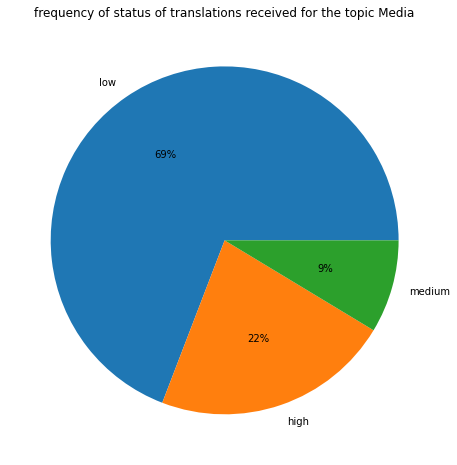

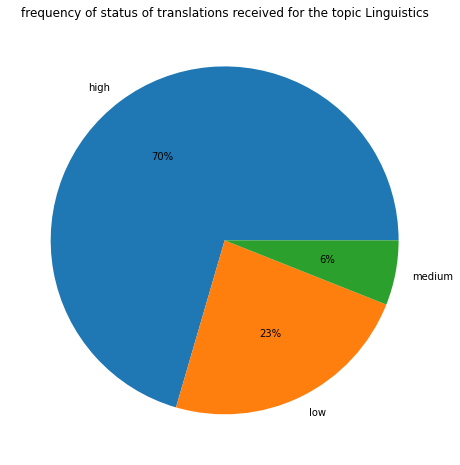

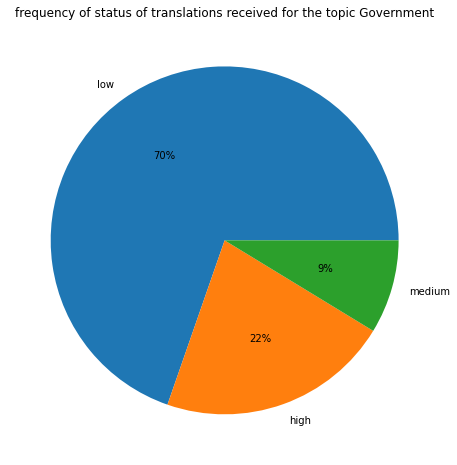

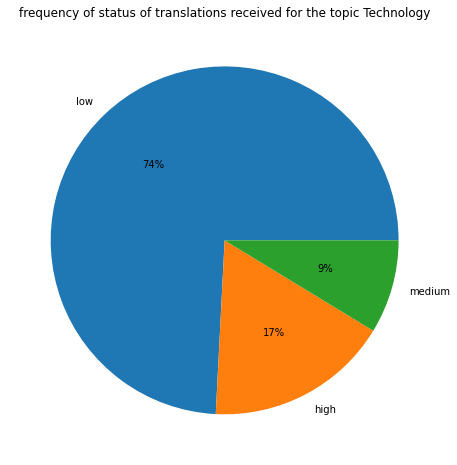

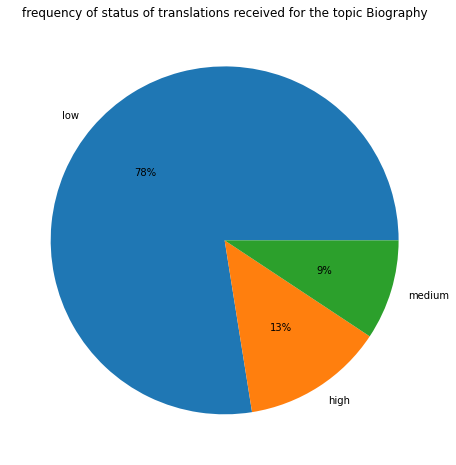

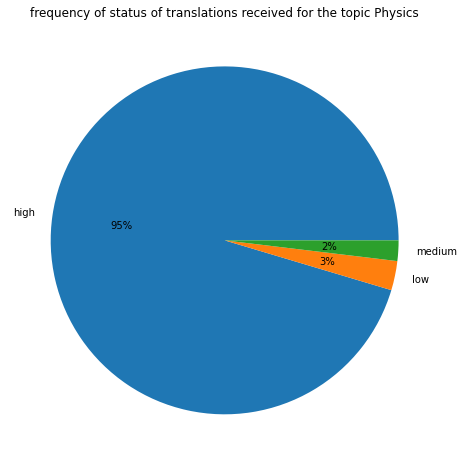

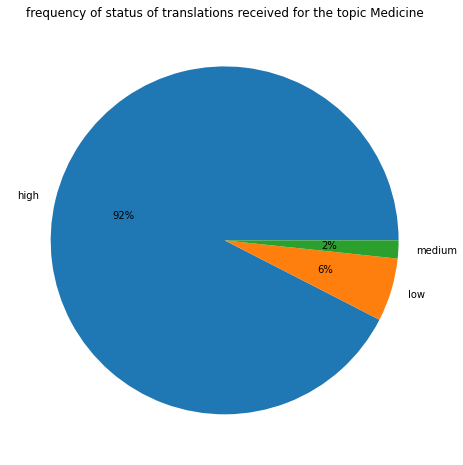

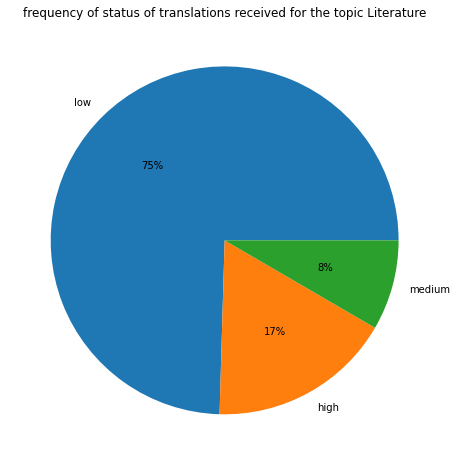

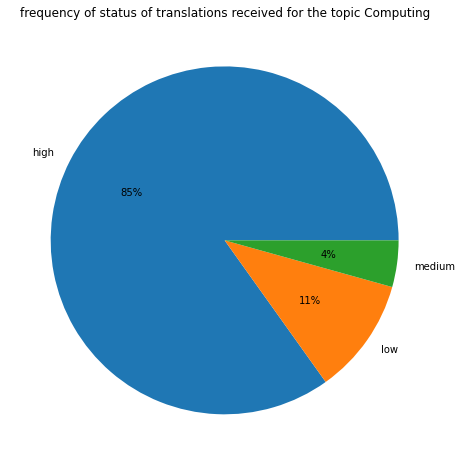

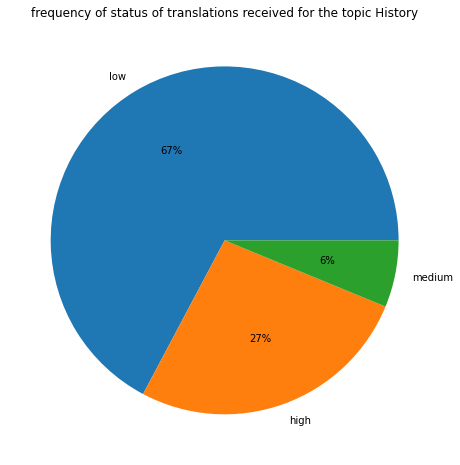

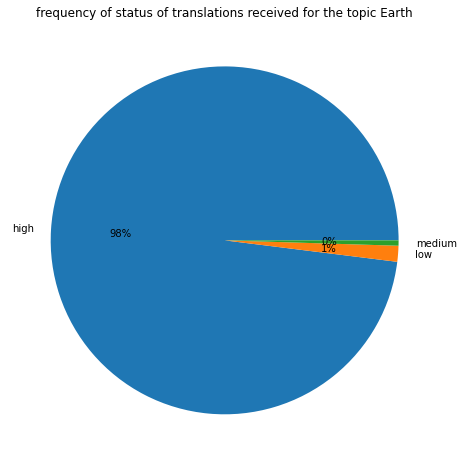

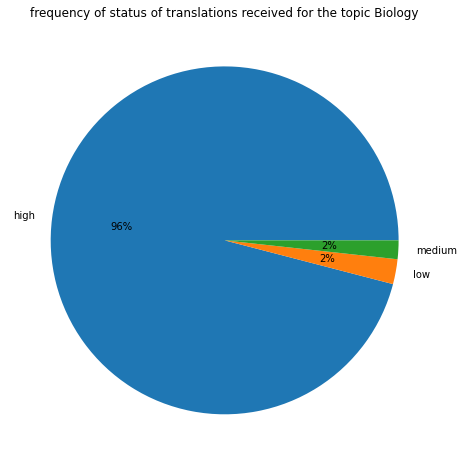

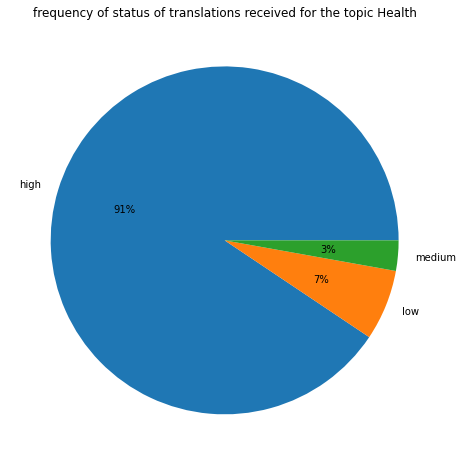

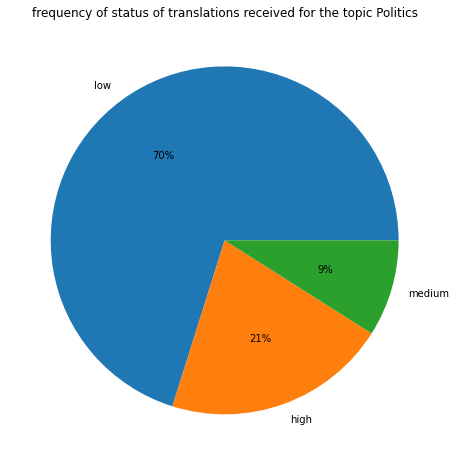

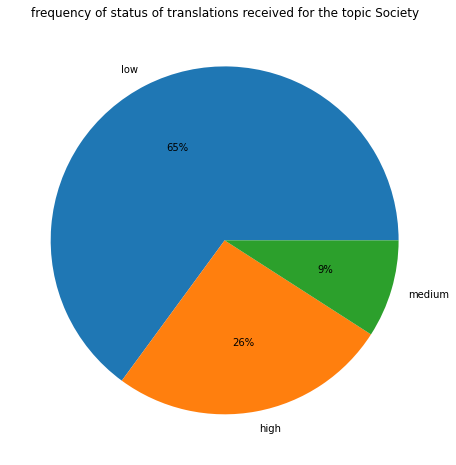

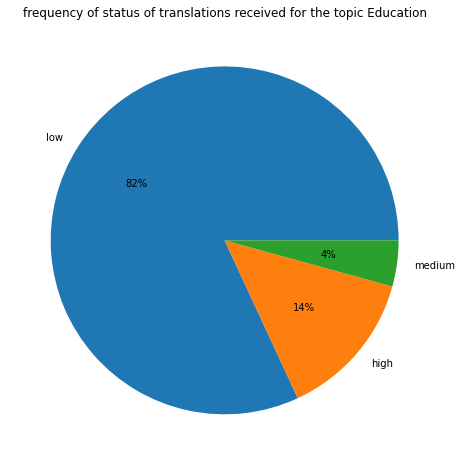

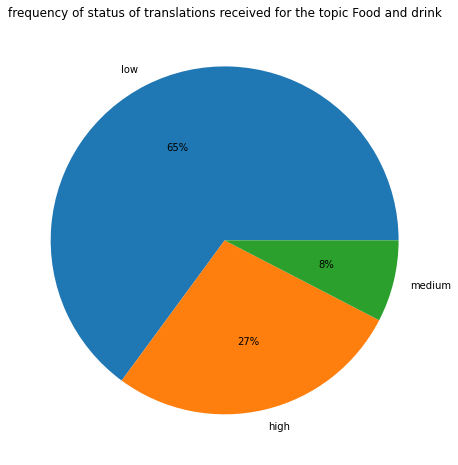

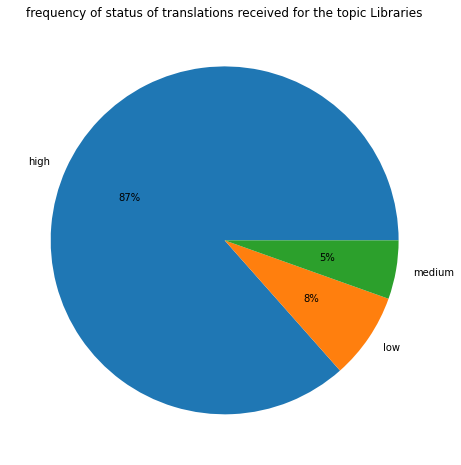

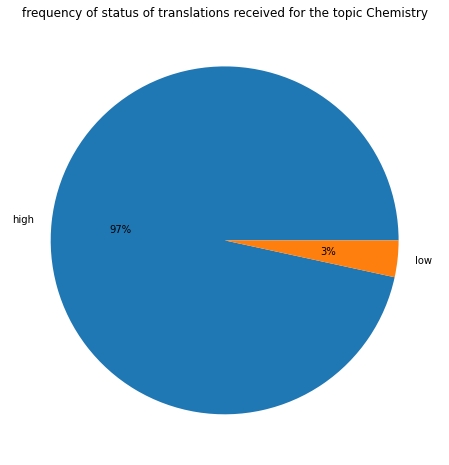

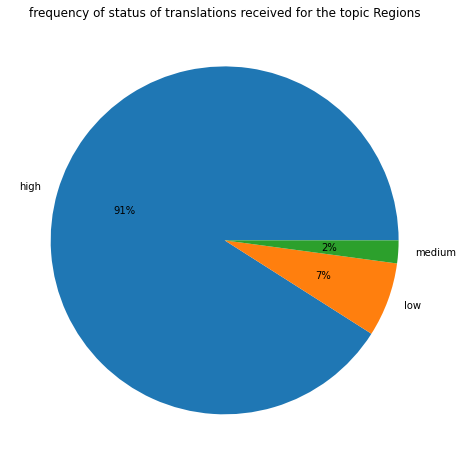

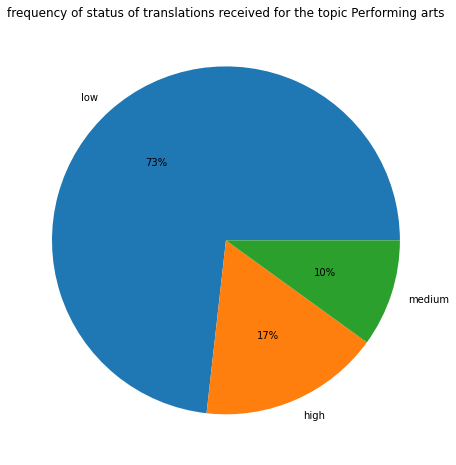

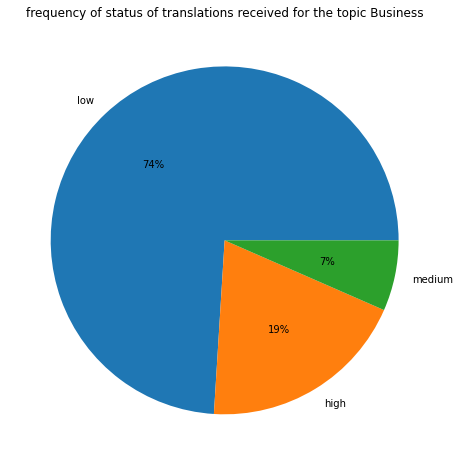

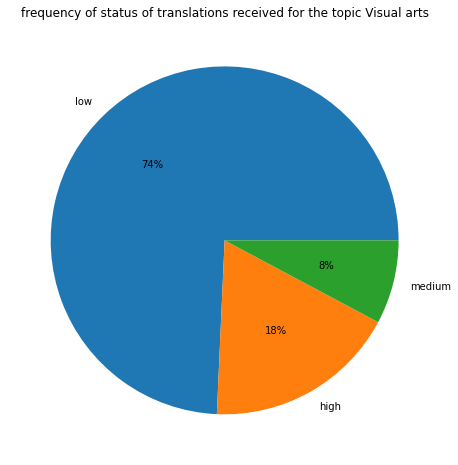

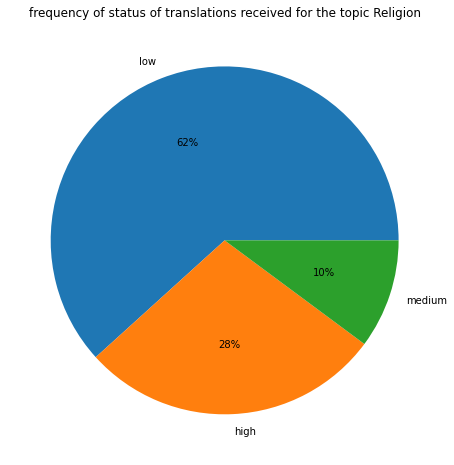

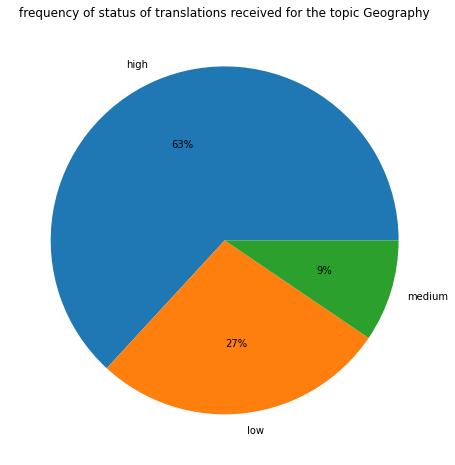

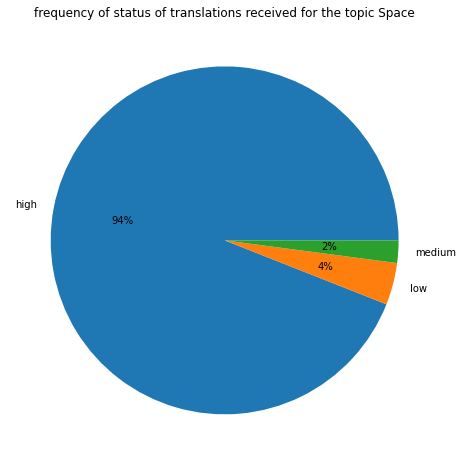

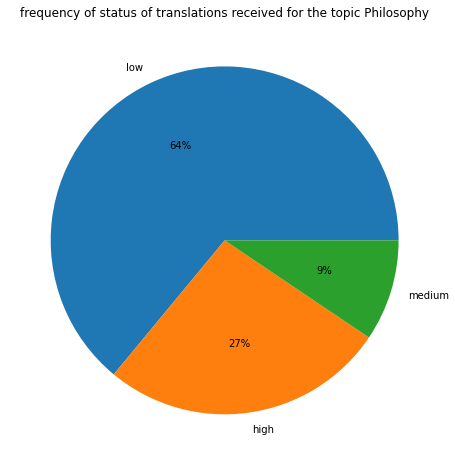

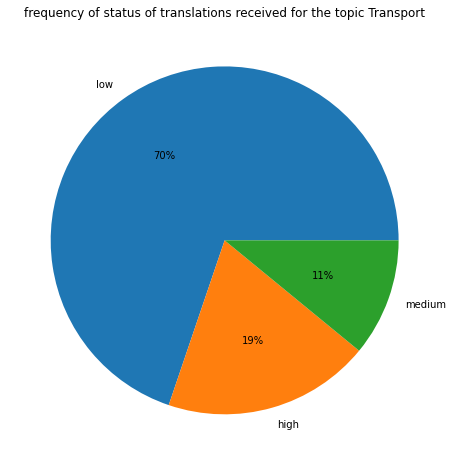

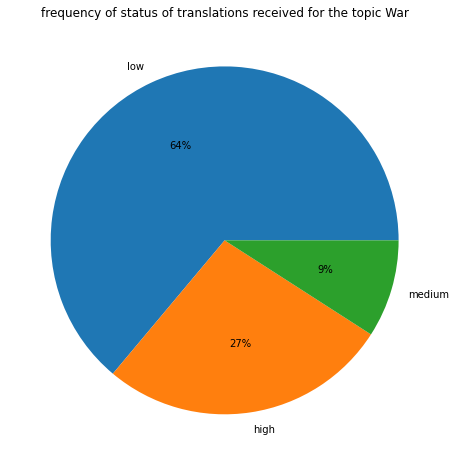

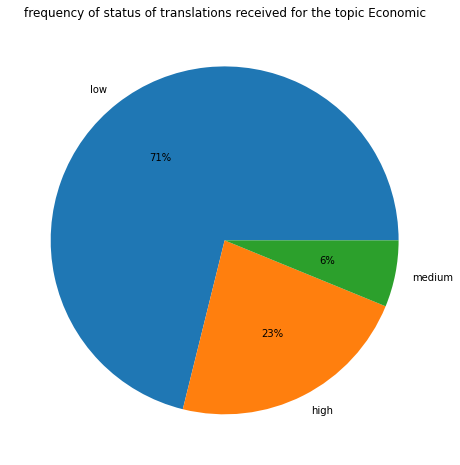

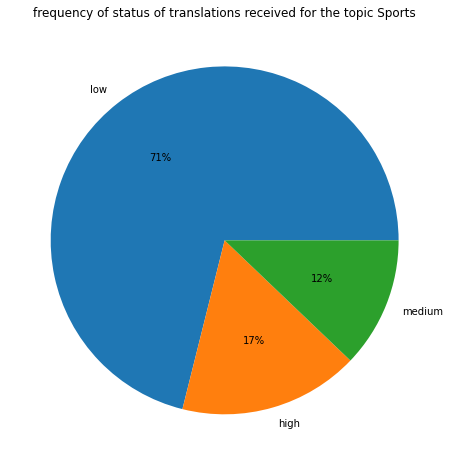

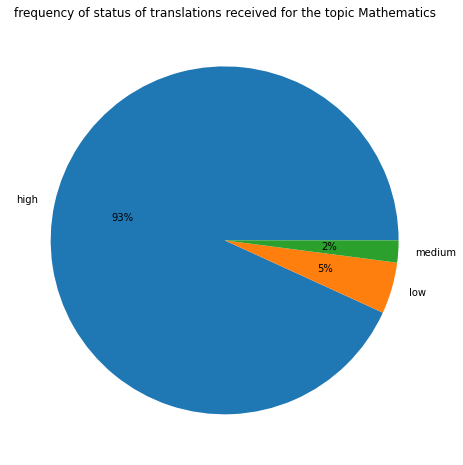

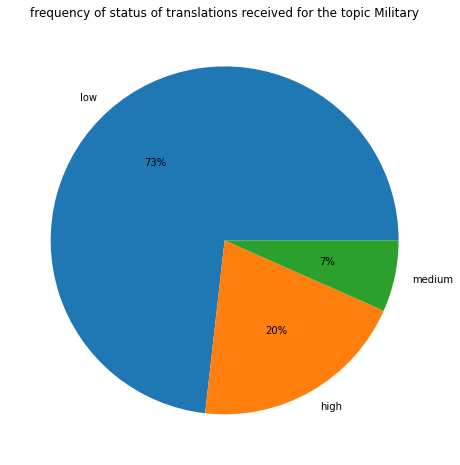

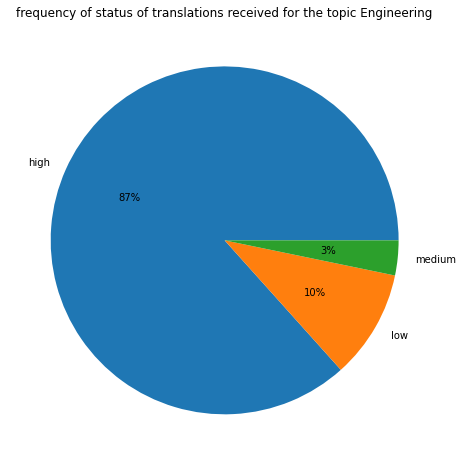

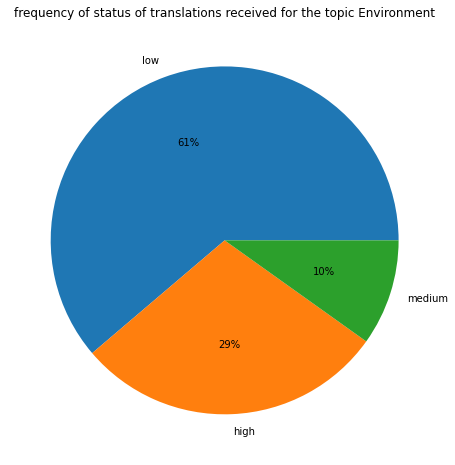

In [103]:
## Show distribution by specific language level

categories = set(status_by_category.index.get_level_values(0))
for label in categories:
    data = status_by_category[label]
    
    values = data.values.tolist()
    labels = data.index.tolist()
    
    plt.rcParams["figure.figsize"] = (20,8)
    plt.title(f'frequency of status of translations received for the topic {label}')
    plt.pie(values, labels=labels, autopct='%.0f%%')
    plt.show()
    

In [112]:
# NOTE/TODO: we could use these values to show, by status label (low, medium, high) 
# and the percentage it represents from the total of that category
# how each category/topic relate to one another 

display(status_by_category.index)
display(status_by_category.values)

MultiIndex([(  'Biography',    'low'),
            (  'Biography',   'high'),
            (  'Biography', 'medium'),
            (    'Biology',   'high'),
            (    'Biology',    'low'),
            (    'Biology', 'medium'),
            (   'Business',    'low'),
            (   'Business',   'high'),
            (   'Business', 'medium'),
            (  'Chemistry',   'high'),
            ...
            ( 'Technology', 'medium'),
            (  'Transport',    'low'),
            (  'Transport',   'high'),
            (  'Transport', 'medium'),
            ('Visual arts',    'low'),
            ('Visual arts',   'high'),
            ('Visual arts', 'medium'),
            (        'War',    'low'),
            (        'War',   'high'),
            (        'War', 'medium')],
           names=['category', 'status'], length=104)

array([300,  51,  36, 166,   4,   3, 282,  74,  25, 142,   5, 157,  20,
         8, 199,   3,   1, 207,  66,  18, 249,  42,  13, 214,  25,   8,
       180,  85,  29, 248, 105,  29, 233, 101,  35, 232,  72,  29, 193,
        14,   6, 238,  94,  22, 270,  25,  17, 246,  82,  21, 240,  55,
        27, 273,  14,   6, 240,  77,  30, 331,  21,   6, 276,  76,  25,
       257,  59,  35, 224,  93,  33, 351,  10,   7, 242,  72,  31, 343,
        26,   8, 237, 108,  39, 250, 100,  35, 361,  15,   8, 246,  58,
        42, 273,  63,  32, 268,  74,  42, 286,  69,  30, 246, 104,  35],
      dtype=int64)

### 6. Explore further the groups of languages being translated and their pairs [optional]

In [1]:
#### English

In [ ]:
#### Czech

In [ ]:
#### Arabic

In [ ]:
#### Korean